In [9]:
!nvidia-smi

Sat Sep 28 17:12:40 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.107.02             Driver Version: 550.107.02     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 850M        Off |   00000000:01:00.0 Off |                  N/A |
| N/A   46C    P0             N/A /   26W |     168MiB /   2048MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:

#@title 链接Google Drive
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
# !mkdir /content/drive/MyDrive/ftTrainDataDetail
!rm -rf /content/drive/MyDrive/ftTrainDataDetail/*
!unzip -o /home/tmw/shared/ftTrainData.zip -d /content/drive/MyDrive/ftTrainDataDetail

## 获取数据

In [6]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#@title 拼接数据

# filepath = '/kaggle/input/stock-time-series-20050101-to-20171231/AMZN_2006-01-01_to_2018-01-01.csv'
# filepath = '/kaggle/input/amazon.csv'
import pandas as pd

# 获取/content/hello目录下所有的CSV文件
file_paths = [os.path.join('/content/drive/MyDrive/ftTrainDataDetail', f) for f in os.listdir('/content/drive/MyDrive/ftTrainDataDetail') if f.endswith('.csv')]

dataframes = []
tgtLength = 500

for file_path in file_paths:
    df = pd.read_csv(file_path, encoding='latin1')
    df = df[::-1]  # 反转 DataFrame 的顺序

    if len(df) == 0:
        continue
    # 检查文件大小
    if len(df) < tgtLength:
        # 计算需要重复的行数
        num_rows_to_add = tgtLength - len(df)
        last_row = df.iloc[-1:]  # 获取最后一行
        # 重复最后一行
        repeated_rows = pd.concat([last_row] * num_rows_to_add, ignore_index=True)
        df = pd.concat([df, repeated_rows], ignore_index=True)
        # 创建补充的行，填充为零
        # zero_rows = pd.DataFrame(0, index=range(num_rows_to_add), columns=df.columns)
        # df = pd.concat([df, zero_rows], ignore_index=True)
    else:
        df = df.iloc[:tgtLength]

    dataframes.append(df)

# 合并所有数据
data = pd.concat(dataframes, ignore_index=True)


# 保存为 CSV 文件
data.to_csv('hello.csv', index=False)

#@title 数据去除特殊符号

dataMain = data[['Main']]
dataEven = data[['Even']]
dataLoss = data[['Loss']]
dataResult = data[['Result']]

dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
dataLoss['Loss'] = dataLoss['Loss'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)


# # 检查非数字字符串
# def clean_column(column):
#     # 移除特定字符
#     column = column.str.replace('↑', '').str.replace('↓', '')
#     # 检查无法转换的值
#     invalid_values = column[~column.str.replace('.', '', regex=False).str.isnumeric()]
#     if not invalid_values.empty:
#         print("无效值:", invalid_values)
#     # 转换为 float
#     return column.astype(float, errors='coerce')

# # 清理并转换
# dataMain['Main'] = clean_column(dataMain['Main'])
# dataMain['Even'] = clean_column(dataMain['Even'])
# dataMain['Loss'] = clean_column(dataMain['Loss'])


#@title 数据归一化

from sklearn.preprocessing import MinMaxScaler

scalerMain = MinMaxScaler(feature_range=(-1, 1))
scalerEven = MinMaxScaler(feature_range=(-1, 1))
scalerLoss = MinMaxScaler(feature_range=(-1, 1))
scalerResult = MinMaxScaler(feature_range=(-1, 1))
dataMain['Main'] = scalerMain.fit_transform(dataMain['Main'].values.reshape(-1,1))
dataEven['Even'] = scalerEven.fit_transform(dataEven['Even'].values.reshape(-1,1))
dataLoss['Loss'] = scalerLoss.fit_transform(dataLoss['Loss'].values.reshape(-1,1))
dataResult['Result'] = dataResult['Result']
print(dataMain['Main'] .shape)
dataMain['Main']

# def scale_in_chunks(data, chunk_size=500):
#     scalers = []
#     scaled_data = []

#     # 将数据分成若干块
#     data_chunks = np.array_split(data, np.arange(chunk_size, len(data), chunk_size))

#     for chunk in data_chunks:
#         scaler = MinMaxScaler(feature_range=(-1, 1))
#         scaled_chunk = scaler.fit_transform(chunk.values.reshape(-1, 1))
#         scalers.append(scaler)  # 如果需要在后续反向转换时使用
#         scaled_data.append(scaled_chunk)

#     return np.vstack(scaled_data), scalers

# # 对每个数据集进行分块缩放
# dataMain['Main'], scalers_main = scale_in_chunks(dataMain['Main'])
# dataEven['Even'], scalers_even = scale_in_chunks(dataEven['Even'])
# dataLoss['Loss'], scalers_loss = scale_in_chunks(dataLoss['Loss'])
# print(dataMain['Main'], dataEven['Even'], dataLoss['Loss'])
# dataResult['Result'] 保持原样

/tmp/ipykernel_3379/2760621473.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/2760621473.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)


(299000,)


/tmp/ipykernel_3379/2760621473.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataLoss['Loss'] = dataLoss['Loss'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/2760621473.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = scalerMain.fit_transform(dataMain['Main'].values.reshape(-1,1))
/tmp/ipykernel_3379/2760621473.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

0         0.301517
1         0.349681
2         0.301517
3         0.296679
4         0.467121
            ...   
298995   -0.151968
298996   -0.151968
298997   -0.151968
298998   -0.151968
298999   -0.151968
Name: Main, Length: 299000, dtype: float64

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.set_style("darkgrid")
# plt.figure(figsize = (15,9))
# plt.plot(data[['Main']])
# plt.plot(data[['Even']])
# plt.plot(data[['Loss']])
# plt.xticks(range(0,data.shape[0],500),data['Date'].loc[::500],rotation=45)
# plt.title("Amazon Stock Price",fontsize=18, fontweight='bold')
# plt.xlabel('Date',fontsize=18)
# plt.ylabel('Close Price (USD)',fontsize=18)
# plt.show()

## 数据处理

In [8]:
#@title 训练模型
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
output_cls_dim = 3
num_epochs = 100
batch_size = 2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


def split_data(dataMain, dataEven, dataLoss, dataResult, lookback, batch_size = 20):
    data_raw_main = dataMain.to_numpy()
    data_raw_even = dataEven.to_numpy()
    data_raw_loss = dataLoss.to_numpy()
    data_raw_result = dataResult.to_numpy()
    data_main = []
    data_even = []
    data_loss = []
    data_result = []

    # create all possible sequences of length lookback
    for index in range(len(data_raw_main) - lookback):
        data_main.append(data_raw_main[index: index + lookback])
    for index in range(len(data_raw_even) - lookback):
        data_even.append(data_raw_even[index: index + lookback])
    for index in range(len(data_raw_loss) - lookback):
        data_loss.append(data_raw_loss[index: index + lookback])
    for index in range(len(data_raw_result) - lookback):
        data_result.append(data_raw_result[index: index + lookback])

    data_main = np.array(data_main)
    data_even = np.array(data_even)
    data_loss = np.array(data_loss)
    data_result = np.array(data_result)

    test_set_size = int(np.round(0.2 * data_main.shape[0]))
    train_set_size = data_main.shape[0]

    # 将训练数据切割成多个批次
    num_batches = train_set_size // batch_size
    print("num_batches: ", num_batches, " data_main.shape[0]: ", data_main.shape[0])


    x_train = {
        'main': np.array_split(data_main[:train_set_size, :-1, :], num_batches),
        'even': np.array_split(data_even[:train_set_size, :-1, :], num_batches),
        'loss': np.array_split(data_loss[:train_set_size, :-1, :], num_batches),
        'result': np.array_split(data_result[:train_set_size, :-1, :], num_batches)
    }
    y_train = {
        'main': np.array_split(data_main[:train_set_size, -1, :], num_batches),
        'even': np.array_split(data_even[:train_set_size, -1, :], num_batches),
        'loss': np.array_split(data_loss[:train_set_size, -1, :], num_batches),
        'result': np.array_split(data_result[:train_set_size, -1, :], num_batches)
    }

    x_test = {
        'main': np.array_split(data_main[train_set_size:, :-1, :], num_batches),
        'even': np.array_split(data_even[train_set_size:, :-1, :], num_batches),
        'loss': np.array_split(data_loss[train_set_size:, :-1, :], num_batches),
        'result': np.array_split(data_result[train_set_size:, :-1, :], num_batches)
    }
    y_test = {
        'main': np.array_split(data_main[train_set_size:, -1, :], num_batches),
        'even': np.array_split(data_even[train_set_size:, -1, :], num_batches),
        'loss': np.array_split(data_loss[train_set_size:, -1, :], num_batches),
        'result': np.array_split(data_result[train_set_size:, -1, :], num_batches)
    }
    # print("x_train['main']: ", x_train['main'][1])
    return [x_train, y_train, x_test, y_test]


lookback = 10 # choose sequence length
x_train, y_train, x_test, y_test = split_data(dataMain, dataEven, dataLoss, dataResult, lookback, 495)
# x_train_batches, y_train_batches, x_test, y_test = split_data(price, lookback=20, batch_size=32)

# # 打印批次的数量和每个批次的形状
# print('Number of training batches:', len(x_train_batches))
# if len(x_train_batches) > 0:
#     print('Shape of each training batch (x):', x_train_batches[0].shape)
#     print('Shape of each training batch (y):', y_train_batches[0].shape)

# print('x_test.shape = ', x_test.shape)
# print('y_test.shape = ', y_test.shape)

# 打印批次的数量和每个批次的形状
print('Number of training batches:', len(x_train['main']))
if len(x_train['main']) > 0:
    # print('Shape of each training batch (x):', x_train_batches[0].shape)
    # print('Shape of each training batch (y):', y_train_batches[0].shape)

    print('x_train.shape = ',x_train['main'][0].shape)
    print('y_train.shape = ',y_train['main'][0].shape)
    print('x_test.shape = ',x_test['main'][0].shape)
    print('y_test.shape = ',y_test['main'][0].shape)
    print('x_result.shape = ',y_train['result'][0].shape)

# print("x_train: ", x_train)
# print("y_train: ", y_train)

# x_train_batches_tensor = [torch.from_numpy(batch).type(torch.Tensor) for batch in x_train_batches]
# y_train_batches_tensor = [torch.from_numpy(batch).type(torch.Tensor) for batch in y_train_batches]
import torch

# 转换为字典
train_tensors = {
    'x_main': [torch.from_numpy(batch).type(torch.Tensor) for batch in x_train['main']],
    'x_even': [torch.from_numpy(batch).type(torch.Tensor) for batch in x_train['even']],
    'x_loss': [torch.from_numpy(batch).type(torch.Tensor) for batch in x_train['loss']],
    'x_result': [torch.from_numpy(batch).type(torch.Tensor) for batch in x_train['result']],
    'y_main': [torch.from_numpy(batch).type(torch.Tensor) for batch in y_train['main']],
    'y_even': [torch.from_numpy(batch).type(torch.Tensor) for batch in y_train['even']],
    'y_loss': [torch.from_numpy(batch).type(torch.Tensor) for batch in y_train['loss']],
    'y_result': [torch.from_numpy(batch).type(torch.Tensor) for batch in y_train['result']]
}

test_tensors = {
    'x_main': [torch.from_numpy(batch).type(torch.Tensor) for batch in x_test['main']],
    'x_even': [torch.from_numpy(batch).type(torch.Tensor) for batch in x_test['even']],
    'x_loss': [torch.from_numpy(batch).type(torch.Tensor) for batch in x_test['loss']],
    'x_result': [torch.from_numpy(batch).type(torch.Tensor) for batch in x_test['result']],
    'y_main': [torch.from_numpy(batch).type(torch.Tensor) for batch in y_test['main']],
    'y_even': [torch.from_numpy(batch).type(torch.Tensor) for batch in y_test['even']],
    'y_loss': [torch.from_numpy(batch).type(torch.Tensor) for batch in y_test['loss']],
    'y_result': [torch.from_numpy(batch).type(torch.Tensor) for batch in y_test['result']]
}

class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.fcCls = nn.Linear(hidden_dim, output_cls_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim, device=x.device).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim, device=x.device).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out1 = self.fc(out[:, -1, :])

        # 通过全连接层
        outCls = self.fcCls(out[:, -1, :])
        # 应用 softmax 激活
        outCls = torch.softmax(outCls, dim=1)

        return out1, outCls



model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers).to(device)

model_path = '/content/drive/MyDrive/ft_model_weights.pth'

# 判断模型文件是否存在
if os.path.exists(model_path):
    # 创建模型实例
    # model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

    # 加载模型参数
    model.load_state_dict(torch.load(model_path))

    # 移动模型到指定设备
    model.to(device)
    print("Model loaded successfully.")
else:
    print("Model file does not exist.")

criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

# 定义损失函数和优化器
criterionCls = nn.CrossEntropyLoss()
# optimizerCls = optim.Adam(model.parameters(), lr=0.001)


from re import X
import time

hist = np.zeros(num_epochs)
start_time = time.time()
lstm = []

y_train_pred_main = None
y_train_pred_even = None
y_train_pred_loss = None
cls_to_draw = None

for t in range(num_epochs):

    for x_main_batch, x_even_batch, x_loss_batch, y_main_batch, y_even_batch, y_loss_batch, y_result_batch in zip(train_tensors['x_main'], train_tensors['x_even'], train_tensors['x_loss'], train_tensors['y_main'], train_tensors['y_even'], train_tensors['y_loss'], train_tensors['y_result']):

        x_main_batch = x_main_batch.to(device)
        x_even_batch = x_even_batch.to(device)
        x_loss_batch = x_loss_batch.to(device)
        y_main_batch = y_main_batch.to(device)
        y_even_batch = y_even_batch.to(device)
        y_loss_batch = y_loss_batch.to(device)
        y_result_batch = y_result_batch.to(device)
        # print("ok: ")
        # 替换前10个元素的内容为第11个元素的内容
        if len(x_main_batch) > 10:  # 确保有足够的元素
            x_main_batch[:10] = x_main_batch[10:11]
        # print("x_main_batch: ", x_main_batch)
        y_train_pred_main, cls_main = model(x_main_batch)
        y_train_pred_even, cls_even = model(x_even_batch)
        y_train_pred_loss, cls_loss = model(x_loss_batch)

        loss_main = criterion(y_train_pred_main, y_main_batch)
        loss_even = criterion(y_train_pred_even, y_even_batch)
        loss_loss = criterion(y_train_pred_loss, y_loss_batch)

        tmp = torch.softmax(cls_main + cls_even + cls_loss, dim=1)
        cls_to_draw = tmp

        loss_result = criterionCls(tmp, y_result_batch.squeeze().long())
        loss = loss_main + loss_even + loss_loss + loss_result

        # print("Epoch ", t, "MSE: ", loss.item())
        hist[t] = loss.item()

        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
    print("Epoch ", t, "MSE: ", loss.item(), "cls_main + cls_even + cls_loss: ", tmp)

training_time = time.time()-start_time
print("Training time: {}".format(training_time))


predict_main = pd.DataFrame(scalerMain.inverse_transform(y_train_pred_main.detach().cpu().numpy()))
# original_main = pd.DataFrame(scalerMain.inverse_transform(train_tensors['y_main'].detach().numpy()))

predict_even = pd.DataFrame(scalerEven.inverse_transform(y_train_pred_even.detach().cpu().numpy()))
# original_even = pd.DataFrame(scalerEven.inverse_transform(train_tensors['y_even'].detach().numpy()))

predict_loss = pd.DataFrame(scalerLoss.inverse_transform(y_train_pred_loss.detach().cpu().numpy()))

predict_cls = pd.DataFrame(scalerLoss.inverse_transform(cls_to_draw.detach().cpu().numpy()))
# original_loss = pd.DataFrame(scalerLoss.inverse_transform(train_tensors['y_loss'].detach().numpy()))

import seaborn as sns
sns.set_style("darkgrid")

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
# ax = sns.lineplot(x = original_main.index, y = original_main[0], label="Data Main", color='royalblue')
ax = sns.lineplot(x = predict_main.index, y = predict_main[0], label="Training Prediction Main(LSTM)", color='tomato')

# ax = sns.lineplot(x = original_even.index, y = original_even[0], label="Data Even", color='red')
ax = sns.lineplot(x = predict_even.index, y = predict_even[0], label="Training Prediction Even(LSTM)", color='#FF6347')

# ax = sns.lineplot(x = original_loss.index, y = original_loss[0], label="Data Loss", color='green')
ax = sns.lineplot(x = predict_loss.index, y = predict_loss[0], label="Training Prediction Loss(LSTM)", color='#F31347')

# ax = sns.lineplot(x = original_loss.index, y = original_loss[0], label="Data Loss", color='green')
ax = sns.lineplot(x = predict_cls.index, y = predict_cls[0], label="Training Prediction Class(LSTM)", color='#a31347')
ax.set_title('Stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

# 保存模型的状态字典
torch.save(model.state_dict(), '/content/drive/MyDrive/ft_model_weights.pth')
torch.save(model.state_dict(), '/content/drive/MyDrive/ft_model_weights_bk.pth')

num_batches:  604  data_main.shape[0]:  298990
Number of training batches: 604
x_train.shape =  (496, 9, 1)
y_train.shape =  (496, 1)
x_test.shape =  (0, 9, 1)
y_test.shape =  (0, 1)
x_result.shape =  (496, 1)


RuntimeError: CUDA error: unspecified launch failure
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


## GRU模型

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/output'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#@title 获取数据

# filepath = '/kaggle/input/stock-time-series-20050101-to-20171231/AMZN_2006-01-01_to_2018-01-01.csv'
# filepath = '/kaggle/input/amazon.csv'#@title 训练模型
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
output_cls_dim = 3
num_epochs = 100
batch_size = 2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


def split_data(dataMain, dataEven, dataLoss, dataResult, lookback, batch_size = 20):
    data_raw_main = dataMain.to_numpy()
    data_raw_even = dataEven.to_numpy()
    data_raw_loss = dataLoss.to_numpy()
    data_raw_result = dataResult.to_numpy()
    data_main = []
    data_even = []
    data_loss = []
    data_result = []

    # create all possible sequences of length lookback
    for index in range(len(data_raw_main) - lookback):
        data_main.append(data_raw_main[index: index + lookback])
    for index in range(len(data_raw_even) - lookback):
        data_even.append(data_raw_even[index: index + lookback])
    for index in range(len(data_raw_loss) - lookback):
        data_loss.append(data_raw_loss[index: index + lookback])
    for index in range(len(data_raw_result) - lookback):
        data_result.append(data_raw_result[index: index + lookback])

    data_main = np.array(data_main)
    data_even = np.array(data_even)
    data_loss = np.array(data_loss)
    data_result = np.array(data_result)

    test_set_size = int(np.round(0.2 * data_main.shape[0]))
    train_set_size = data_main.shape[0]

    # 将训练数据切割成多个批次
    num_batches = train_set_size // batch_size
    print("num_batches: ", num_batches, " data_main.shape[0]: ", data_main.shape[0])


    x_train = {
        'main': np.array_split(data_main[:train_set_size, :-1, :], num_batches),
        'even': np.array_split(data_even[:train_set_size, :-1, :], num_batches),
        'loss': np.array_split(data_loss[:train_set_size, :-1, :], num_batches),
        'result': np.array_split(data_result[:train_set_size, :-1, :], num_batches)
    }
    y_train = {
        'main': np.array_split(data_main[:train_set_size, -1, :], num_batches),
        'even': np.array_split(data_even[:train_set_size, -1, :], num_batches),
        'loss': np.array_split(data_loss[:train_set_size, -1, :], num_batches),
        'result': np.array_split(data_result[:train_set_size, -1, :], num_batches)
    }

    x_test = {
        'main': np.array_split(data_main[train_set_size:, :-1, :], num_batches),
        'even': np.array_split(data_even[train_set_size:, :-1, :], num_batches),
        'loss': np.array_split(data_loss[train_set_size:, :-1, :], num_batches),
        'result': np.array_split(data_result[train_set_size:, :-1, :], num_batches)
    }
    y_test = {
        'main': np.array_split(data_main[train_set_size:, -1, :], num_batches),
        'even': np.array_split(data_even[train_set_size:, -1, :], num_batches),
        'loss': np.array_split(data_loss[train_set_size:, -1, :], num_batches),
        'result': np.array_split(data_result[train_set_size:, -1, :], num_batches)
    }
    # print("x_train['main']: ", x_train['main'][1])
    return [x_train, y_train, x_test, y_test]


lookback = 10 # choose sequence length
x_train, y_train, x_test, y_test = split_data(dataMain, dataEven, dataLoss, dataResult, lookback, 495)
# x_train_batches, y_train_batches, x_test, y_test = split_data(price, lookback=20, batch_size=32)

# # 打印批次的数量和每个批次的形状
# print('Number of training batches:', len(x_train_batches))
# if len(x_train_batches) > 0:
#     print('Shape of each training batch (x):', x_train_batches[0].shape)
#     print('Shape of each training batch (y):', y_train_batches[0].shape)

# print('x_test.shape = ', x_test.shape)
# print('y_test.shape = ', y_test.shape)

# 打印批次的数量和每个批次的形状
print('Number of training batches:', len(x_train['main']))
if len(x_train['main']) > 0:
    # print('Shape of each training batch (x):', x_train_batches[0].shape)
    # print('Shape of each training batch (y):', y_train_batches[0].shape)

    print('x_train.shape = ',x_train['main'][0].shape)
    print('y_train.shape = ',y_train['main'][0].shape)
    print('x_test.shape = ',x_test['main'][0].shape)
    print('y_test.shape = ',y_test['main'][0].shape)
    print('x_result.shape = ',y_train['result'][0].shape)

# print("x_train: ", x_train)
# print("y_train: ", y_train)

# x_train_batches_tensor = [torch.from_numpy(batch).type(torch.Tensor) for batch in x_train_batches]
# y_train_batches_tensor = [torch.from_numpy(batch).type(torch.Tensor) for batch in y_train_batches]
import torch

# 转换为字典
train_tensors = {
    'x_main': [torch.from_numpy(batch).type(torch.Tensor) for batch in x_train['main']],
    'x_even': [torch.from_numpy(batch).type(torch.Tensor) for batch in x_train['even']],
    'x_loss': [torch.from_numpy(batch).type(torch.Tensor) for batch in x_train['loss']],
    'x_result': [torch.from_numpy(batch).type(torch.Tensor) for batch in x_train['result']],
    'y_main': [torch.from_numpy(batch).type(torch.Tensor) for batch in y_train['main']],
    'y_even': [torch.from_numpy(batch).type(torch.Tensor) for batch in y_train['even']],
    'y_loss': [torch.from_numpy(batch).type(torch.Tensor) for batch in y_train['loss']],
    'y_result': [torch.from_numpy(batch).type(torch.Tensor) for batch in y_train['result']]
}

test_tensors = {
    'x_main': [torch.from_numpy(batch).type(torch.Tensor) for batch in x_test['main']],
    'x_even': [torch.from_numpy(batch).type(torch.Tensor) for batch in x_test['even']],
    'x_loss': [torch.from_numpy(batch).type(torch.Tensor) for batch in x_test['loss']],
    'x_result': [torch.from_numpy(batch).type(torch.Tensor) for batch in x_test['result']],
    'y_main': [torch.from_numpy(batch).type(torch.Tensor) for batch in y_test['main']],
    'y_even': [torch.from_numpy(batch).type(torch.Tensor) for batch in y_test['even']],
    'y_loss': [torch.from_numpy(batch).type(torch.Tensor) for batch in y_test['loss']],
    'y_result': [torch.from_numpy(batch).type(torch.Tensor) for batch in y_test['result']]
}


# class LSTM(nn.Module):
#     def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
#         super(LSTM, self).__init__()
#         self.hidden_dim = hidden_dim
#         self.num_layers = num_layers

#         self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
#         self.fc = nn.Linear(hidden_dim, output_dim)
#         self.fcCls = nn.Linear(hidden_dim, output_cls_dim)

#     def forward(self, x):
#         h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim, device=x.device).requires_grad_()
#         c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim, device=x.device).requires_grad_()
#         out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
#         out1 = self.fc(out[:, -1, :])

#         # 通过全连接层
#         outCls = self.fcCls(out[:, -1, :])
#         # 应用 softmax 激活
#         outCls = torch.softmax(outCls, dim=1)

#         return out1, outCls

class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.fcCls = nn.Linear(hidden_dim, output_cls_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim, device=x.device).requires_grad_()
        out, (hn) = self.gru(x, (h0.detach()))
        out1 = self.fc(out[:, -1, :])
        # 通过全连接层
        outCls = self.fcCls(out[:, -1, :])
        # 应用 softmax 激活
        outCls = torch.softmax(outCls, dim=1)

        return out1, outCls



# model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers).to(device)

model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers).to(device)
# criterion = torch.nn.MSELoss(reduction='mean')
# optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

model_path = '/content/drive/MyDrive/ft_gru_model_weights.pth'

# 判断模型文件是否存在
if os.path.exists(model_path):
    # 创建模型实例
    # model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

    # 加载模型参数
    model.load_state_dict(torch.load(model_path))

    # 移动模型到指定设备
    model.to(device)
    print("Model loaded successfully.")
else:
    print("Model file does not exist.")

criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

# 定义损失函数和优化器
criterionCls = nn.CrossEntropyLoss()
# optimizerCls = optim.Adam(model.parameters(), lr=0.001)


from re import X
import time

hist = np.zeros(num_epochs)
start_time = time.time()
lstm = []

y_train_pred_main = None
y_train_pred_even = None
y_train_pred_loss = None
cls_to_draw = None

for t in range(num_epochs):

    for x_main_batch, x_even_batch, x_loss_batch, y_main_batch, y_even_batch, y_loss_batch, y_result_batch in zip(train_tensors['x_main'], train_tensors['x_even'], train_tensors['x_loss'], train_tensors['y_main'], train_tensors['y_even'], train_tensors['y_loss'], train_tensors['y_result']):

        x_main_batch = x_main_batch.to(device)
        x_even_batch = x_even_batch.to(device)
        x_loss_batch = x_loss_batch.to(device)
        y_main_batch = y_main_batch.to(device)
        y_even_batch = y_even_batch.to(device)
        y_loss_batch = y_loss_batch.to(device)
        y_result_batch = y_result_batch.to(device)
        # print("ok: ")
        # 替换前10个元素的内容为第11个元素的内容
        if len(x_main_batch) > 10:  # 确保有足够的元素
            x_main_batch[:10] = x_main_batch[10:11]
        # print("x_main_batch: ", x_main_batch)
        y_train_pred_main, cls_main = model(x_main_batch)
        y_train_pred_even, cls_even = model(x_even_batch)
        y_train_pred_loss, cls_loss = model(x_loss_batch)

        loss_main = criterion(y_train_pred_main, y_main_batch)
        loss_even = criterion(y_train_pred_even, y_even_batch)
        loss_loss = criterion(y_train_pred_loss, y_loss_batch)

        tmp = torch.softmax(cls_main + cls_even + cls_loss, dim=1)
        cls_to_draw = tmp

        loss_result = criterionCls(tmp, y_result_batch.squeeze().long())
        loss = loss_main + loss_even + loss_loss + loss_result

        # print("Epoch ", t, "MSE: ", loss.item())
        hist[t] = loss.item()

        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
    print("Epoch ", t, "MSE: ", loss.item(), "cls_main + cls_even + cls_loss: ", tmp)

training_time = time.time()-start_time
print("Training time: {}".format(training_time))


predict_main = pd.DataFrame(scalerMain.inverse_transform(y_train_pred_main.detach().cpu().numpy()))
# original_main = pd.DataFrame(scalerMain.inverse_transform(train_tensors['y_main'].detach().numpy()))

predict_even = pd.DataFrame(scalerEven.inverse_transform(y_train_pred_even.detach().cpu().numpy()))
# original_even = pd.DataFrame(scalerEven.inverse_transform(train_tensors['y_even'].detach().numpy()))

predict_loss = pd.DataFrame(scalerLoss.inverse_transform(y_train_pred_loss.detach().cpu().numpy()))

predict_cls = pd.DataFrame(scalerLoss.inverse_transform(cls_to_draw.detach().cpu().numpy()))
# original_loss = pd.DataFrame(scalerLoss.inverse_transform(train_tensors['y_loss'].detach().numpy()))

import seaborn as sns
sns.set_style("darkgrid")

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
# ax = sns.lineplot(x = original_main.index, y = original_main[0], label="Data Main", color='royalblue')
ax = sns.lineplot(x = predict_main.index, y = predict_main[0], label="Training Prediction Main(LSTM)", color='tomato')

# ax = sns.lineplot(x = original_even.index, y = original_even[0], label="Data Even", color='red')
ax = sns.lineplot(x = predict_even.index, y = predict_even[0], label="Training Prediction Even(LSTM)", color='#FF6347')

# ax = sns.lineplot(x = original_loss.index, y = original_loss[0], label="Data Loss", color='green')
ax = sns.lineplot(x = predict_loss.index, y = predict_loss[0], label="Training Prediction Loss(LSTM)", color='#F31347')

# ax = sns.lineplot(x = original_loss.index, y = original_loss[0], label="Data Loss", color='green')
ax = sns.lineplot(x = predict_cls.index, y = predict_cls[0], label="Training Prediction Class(LSTM)", color='#a31347')
ax.set_title('Stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

# 保存模型的状态字典
torch.save(model.state_dict(), '/content/drive/MyDrive/ft_gru_model_weights.pth')
torch.save(model.state_dict(), '/content/drive/MyDrive/ft_gru_model_weights_bk.pth')


In [ ]:
#@title 绘制概率

import torch
import matplotlib.pyplot as plt


# 类别标签
categories = ['Class 0', 'Class 1', 'Class 2']

# 绘制每一行的柱形图
for i in range(cls_to_draw.size(0)):
    plt.figure()
    plt.bar(categories, cls_to_draw[i].detach().numpy(), color=['blue', 'orange', 'green'])
    plt.ylim(0, 1)
    plt.ylabel('Probability')
    plt.title(f'Class Probability Distribution for Sample {i + 1}')
    plt.show()
    if i > 5:
        break



In [ ]:
# import torch
# import matplotlib.pyplot as plt


# # 类别标签
# categories = ['Class 0', 'Class 1', 'Class 2']
# num_samples = cls_to_draw.size(0)

# # 设置柱形图的宽度
# bar_width = 0.2
# x = np.arange(num_samples)

# # 绘制柱形图
# for i in range(cls_to_draw.size(1)):  # 遍历每个类别
#     plt.bar(x + i * bar_width, cls_to_draw[:, i].detach().numpy(), width=bar_width, label=categories[i])

# # 设置标签和标题
# plt.xlabel('Samples')
# plt.ylabel('Probability')
# plt.title('Class Probability Distribution')
# plt.xticks(x + bar_width, [f'Sample {i + 1}' for i in range(num_samples)])
# plt.ylim(0, 1)
# plt.legend()
# plt.show()

## 验证

In [ ]:
# !mkdir /content/drive/MyDrive/ftTrainDataDetail
!mkdir /content/drive/MyDrive/ftTrainDataTest
# !rm -rf /content/drive/MyDrive/ftTrainDataDetail/*
# !unzip -o /home/tmw/shared/ftTrainData.zip -d /content/drive/MyDrive/ftTrainDataDetail
!unzip -o /home/tmw/shared/ftTrainDataTest.zip -d /content/drive/MyDrive/ftTrainDataTest

/content/drive/MyDrive/ftTrainDataTest/mw_1261288.csv
(500,)
num_batches:  1  data_main.shape[0]:  490
Number of training batches: 1
x_train.shape =  (490, 9, 1)
y_train.shape =  (490, 1)
x_test.shape =  (0, 9, 1)
y_test.shape =  (0, 1)
x_result.shape =  (490, 1)
0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261288.csv


/tmp/ipykernel_3379/1856099931.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

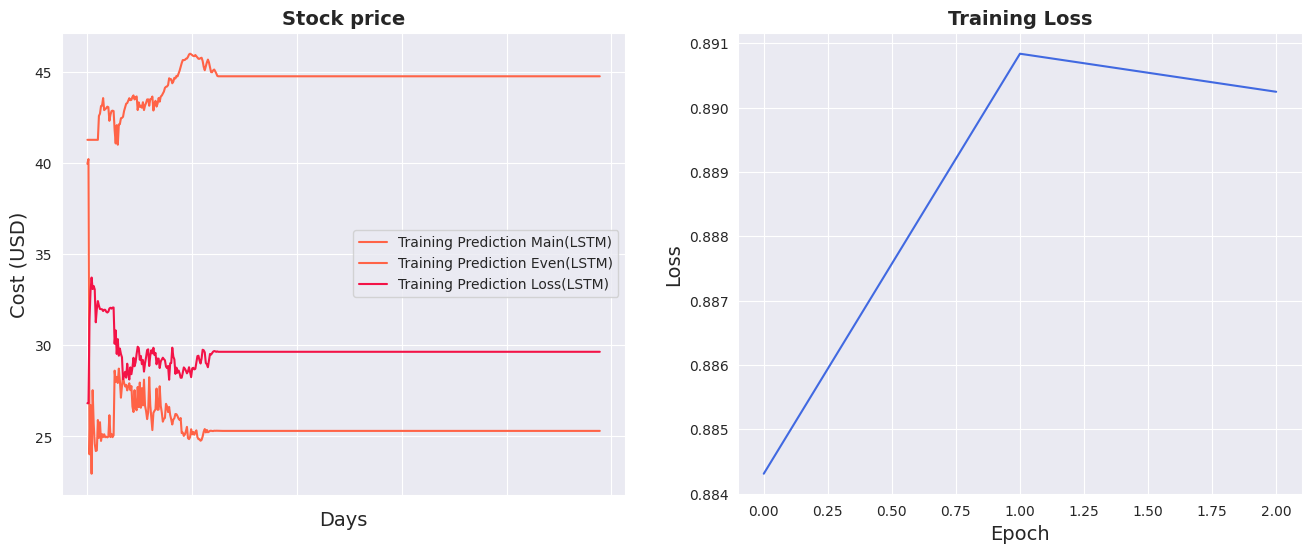

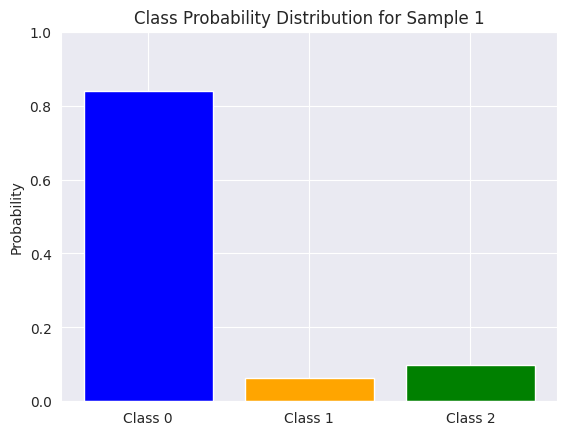

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261288.csv


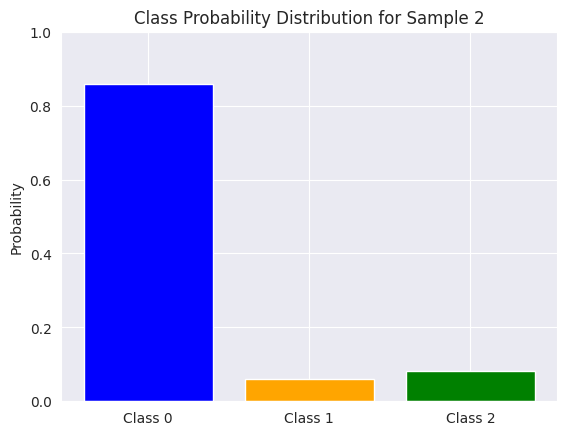

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261288.csv


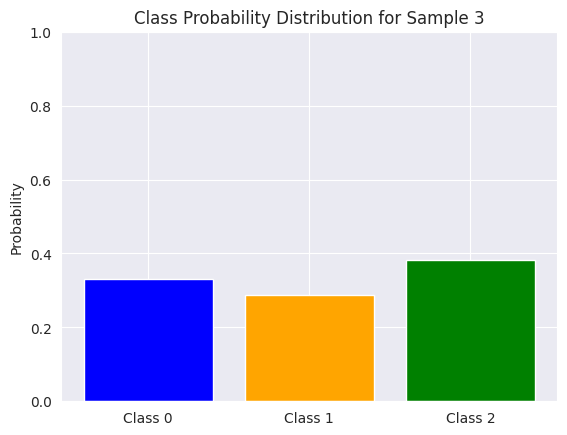

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261288.csv


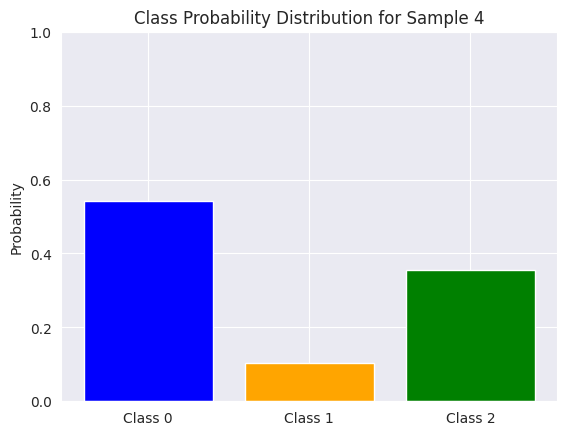

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261288.csv


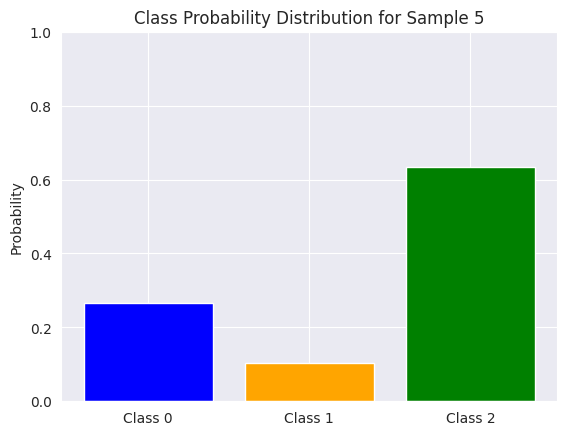

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261288.csv


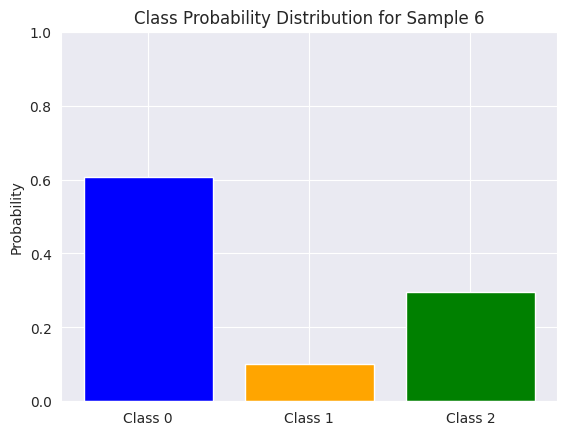

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261288.csv


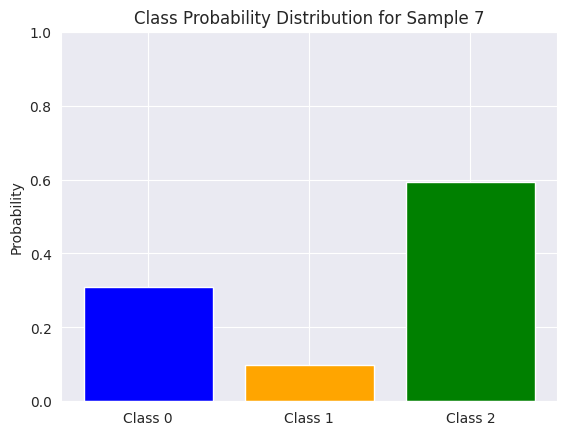

/content/drive/MyDrive/ftTrainDataTest/mw_1266449.csv
(500,)
num_batches:  1  data_main.shape[0]:  490
Number of training batches: 1
x_train.shape =  (490, 9, 1)
y_train.shape =  (490, 1)
x_test.shape =  (0, 9, 1)
y_test.shape =  (0, 1)
x_result.shape =  (490, 1)
0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1266449.csv


/tmp/ipykernel_3379/1856099931.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

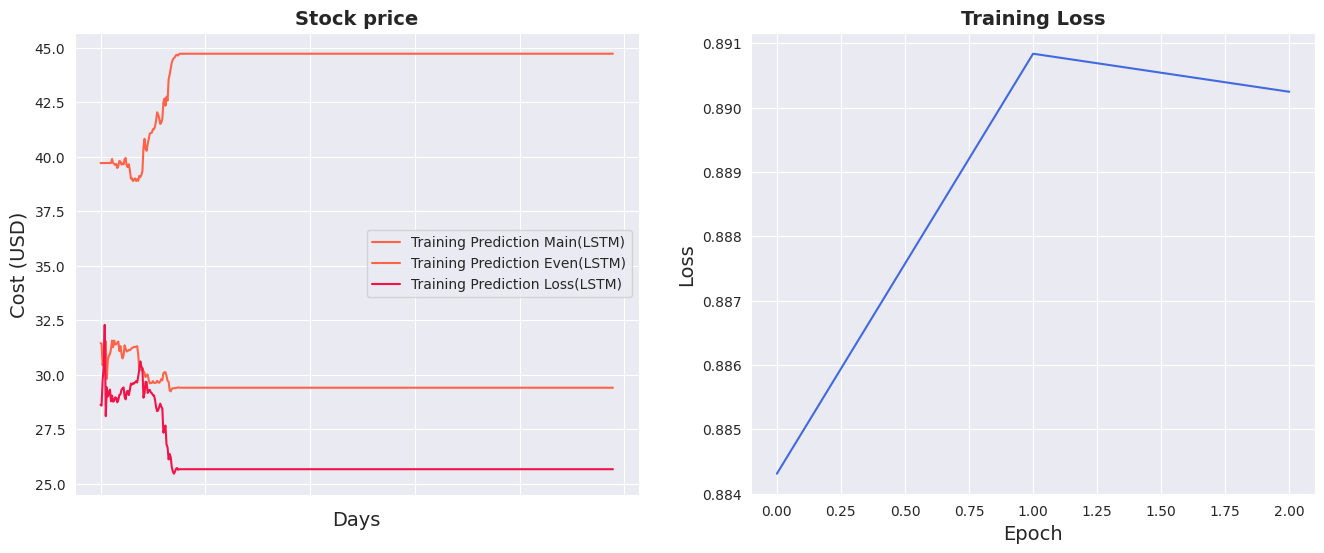

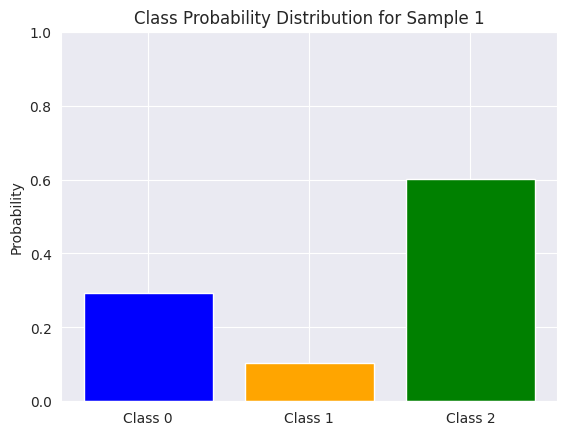

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1266449.csv


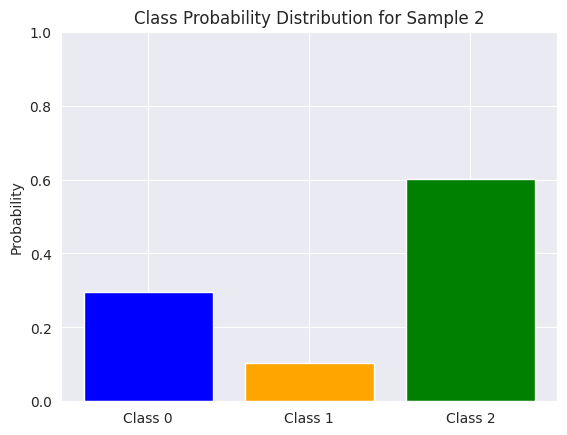

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1266449.csv


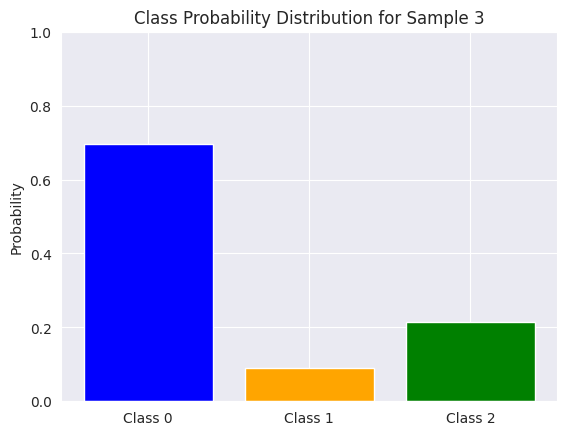

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1266449.csv


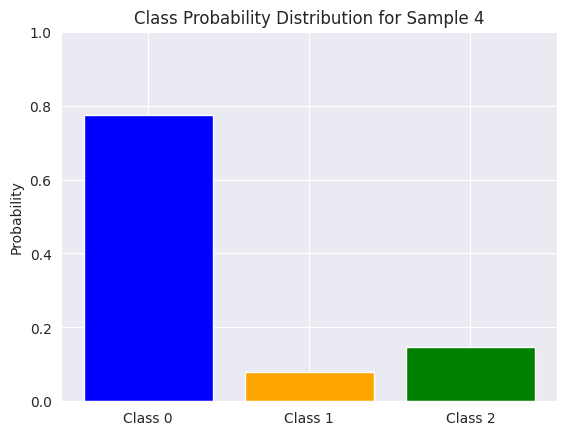

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1266449.csv


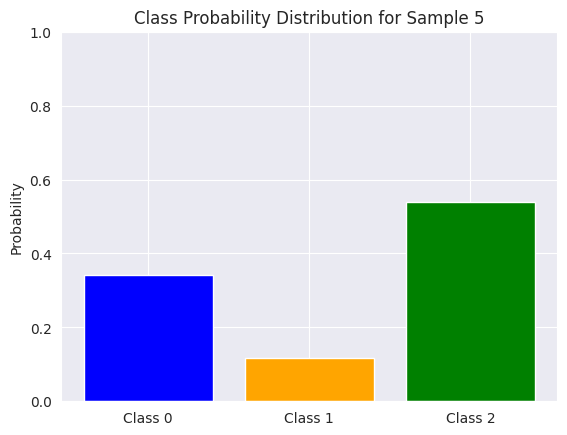

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1266449.csv


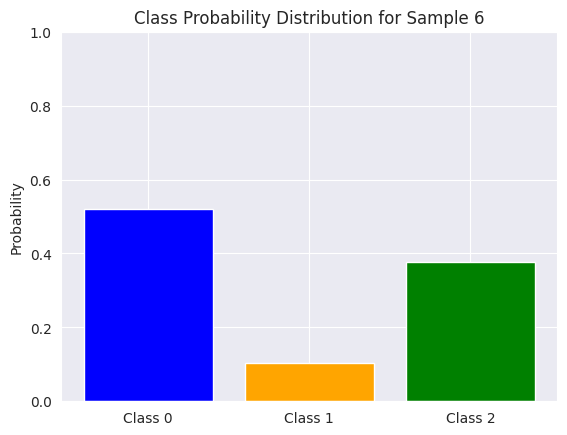

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1266449.csv


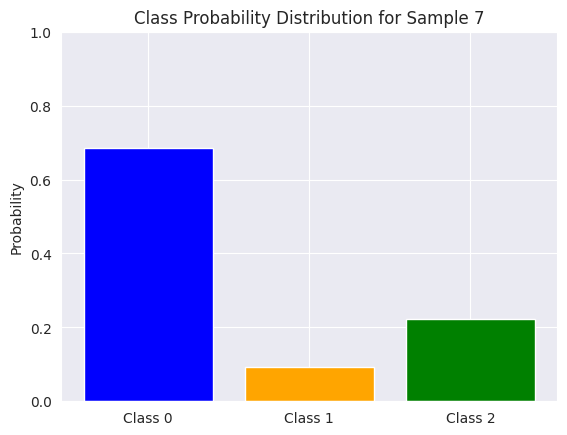

/content/drive/MyDrive/ftTrainDataTest/mw_1267754.csv
(500,)
num_batches:  1  data_main.shape[0]:  490
Number of training batches: 1
x_train.shape =  (490, 9, 1)
y_train.shape =  (490, 1)
x_test.shape =  (0, 9, 1)
y_test.shape =  (0, 1)
x_result.shape =  (490, 1)
0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267754.csv


/tmp/ipykernel_3379/1856099931.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

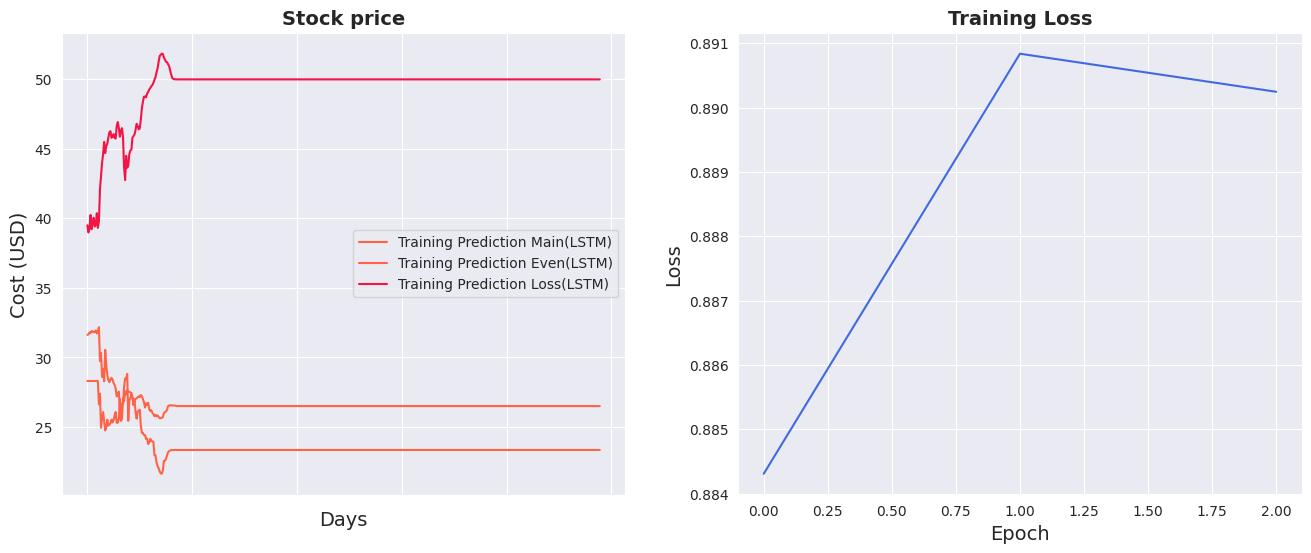

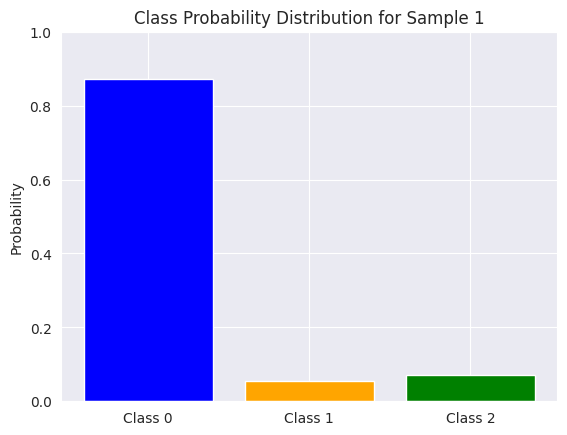

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267754.csv


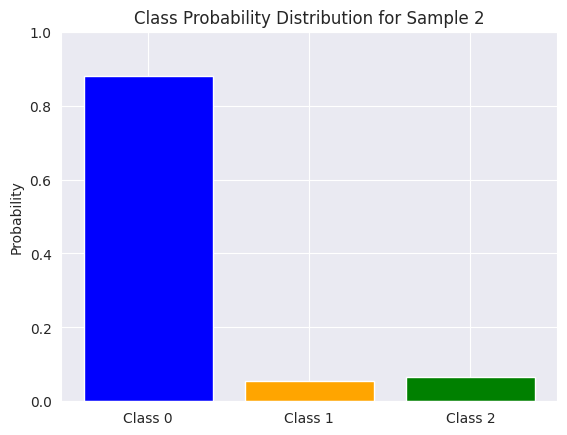

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267754.csv


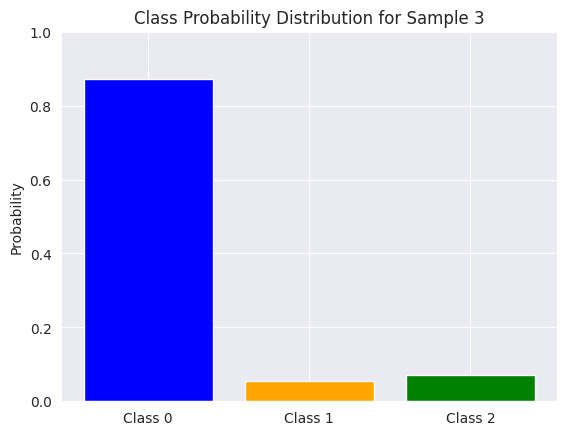

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267754.csv


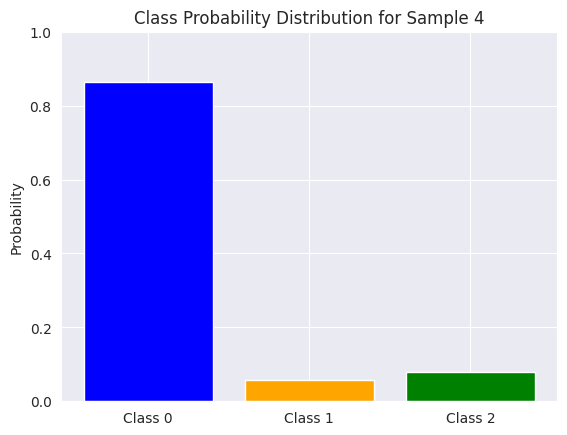

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267754.csv


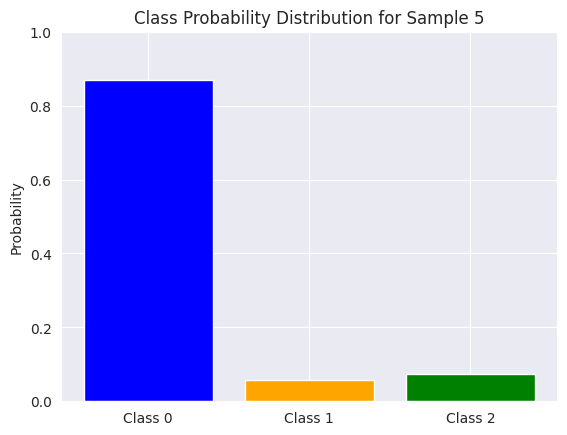

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267754.csv


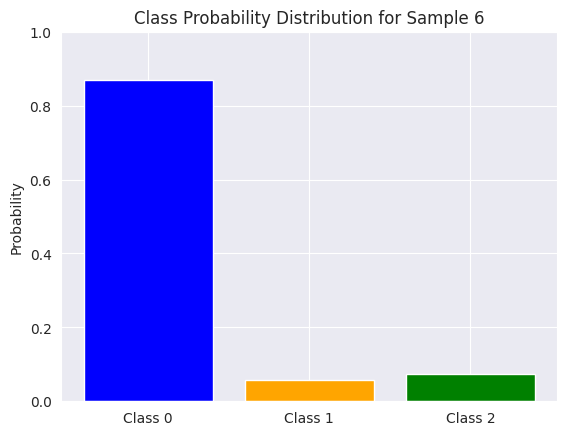

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267754.csv


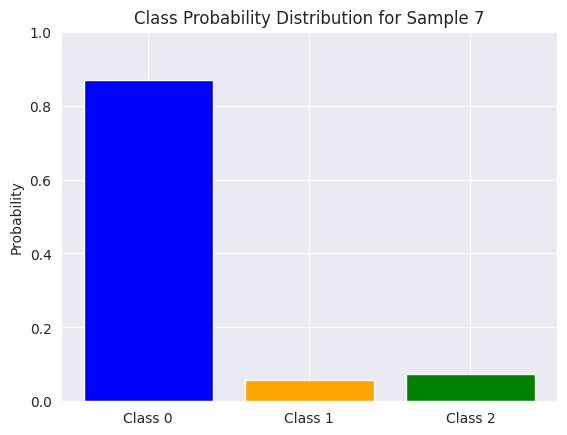

/content/drive/MyDrive/ftTrainDataTest/mw_1263339.csv
(500,)
num_batches:  1  data_main.shape[0]:  490
Number of training batches: 1
x_train.shape =  (490, 9, 1)
y_train.shape =  (490, 1)
x_test.shape =  (0, 9, 1)
y_test.shape =  (0, 1)
x_result.shape =  (490, 1)
0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263339.csv


/tmp/ipykernel_3379/1856099931.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

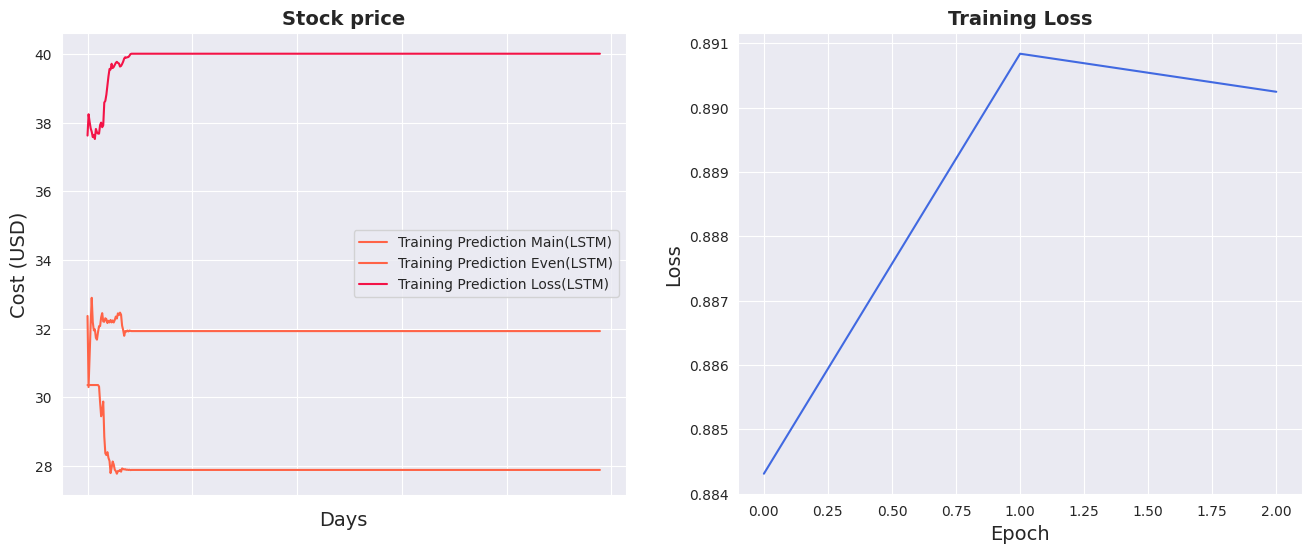

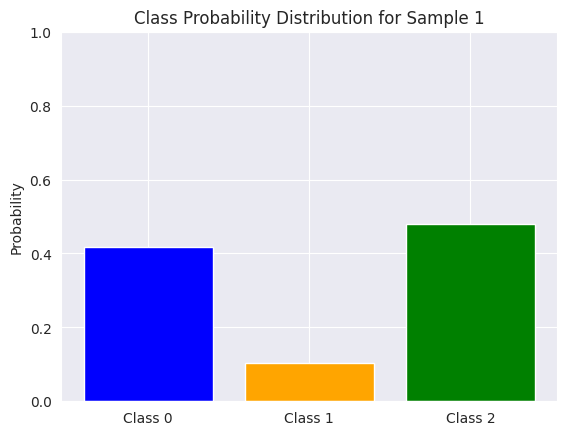

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263339.csv


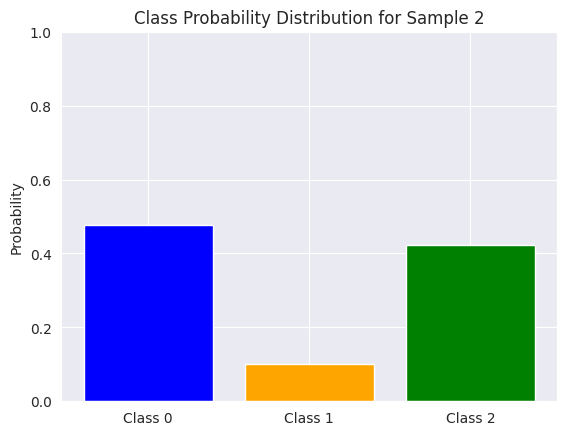

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263339.csv


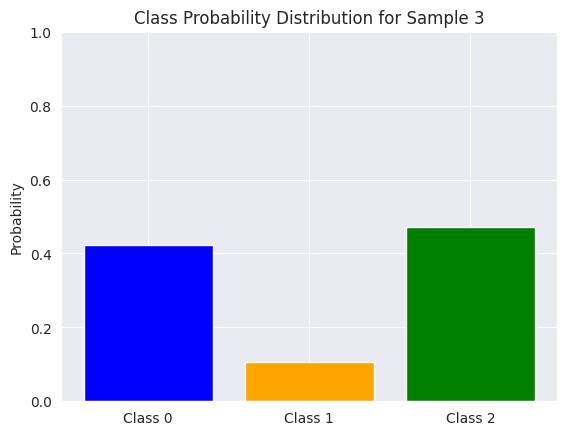

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263339.csv


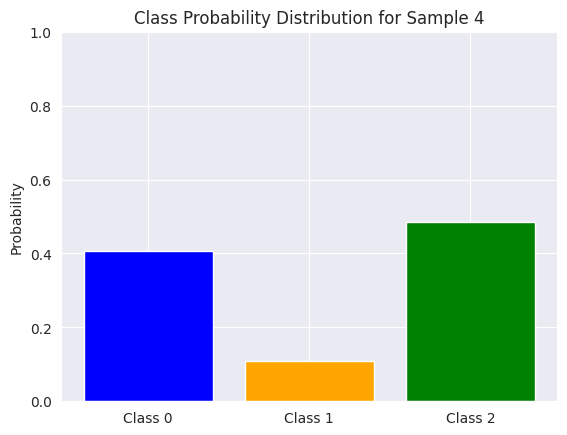

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263339.csv


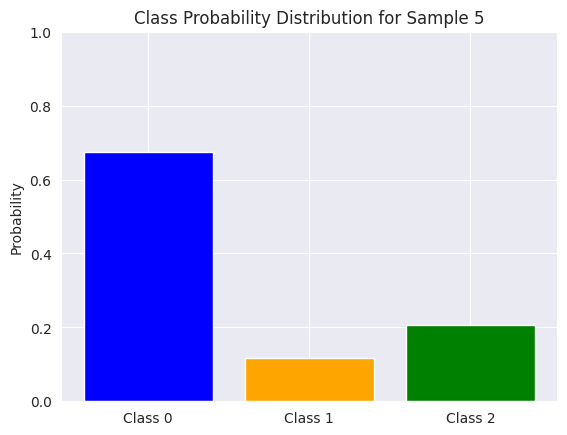

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263339.csv


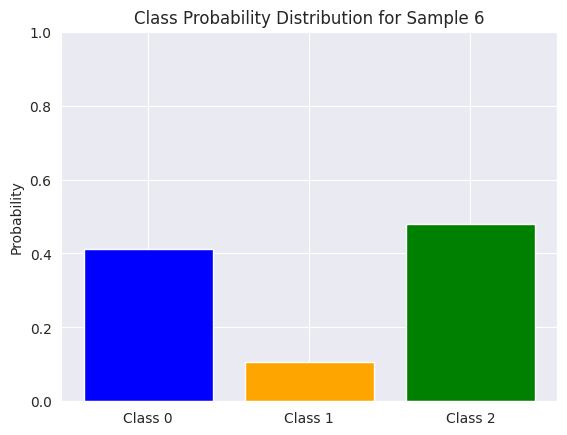

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263339.csv


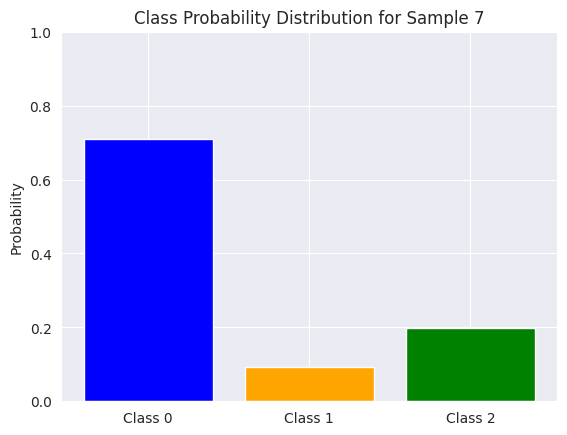

/content/drive/MyDrive/ftTrainDataTest/mw_1259748.csv
(500,)
num_batches:  1  data_main.shape[0]:  490
Number of training batches: 1
x_train.shape =  (490, 9, 1)
y_train.shape =  (490, 1)
x_test.shape =  (0, 9, 1)
y_test.shape =  (0, 1)
x_result.shape =  (490, 1)
0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1259748.csv


/tmp/ipykernel_3379/1856099931.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

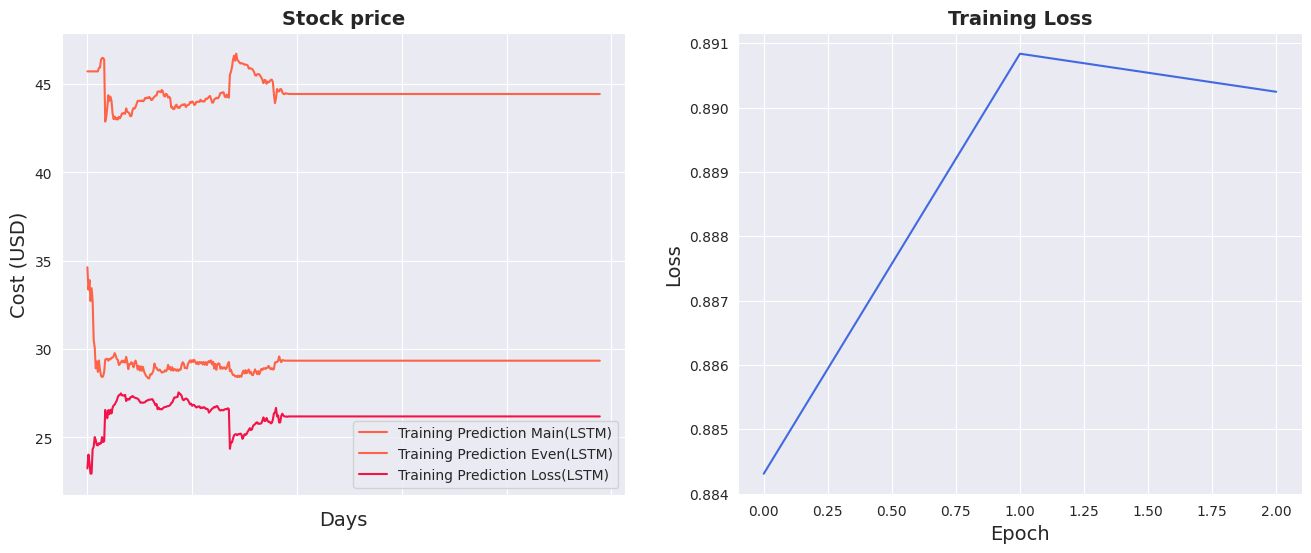

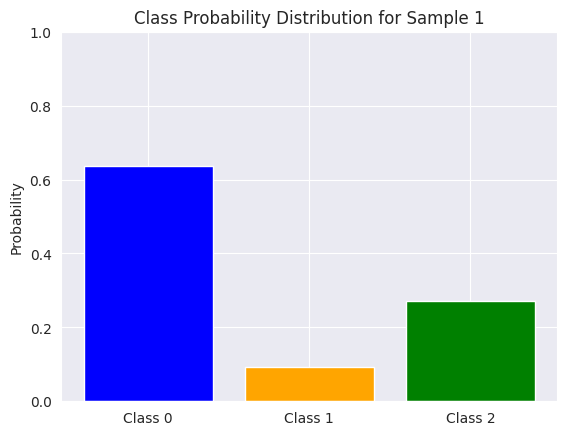

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1259748.csv


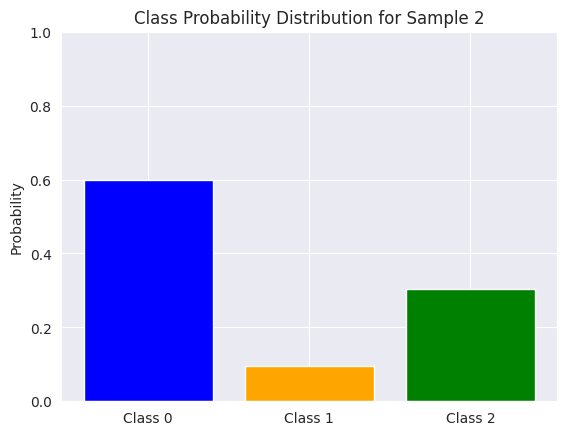

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1259748.csv


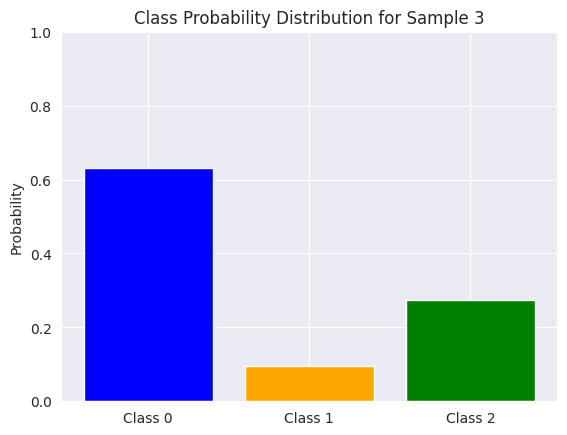

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1259748.csv


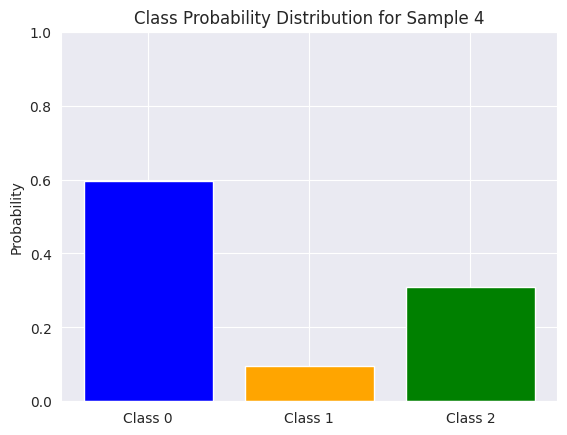

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1259748.csv


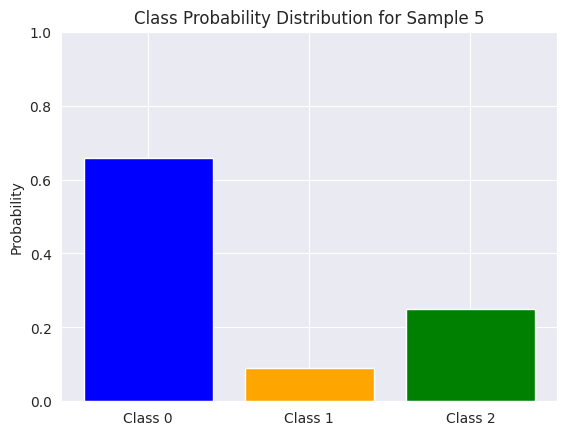

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1259748.csv


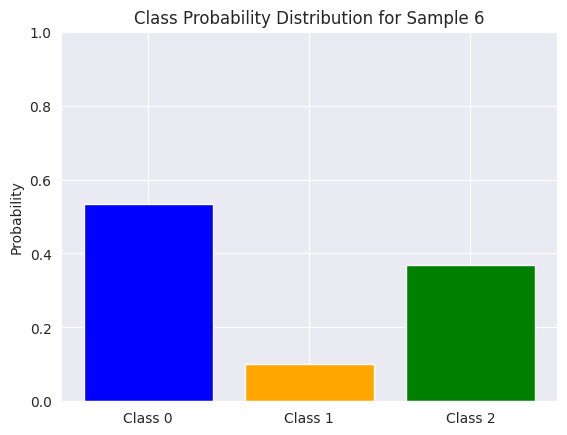

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1259748.csv


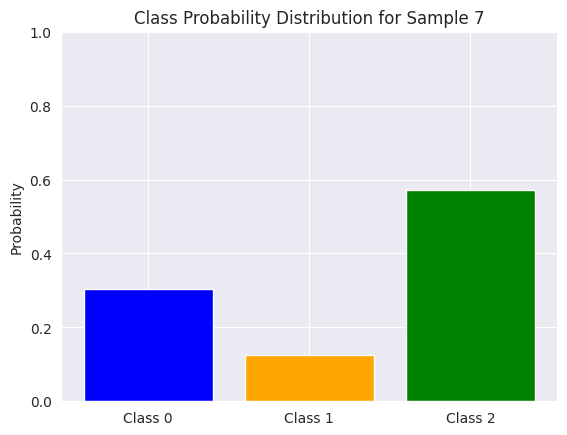

/content/drive/MyDrive/ftTrainDataTest/mw_1261797.csv
(500,)
num_batches:  1  data_main.shape[0]:  490
Number of training batches: 1
x_train.shape =  (490, 9, 1)
y_train.shape =  (490, 1)
x_test.shape =  (0, 9, 1)
y_test.shape =  (0, 1)
x_result.shape =  (490, 1)
0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261797.csv


/tmp/ipykernel_3379/1856099931.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

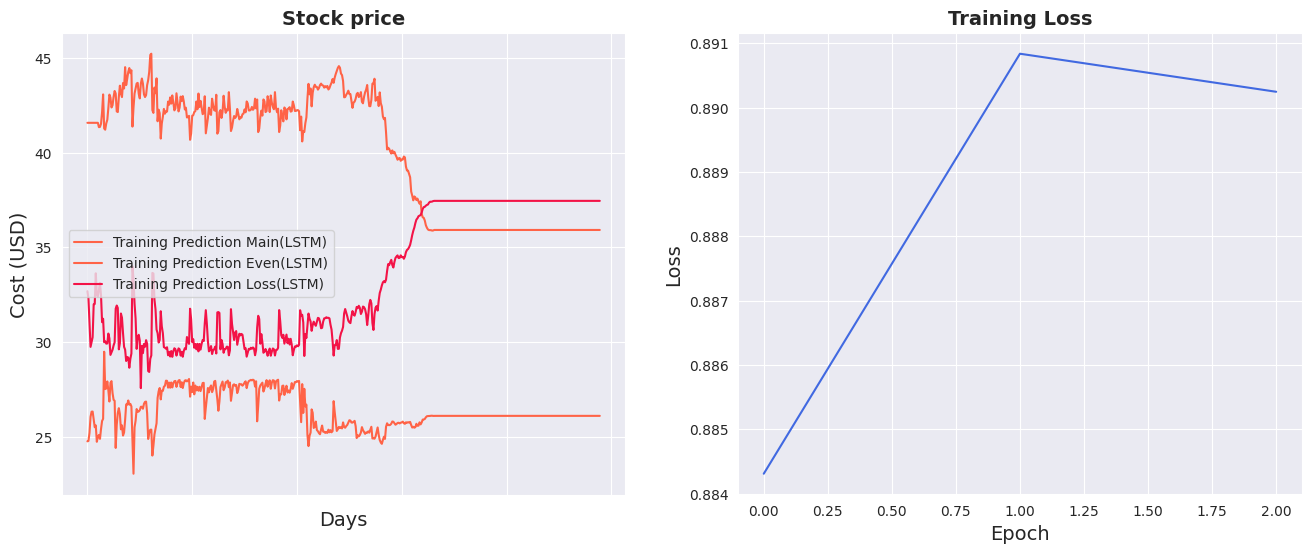

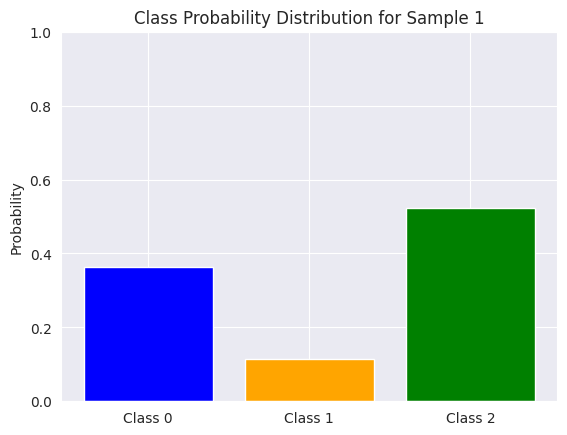

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261797.csv


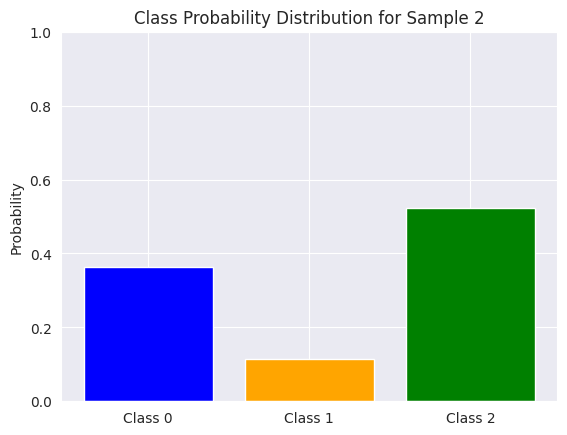

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261797.csv


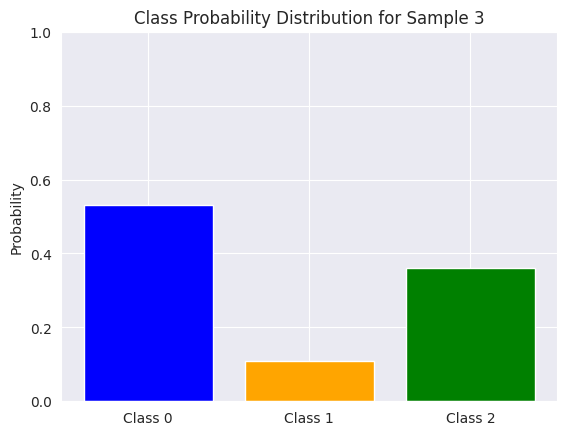

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261797.csv


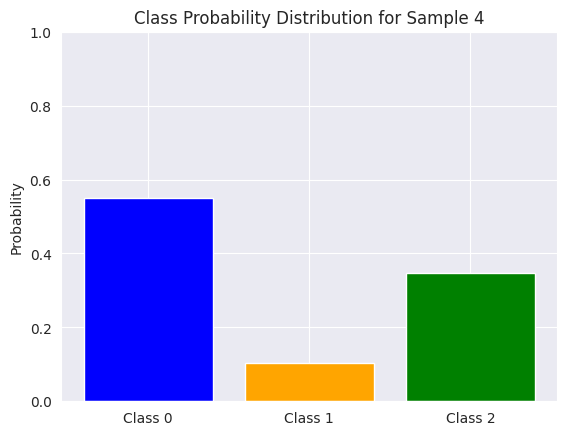

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261797.csv


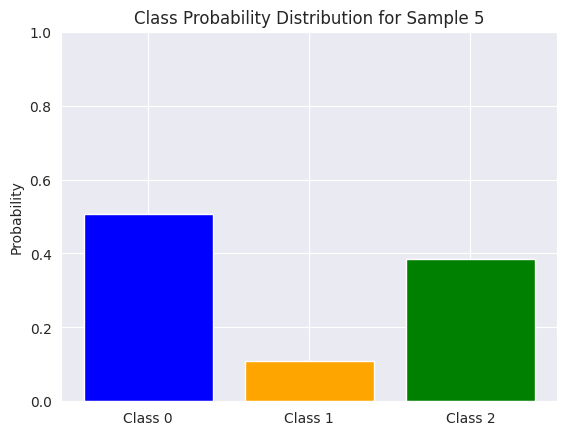

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261797.csv


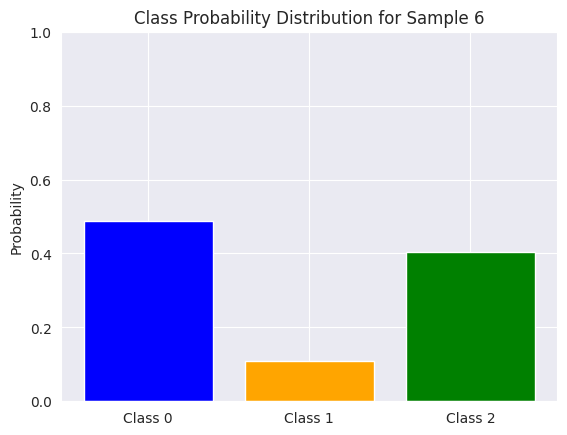

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261797.csv


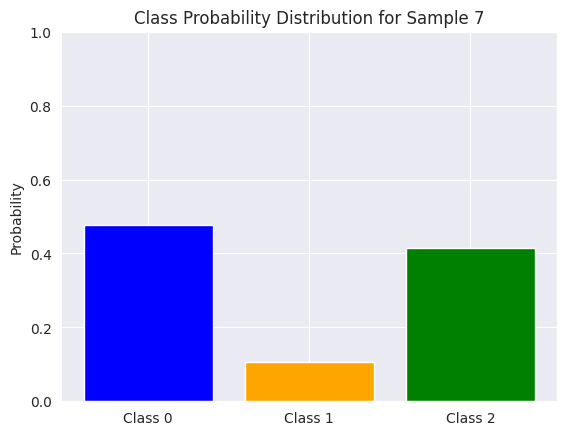

/content/drive/MyDrive/ftTrainDataTest/mw_1273837.csv
(500,)
num_batches:  1  data_main.shape[0]:  490
Number of training batches: 1
x_train.shape =  (490, 9, 1)
y_train.shape =  (490, 1)
x_test.shape =  (0, 9, 1)
y_test.shape =  (0, 1)
x_result.shape =  (490, 1)
0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1273837.csv


/tmp/ipykernel_3379/1856099931.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

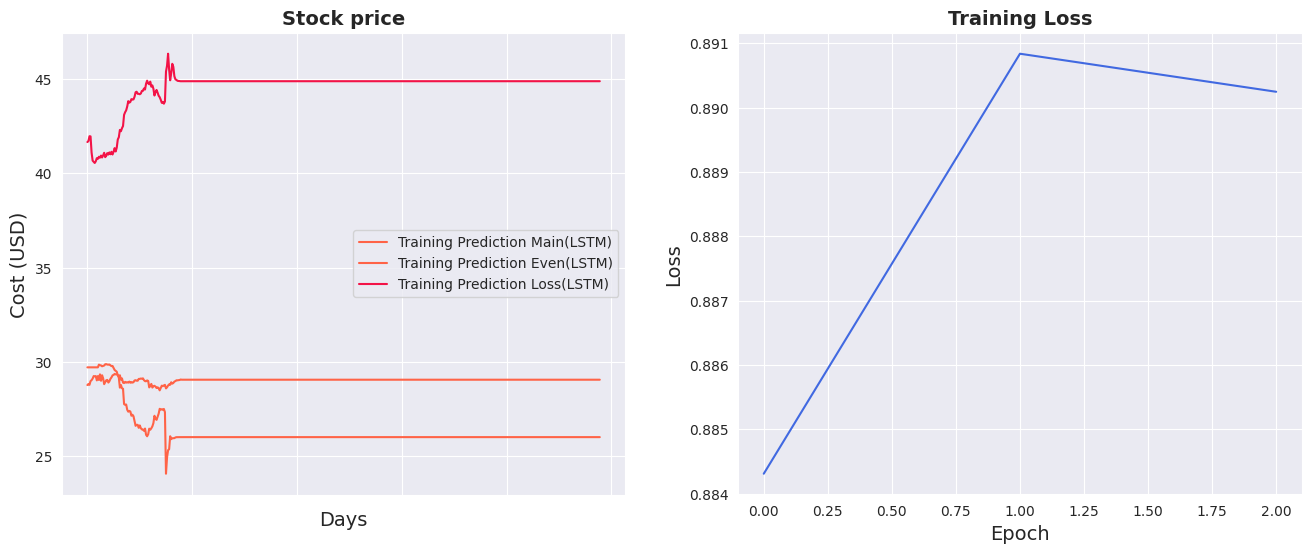

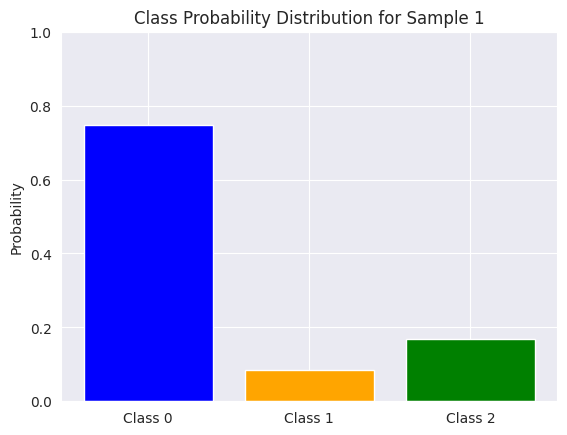

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1273837.csv


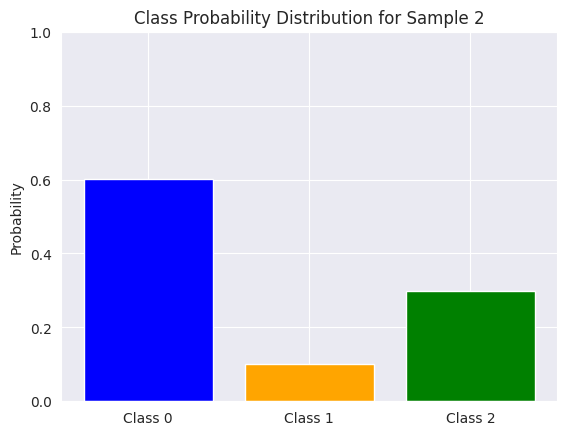

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1273837.csv


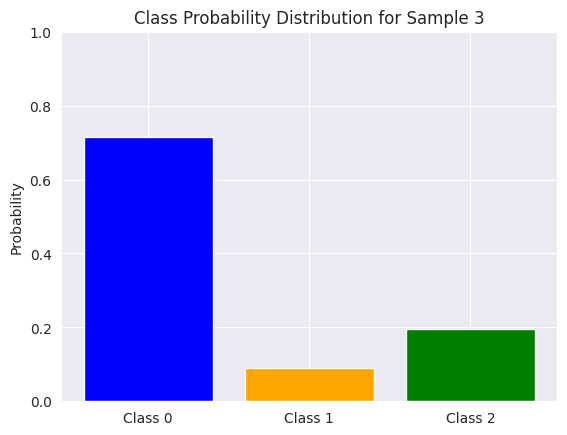

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1273837.csv


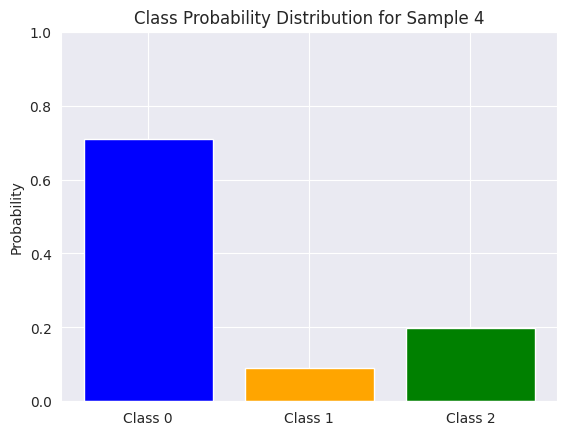

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1273837.csv


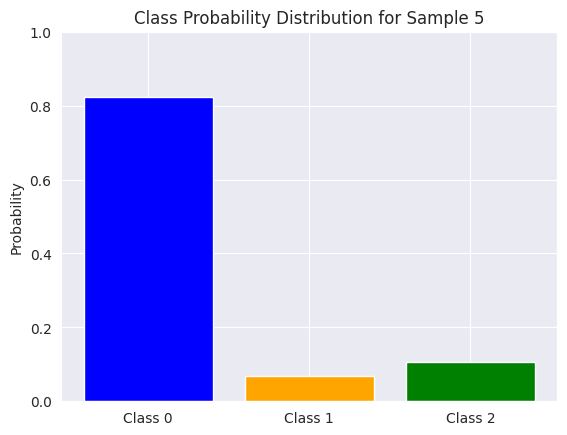

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1273837.csv


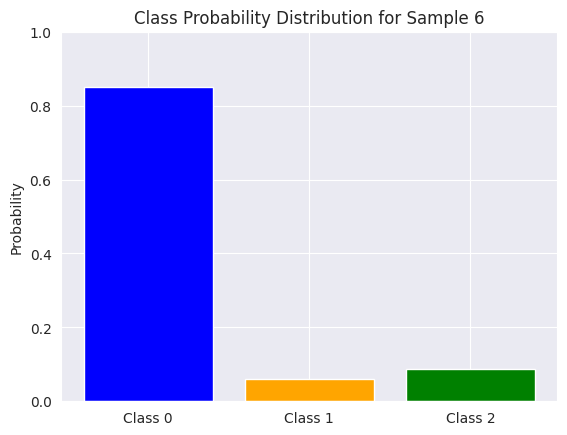

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1273837.csv


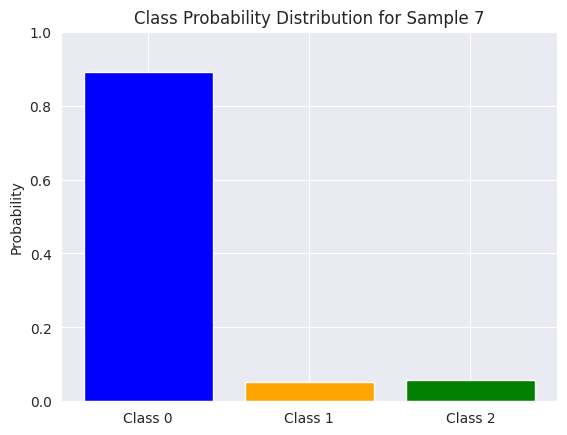

/content/drive/MyDrive/ftTrainDataTest/mw_1271707.csv
(500,)
num_batches:  1  data_main.shape[0]:  490
Number of training batches: 1
x_train.shape =  (490, 9, 1)
y_train.shape =  (490, 1)
x_test.shape =  (0, 9, 1)
y_test.shape =  (0, 1)
x_result.shape =  (490, 1)
0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1271707.csv


/tmp/ipykernel_3379/1856099931.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

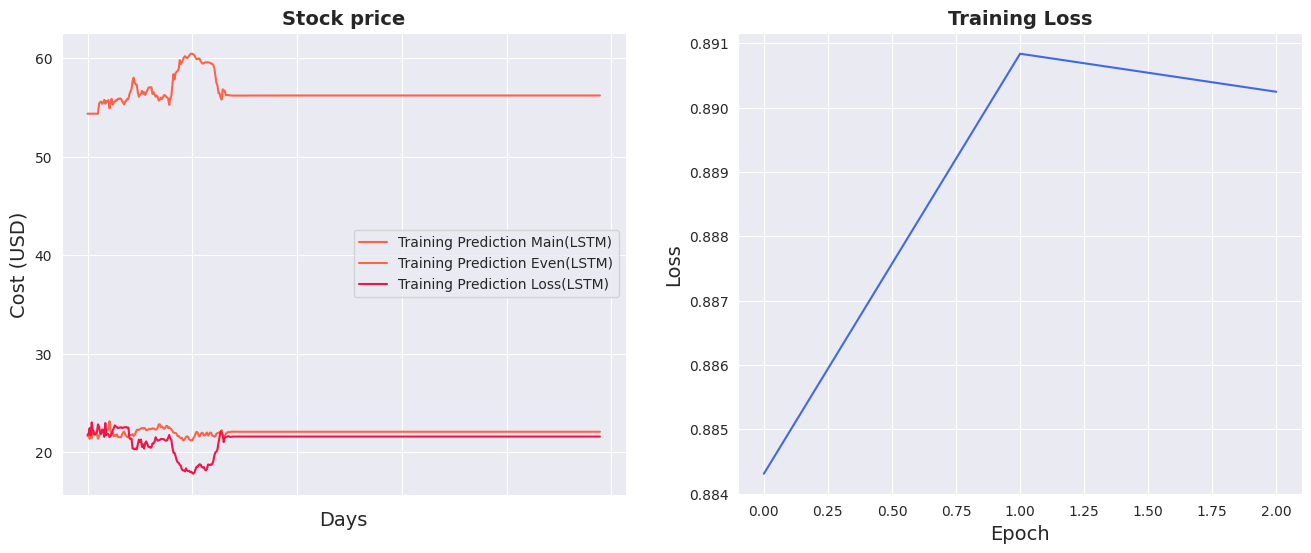

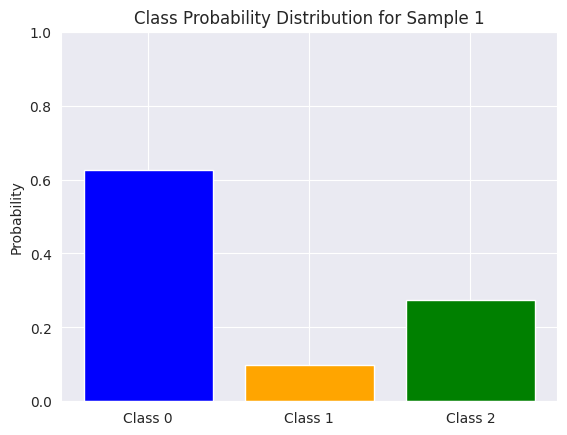

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1271707.csv


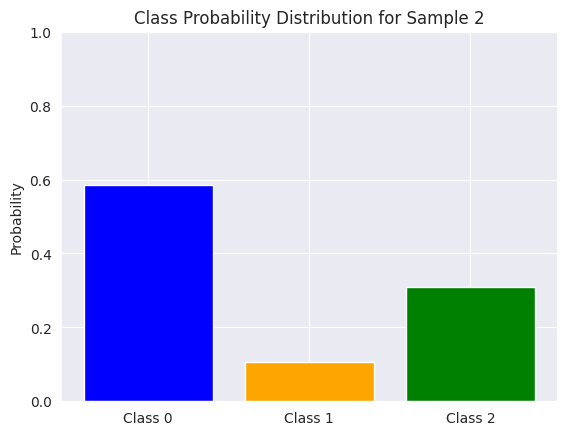

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1271707.csv


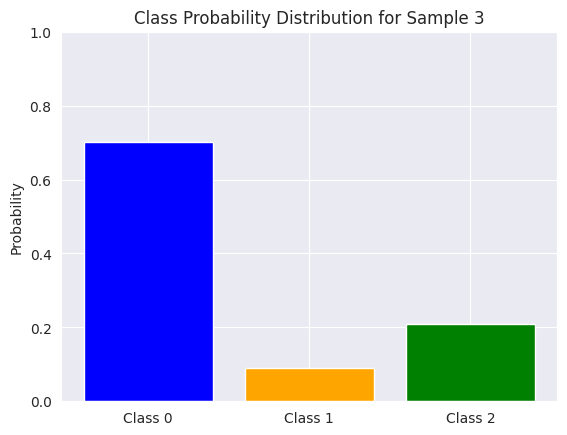

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1271707.csv


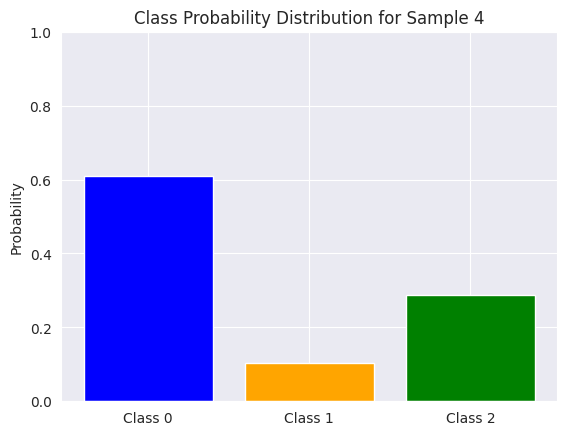

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1271707.csv


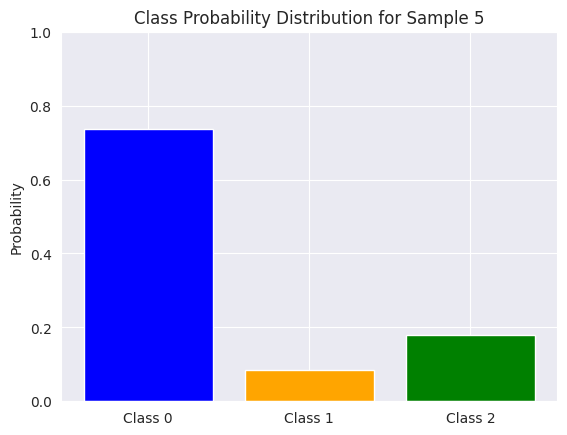

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1271707.csv


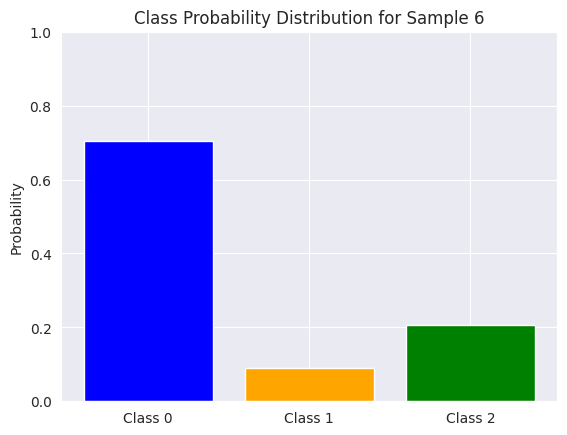

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1271707.csv


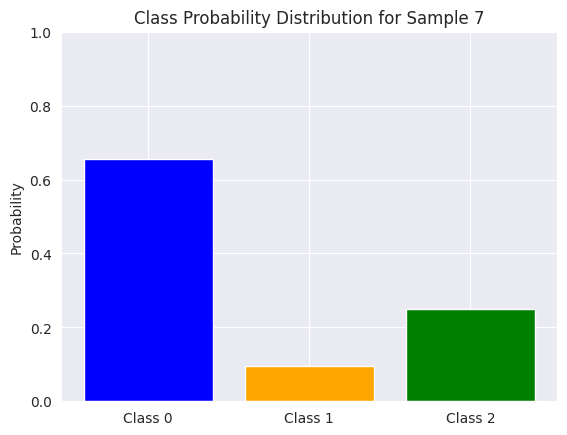

/content/drive/MyDrive/ftTrainDataTest/mw_1270744.csv
(500,)
num_batches:  1  data_main.shape[0]:  490
Number of training batches: 1
x_train.shape =  (490, 9, 1)
y_train.shape =  (490, 1)
x_test.shape =  (0, 9, 1)
y_test.shape =  (0, 1)
x_result.shape =  (490, 1)
0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1270744.csv


/tmp/ipykernel_3379/1856099931.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

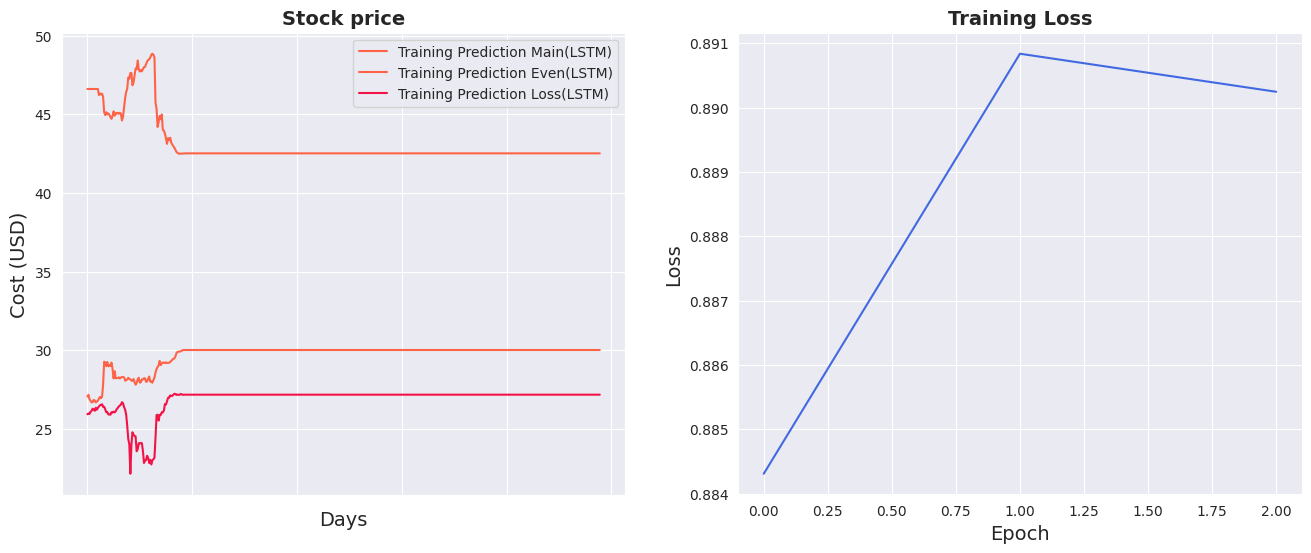

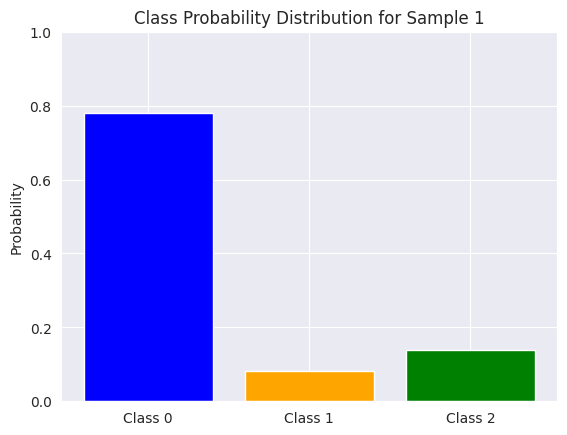

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1270744.csv


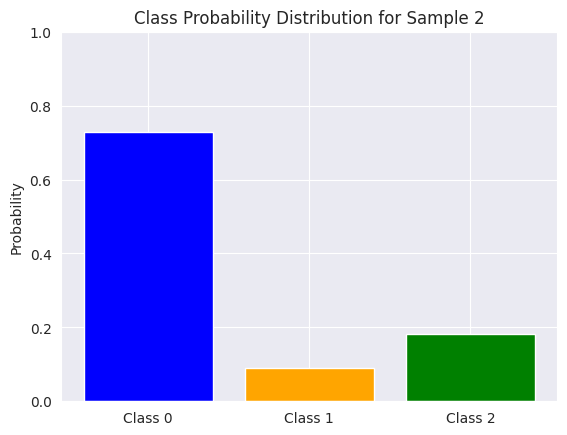

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1270744.csv


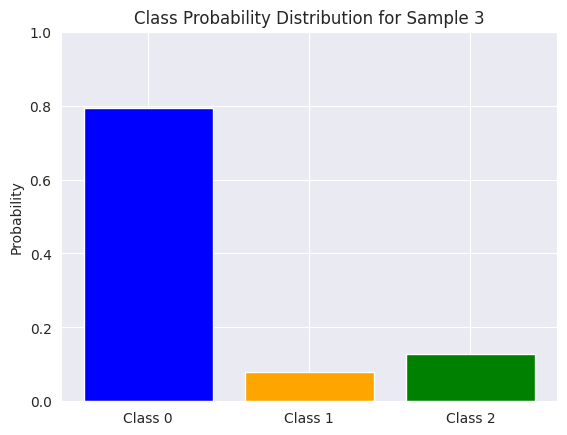

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1270744.csv


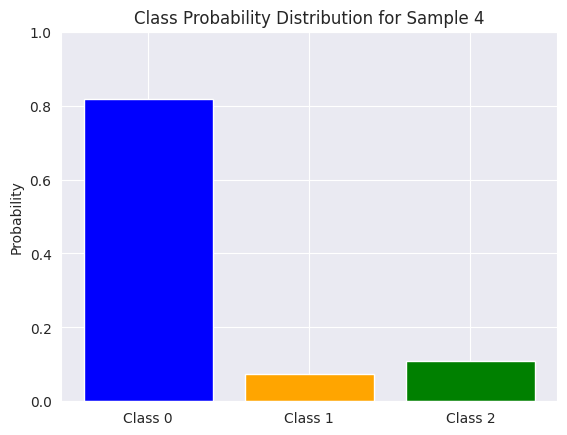

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1270744.csv


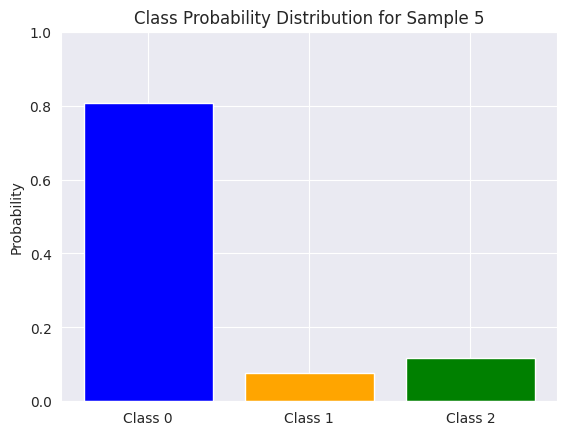

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1270744.csv


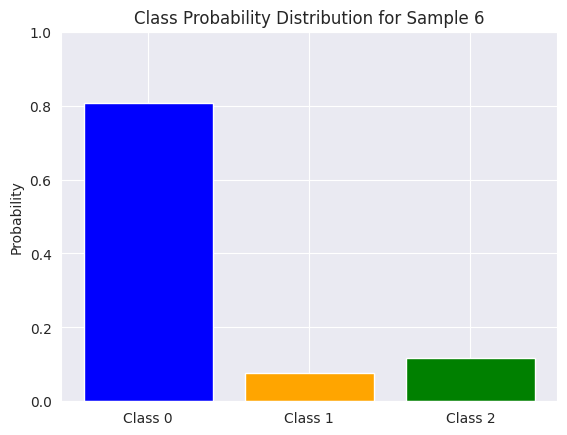

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1270744.csv


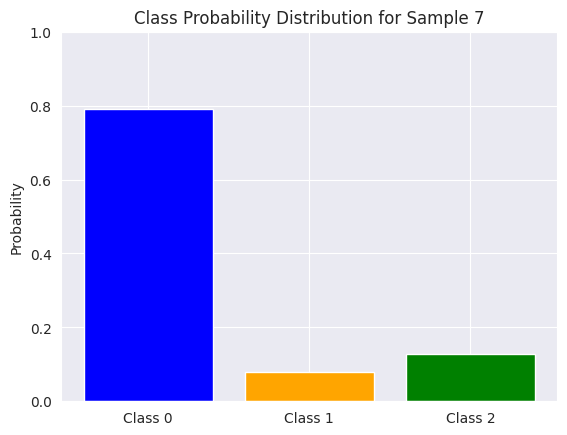

/content/drive/MyDrive/ftTrainDataTest/mw_1261287.csv
(500,)
num_batches:  1  data_main.shape[0]:  490
Number of training batches: 1
x_train.shape =  (490, 9, 1)
y_train.shape =  (490, 1)
x_test.shape =  (0, 9, 1)
y_test.shape =  (0, 1)
x_result.shape =  (490, 1)
0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261287.csv


/tmp/ipykernel_3379/1856099931.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

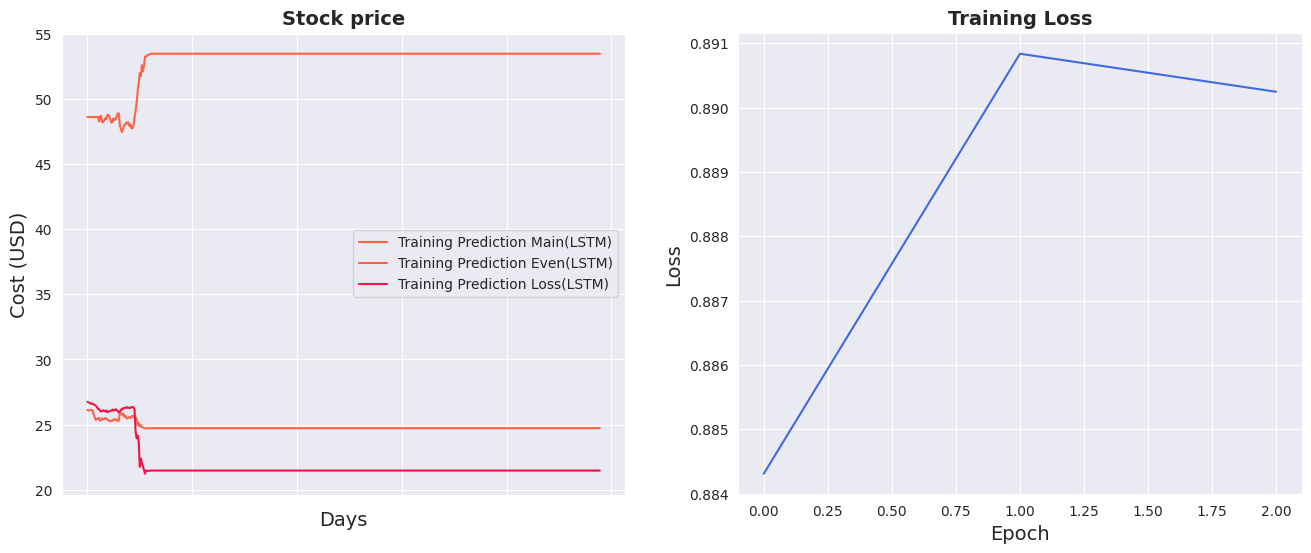

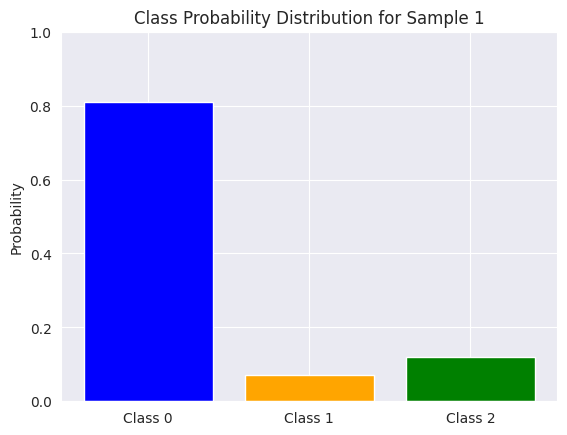

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261287.csv


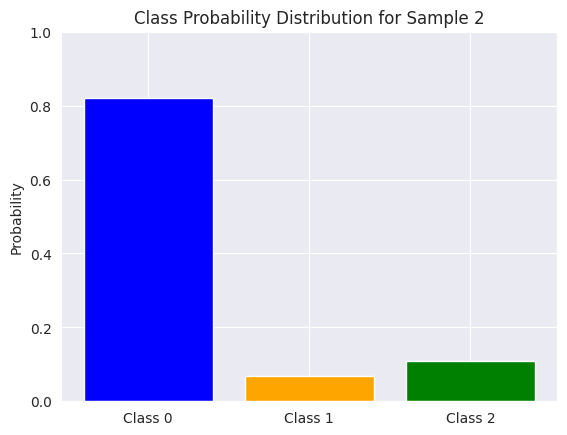

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261287.csv


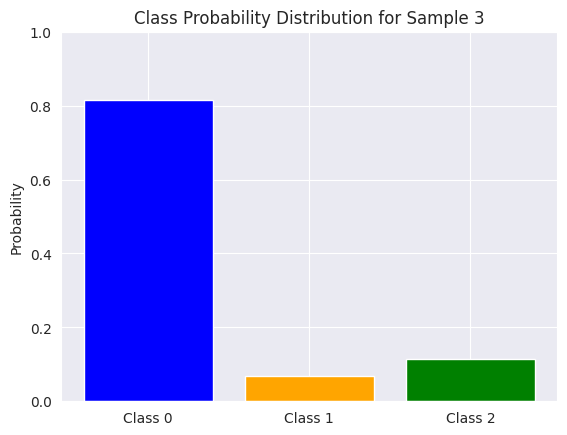

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261287.csv


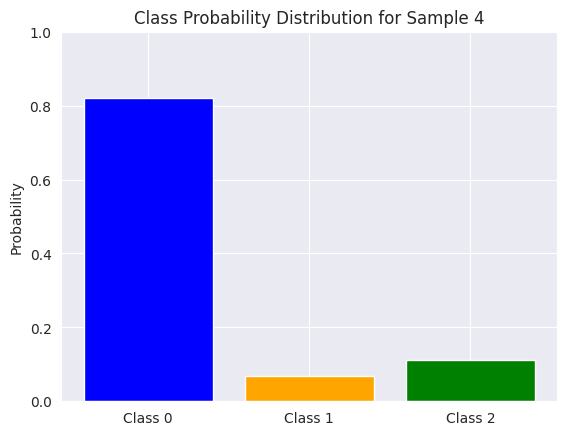

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261287.csv


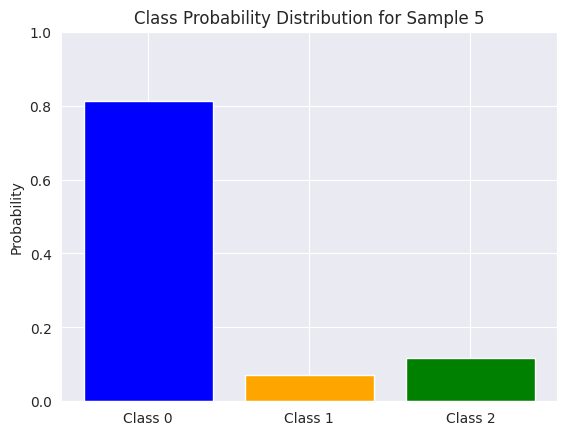

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261287.csv


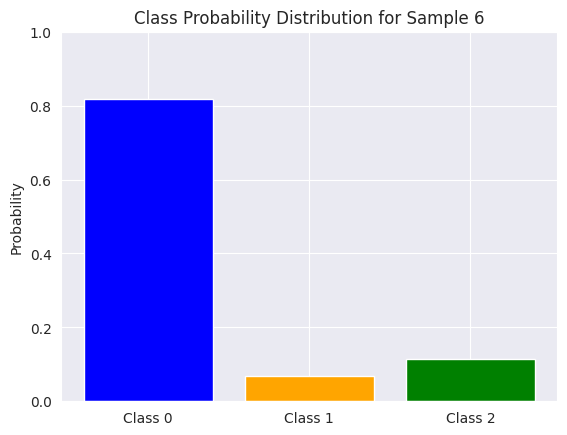

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261287.csv


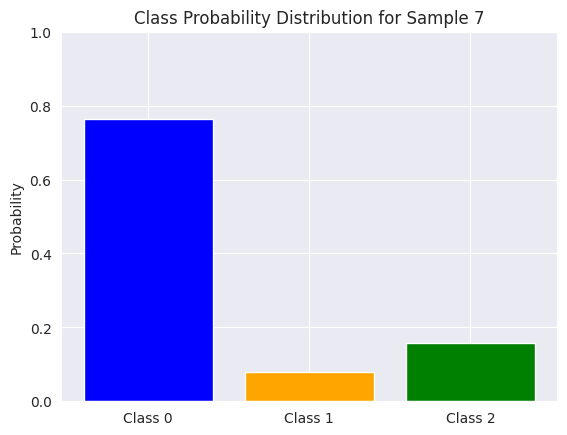

/content/drive/MyDrive/ftTrainDataTest/mw_1263334.csv
(500,)
num_batches:  1  data_main.shape[0]:  490
Number of training batches: 1
x_train.shape =  (490, 9, 1)
y_train.shape =  (490, 1)
x_test.shape =  (0, 9, 1)
y_test.shape =  (0, 1)
x_result.shape =  (490, 1)


/tmp/ipykernel_3379/1856099931.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263334.csv


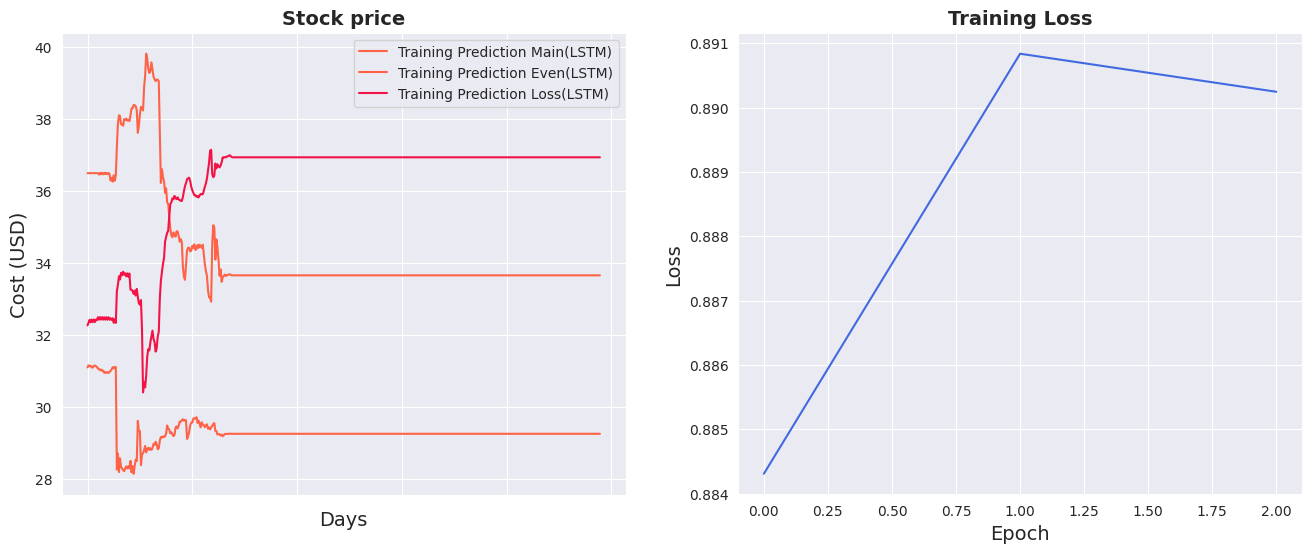

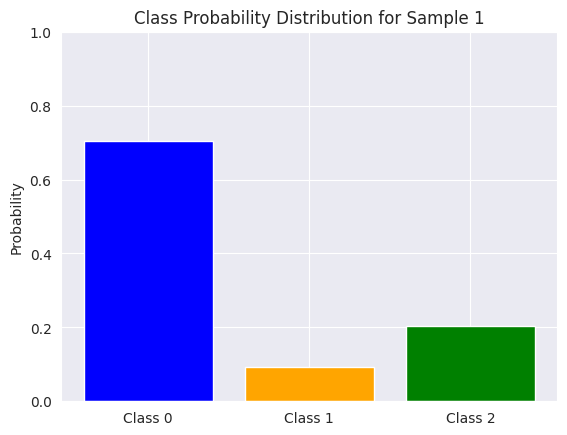

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263334.csv


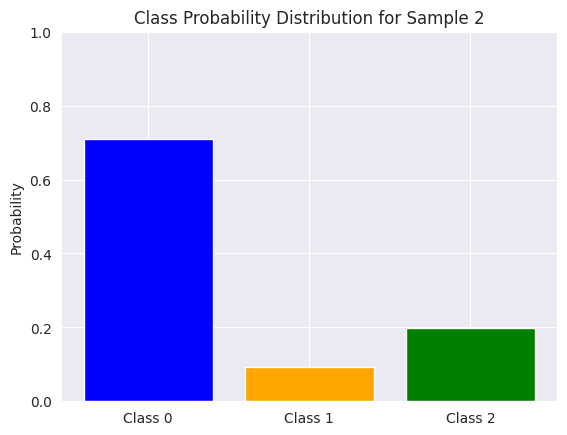

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263334.csv


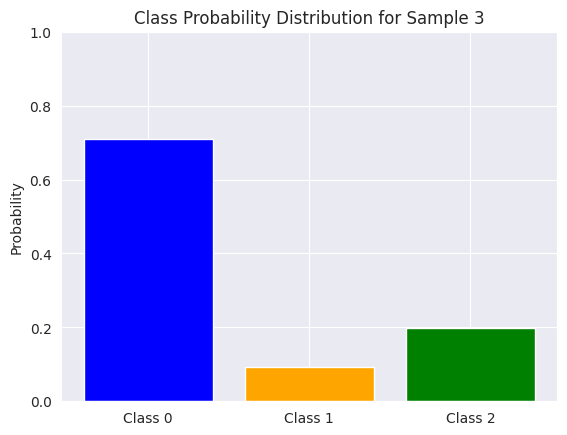

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263334.csv


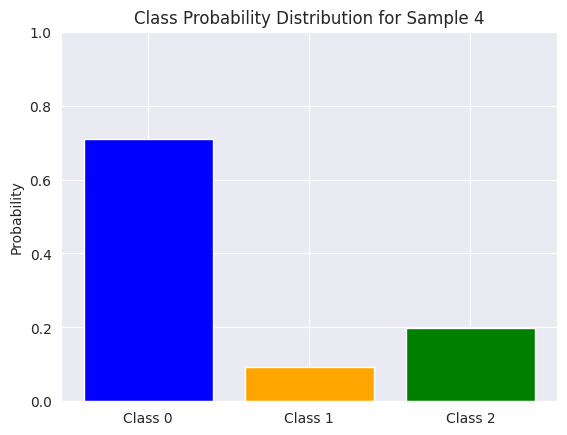

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263334.csv


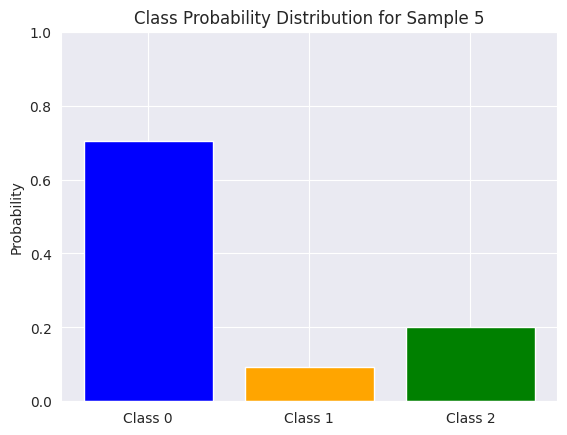

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263334.csv


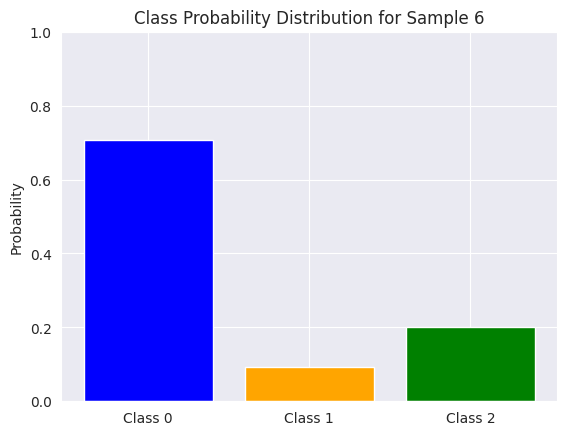

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263334.csv


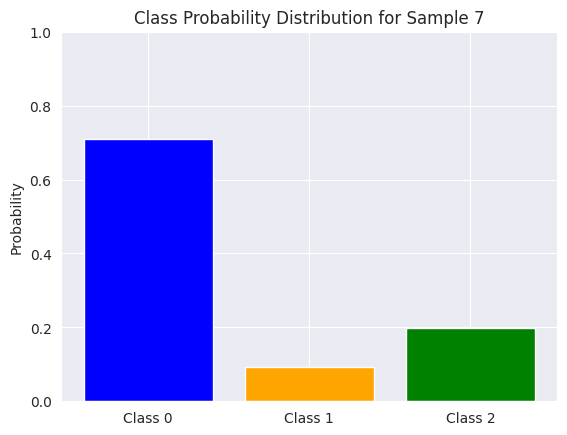

/content/drive/MyDrive/ftTrainDataTest/mw_1257720.csv
(500,)
num_batches:  1  data_main.shape[0]:  490
Number of training batches: 1
x_train.shape =  (490, 9, 1)
y_train.shape =  (490, 1)
x_test.shape =  (0, 9, 1)
y_test.shape =  (0, 1)
x_result.shape =  (490, 1)
0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1257720.csv


/tmp/ipykernel_3379/1856099931.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

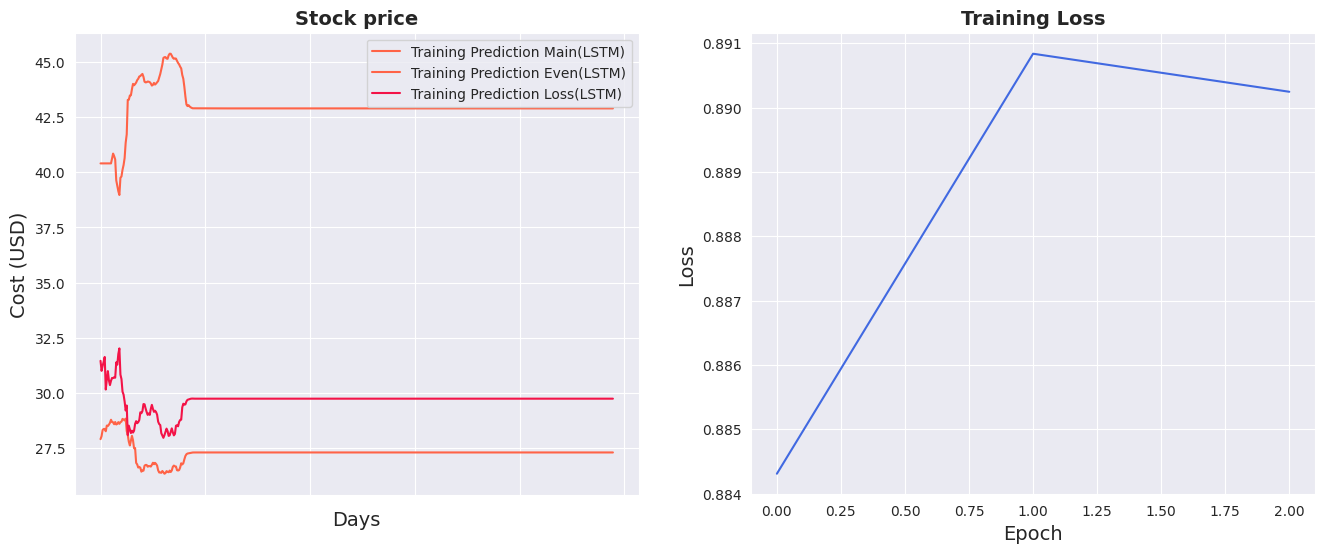

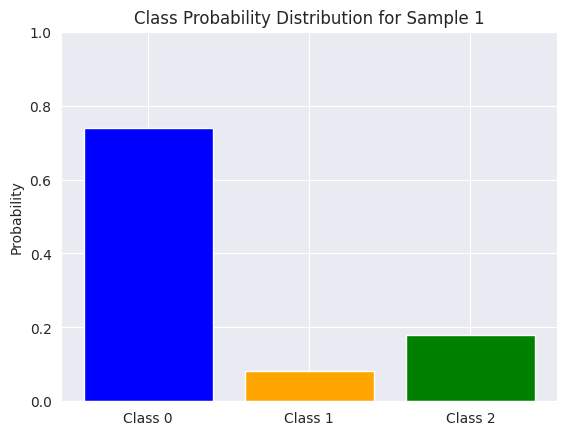

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1257720.csv


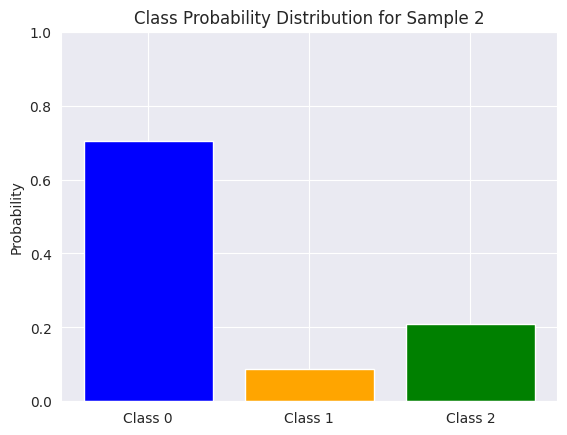

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1257720.csv


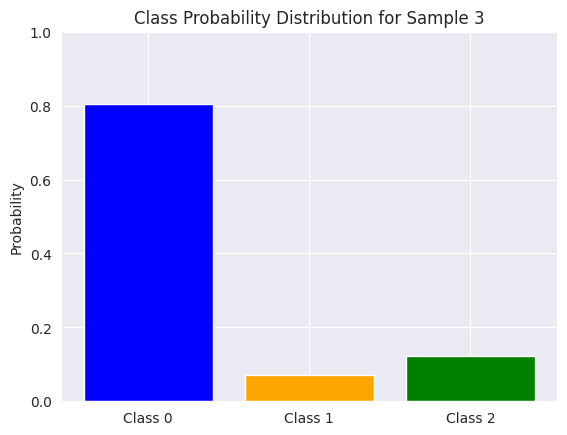

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1257720.csv


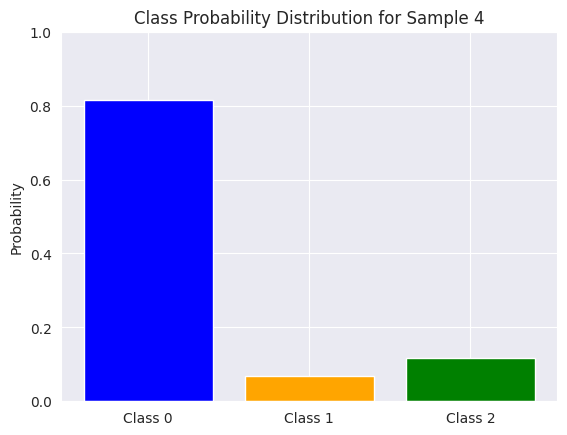

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1257720.csv


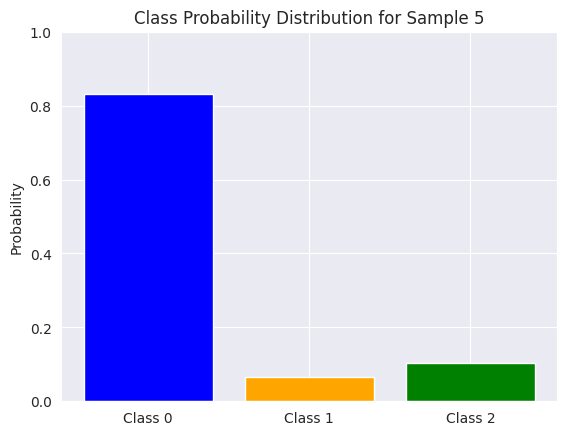

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1257720.csv


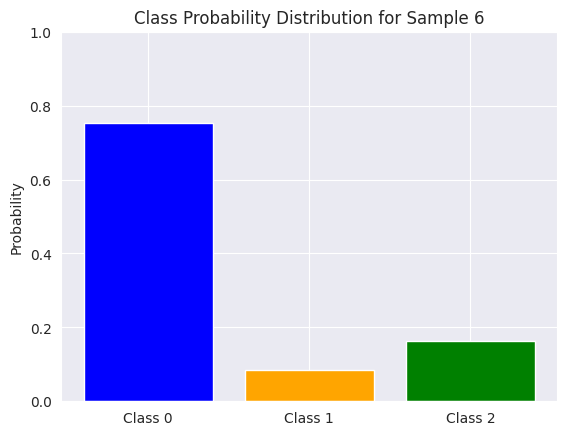

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1257720.csv


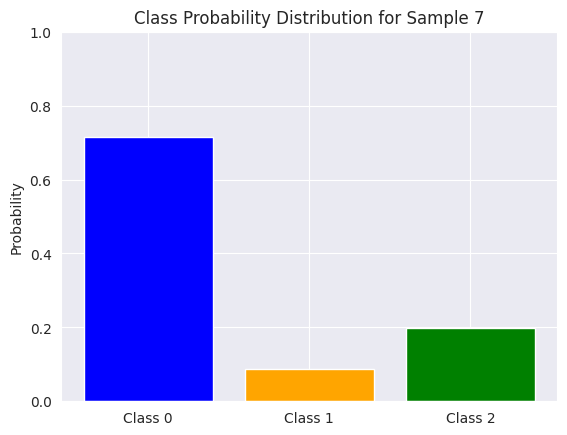

/content/drive/MyDrive/ftTrainDataTest/mw_1271708.csv
(500,)
num_batches:  1  data_main.shape[0]:  490
Number of training batches: 1
x_train.shape =  (490, 9, 1)
y_train.shape =  (490, 1)
x_test.shape =  (0, 9, 1)
y_test.shape =  (0, 1)
x_result.shape =  (490, 1)
0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1271708.csv


/tmp/ipykernel_3379/1856099931.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

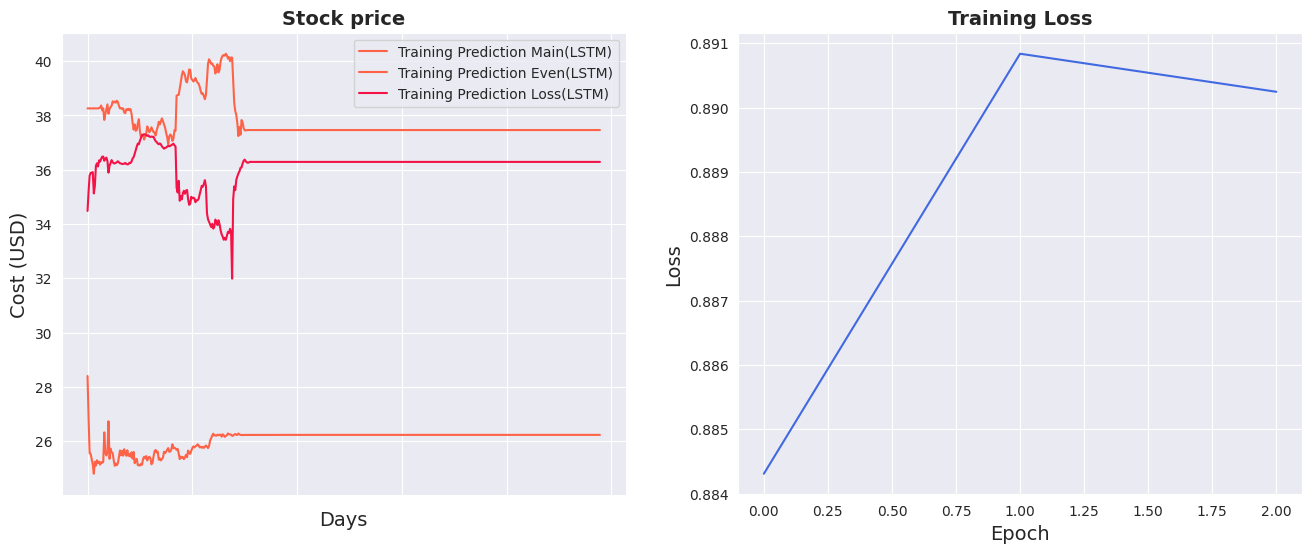

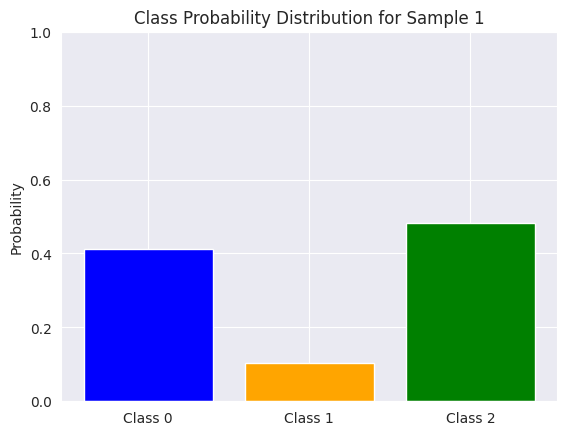

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1271708.csv


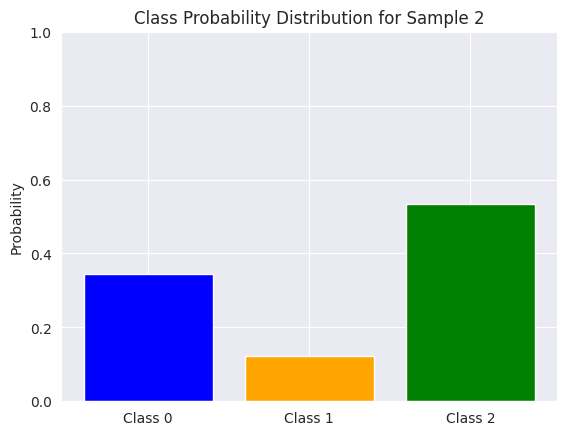

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1271708.csv


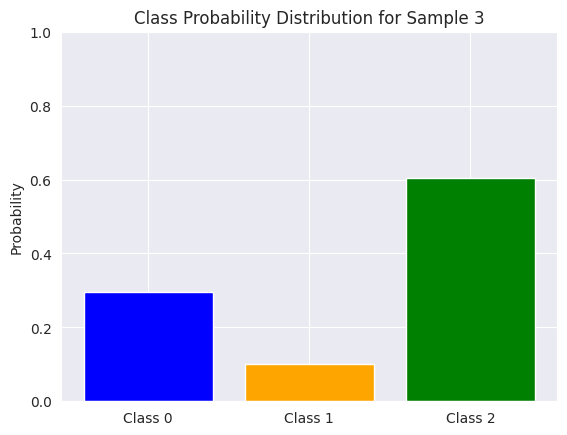

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1271708.csv


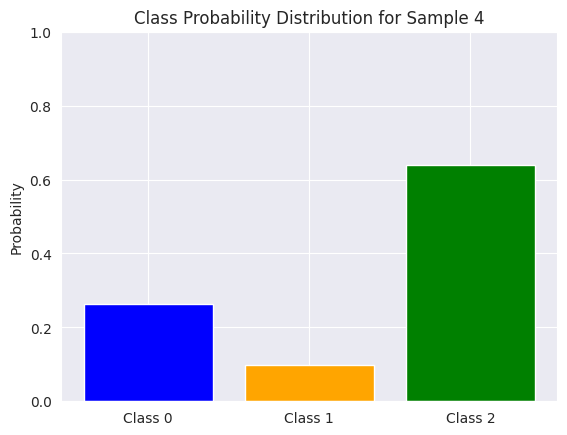

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1271708.csv


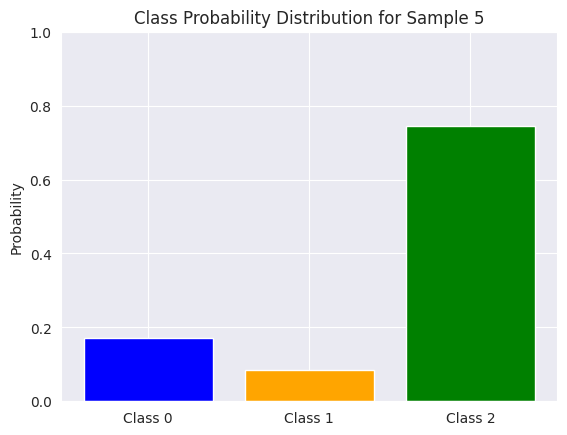

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1271708.csv


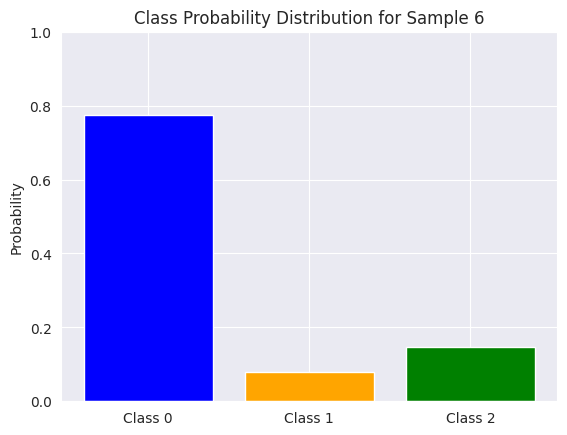

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1271708.csv


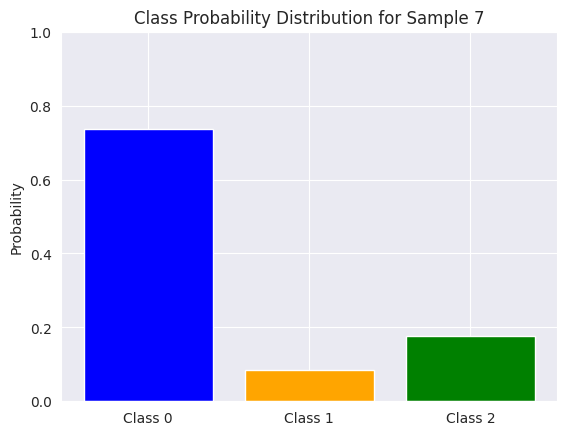

/content/drive/MyDrive/ftTrainDataTest/mw_1271077.csv
(500,)
num_batches:  1  data_main.shape[0]:  490
Number of training batches: 1
x_train.shape =  (490, 9, 1)
y_train.shape =  (490, 1)
x_test.shape =  (0, 9, 1)
y_test.shape =  (0, 1)
x_result.shape =  (490, 1)
0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1271077.csv


/tmp/ipykernel_3379/1856099931.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

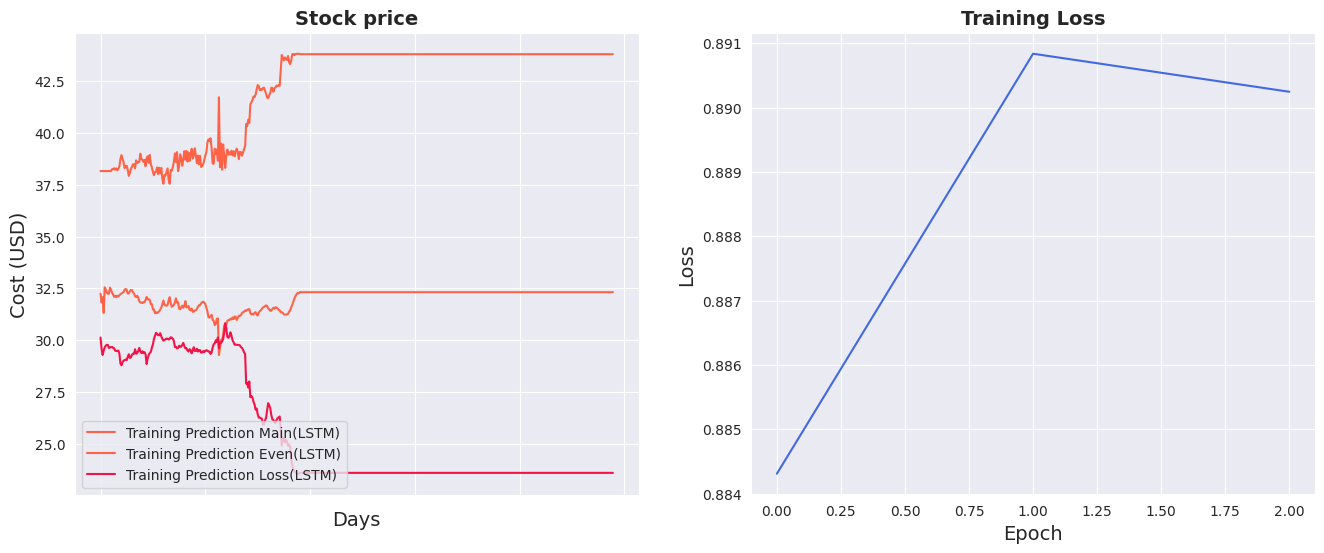

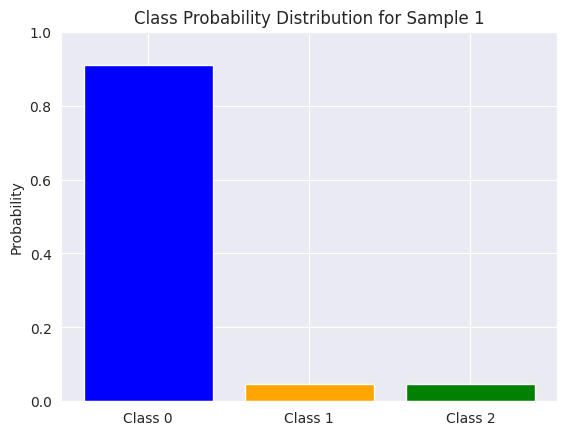

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1271077.csv


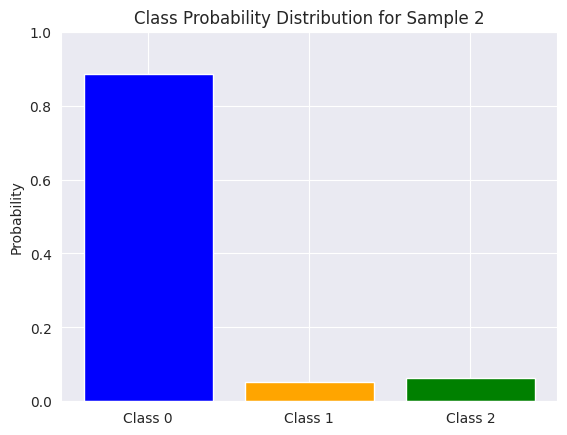

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1271077.csv


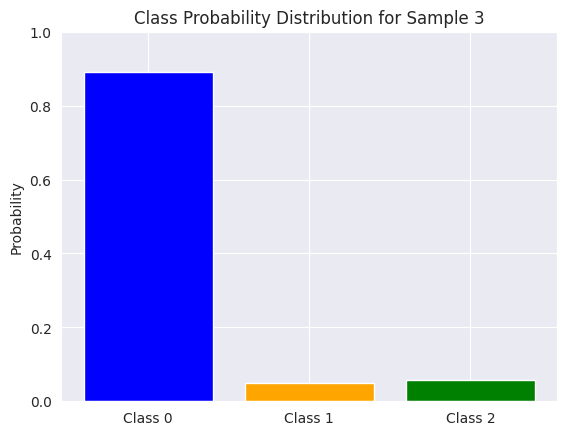

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1271077.csv


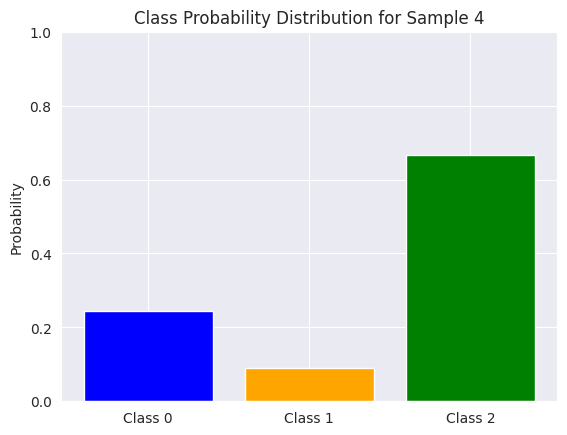

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1271077.csv


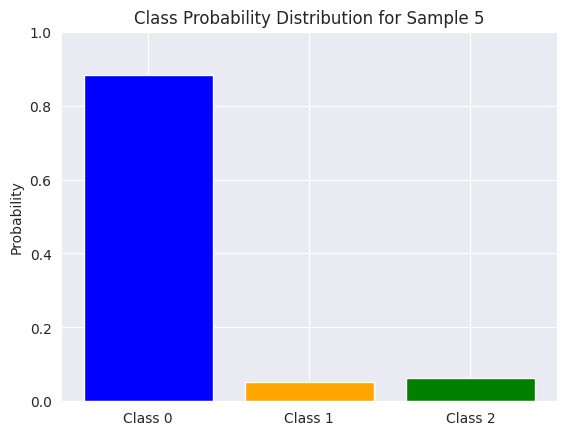

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1271077.csv


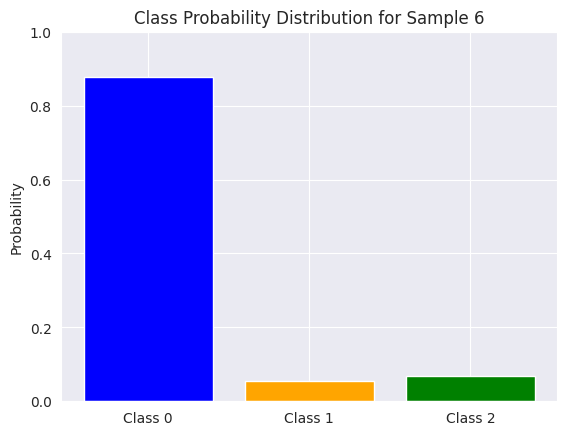

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1271077.csv


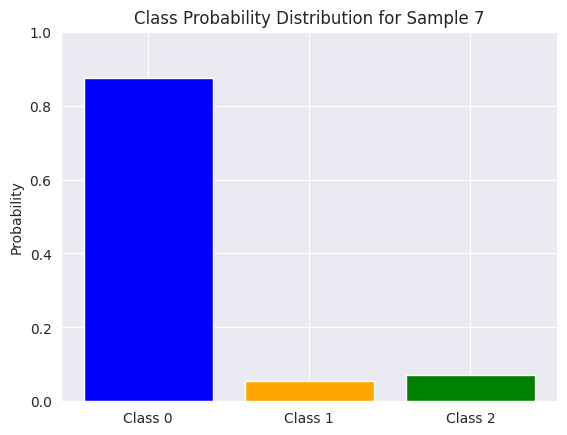

/content/drive/MyDrive/ftTrainDataTest/mw_1267753.csv
(500,)
num_batches:  1  data_main.shape[0]:  490
Number of training batches: 1
x_train.shape =  (490, 9, 1)
y_train.shape =  (490, 1)
x_test.shape =  (0, 9, 1)
y_test.shape =  (0, 1)
x_result.shape =  (490, 1)
0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267753.csv


/tmp/ipykernel_3379/1856099931.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

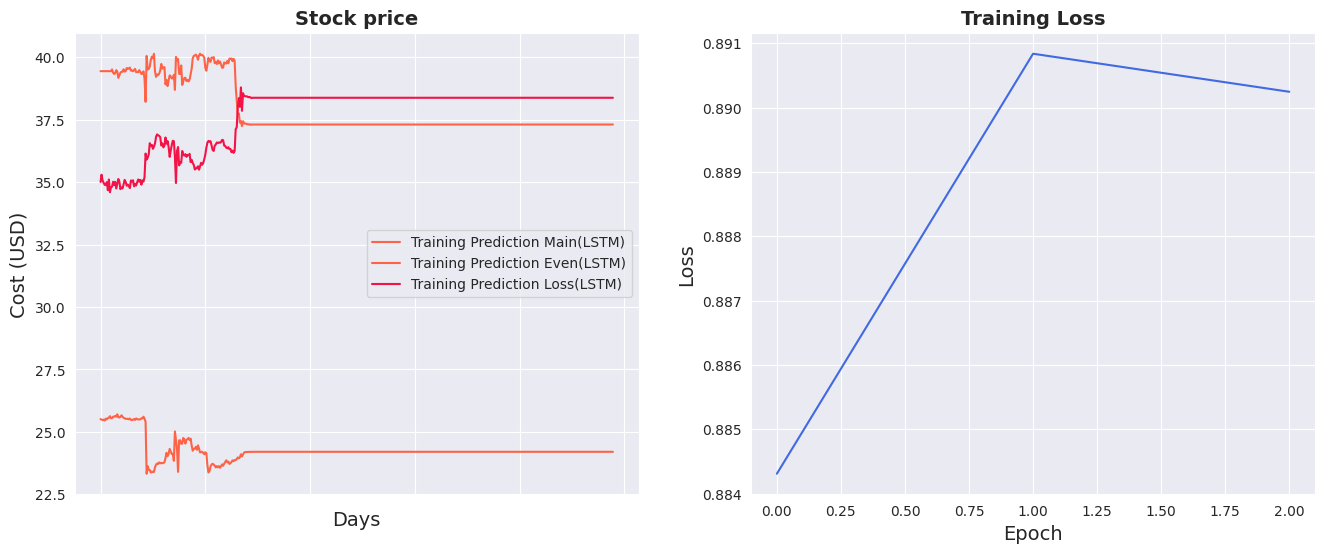

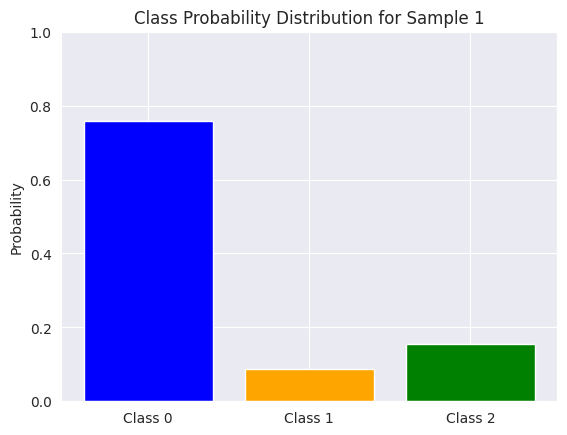

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267753.csv


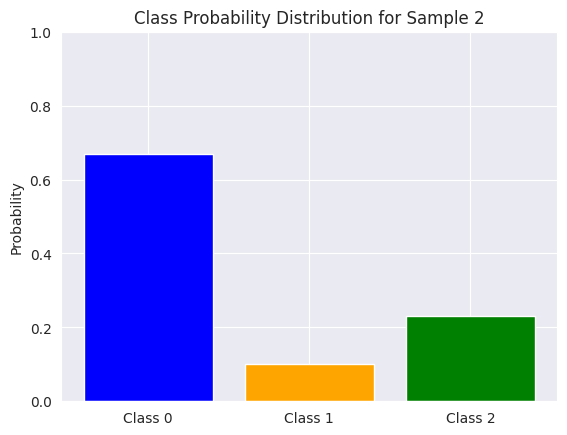

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267753.csv


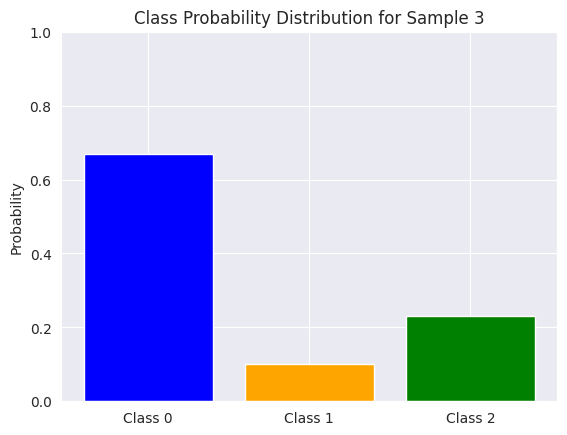

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267753.csv


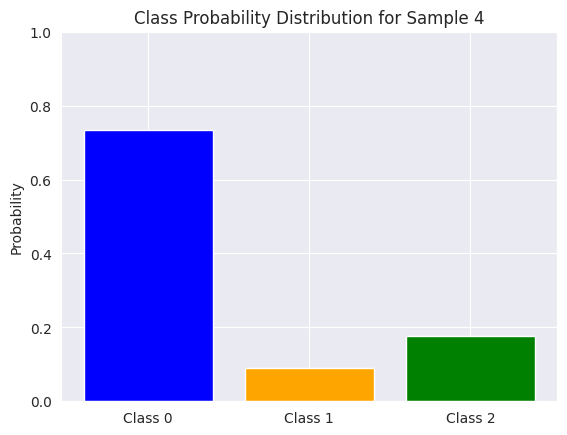

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267753.csv


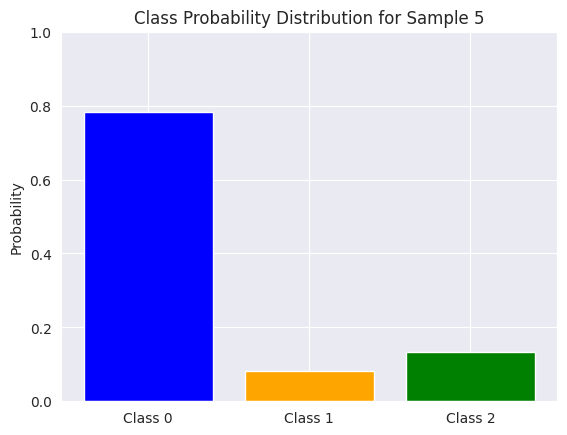

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267753.csv


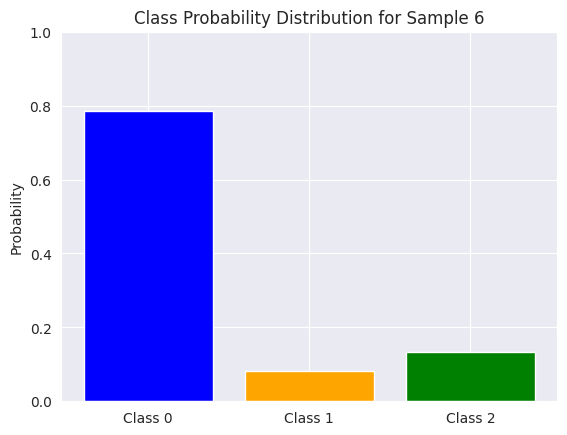

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267753.csv


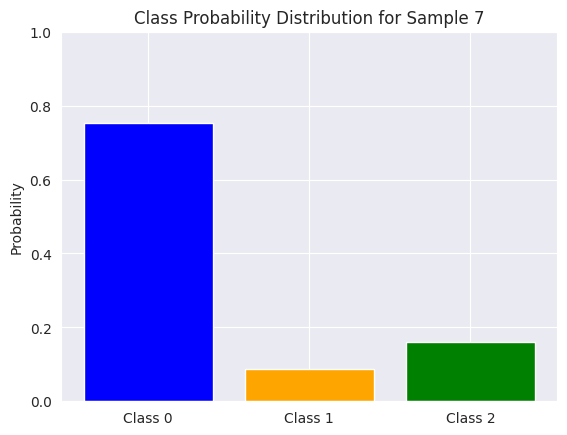

/content/drive/MyDrive/ftTrainDataTest/mw_1263333.csv
(500,)
num_batches:  1  data_main.shape[0]:  490
Number of training batches: 1
x_train.shape =  (490, 9, 1)
y_train.shape =  (490, 1)
x_test.shape =  (0, 9, 1)
y_test.shape =  (0, 1)
x_result.shape =  (490, 1)
0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263333.csv


/tmp/ipykernel_3379/1856099931.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

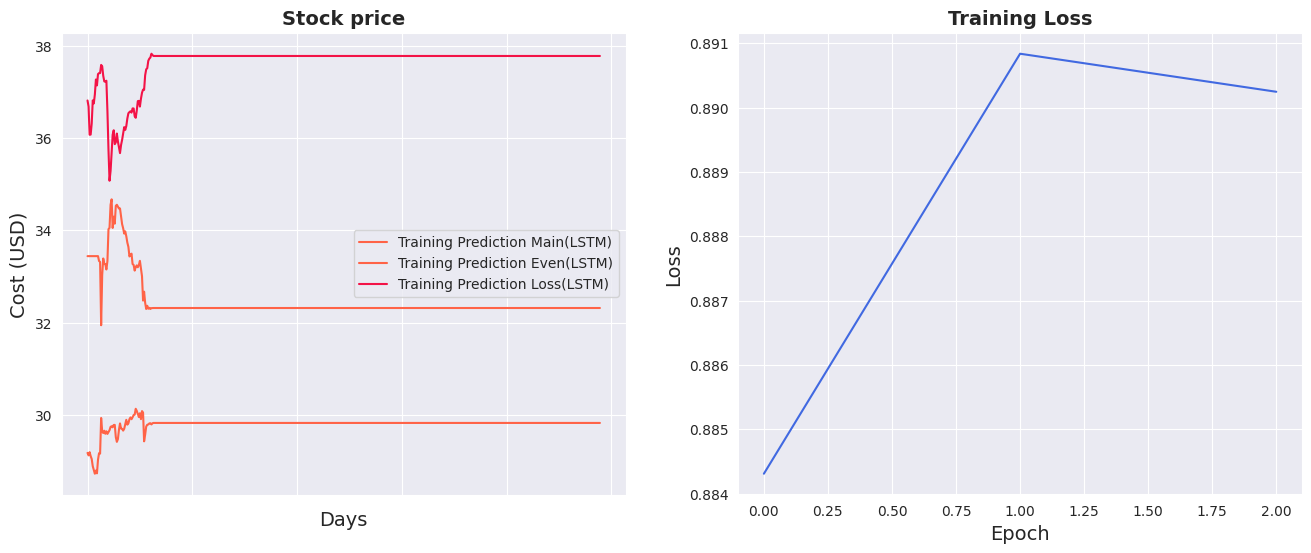

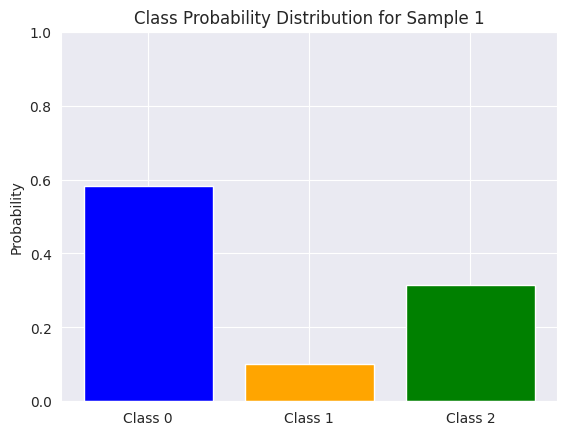

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263333.csv


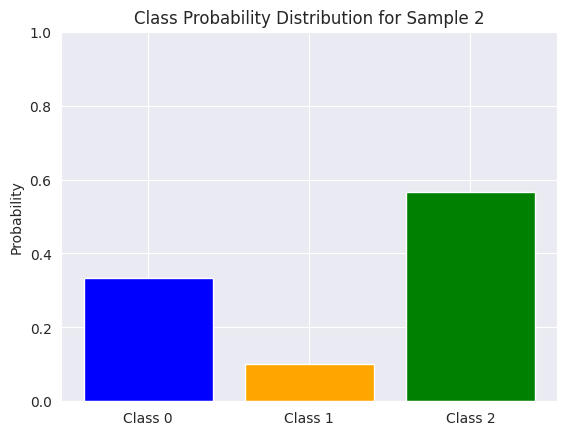

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263333.csv


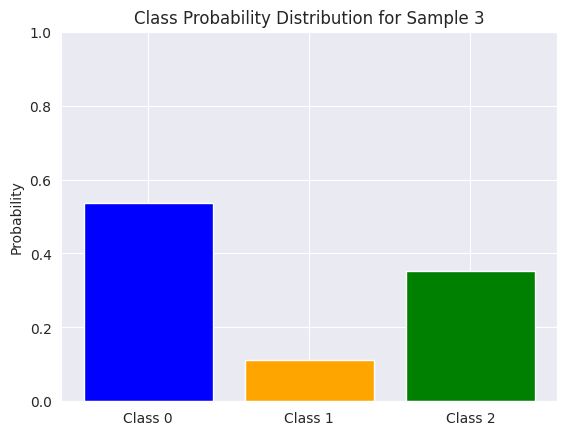

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263333.csv


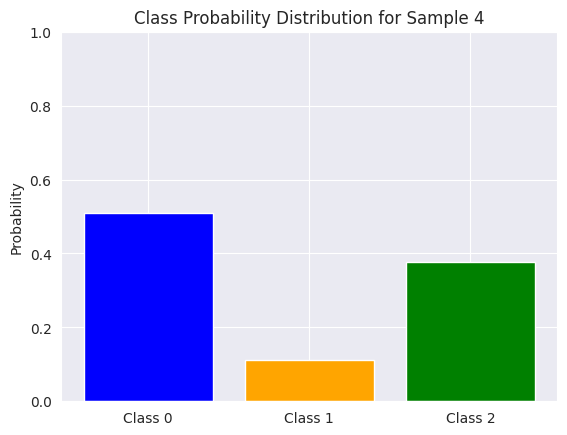

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263333.csv


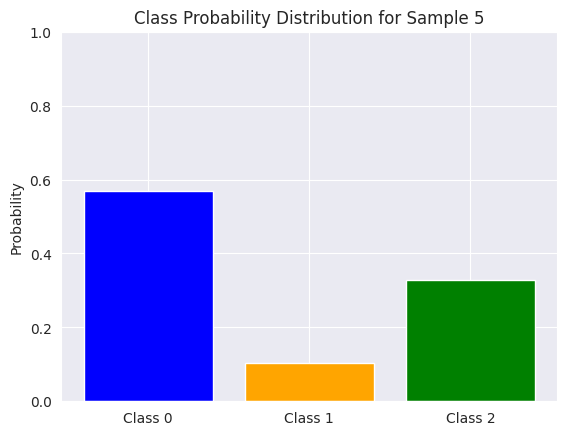

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263333.csv


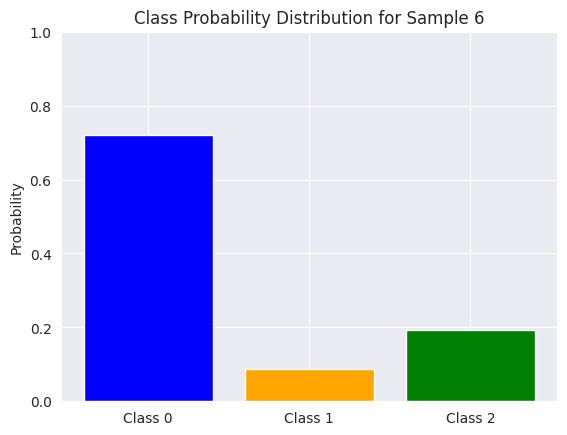

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263333.csv


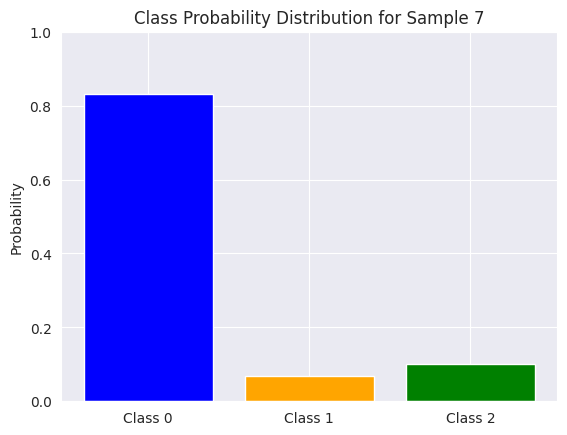

/content/drive/MyDrive/ftTrainDataTest/mw_1263336.csv
(500,)
num_batches:  1  data_main.shape[0]:  490
Number of training batches: 1
x_train.shape =  (490, 9, 1)
y_train.shape =  (490, 1)
x_test.shape =  (0, 9, 1)
y_test.shape =  (0, 1)
x_result.shape =  (490, 1)
0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263336.csv


/tmp/ipykernel_3379/1856099931.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

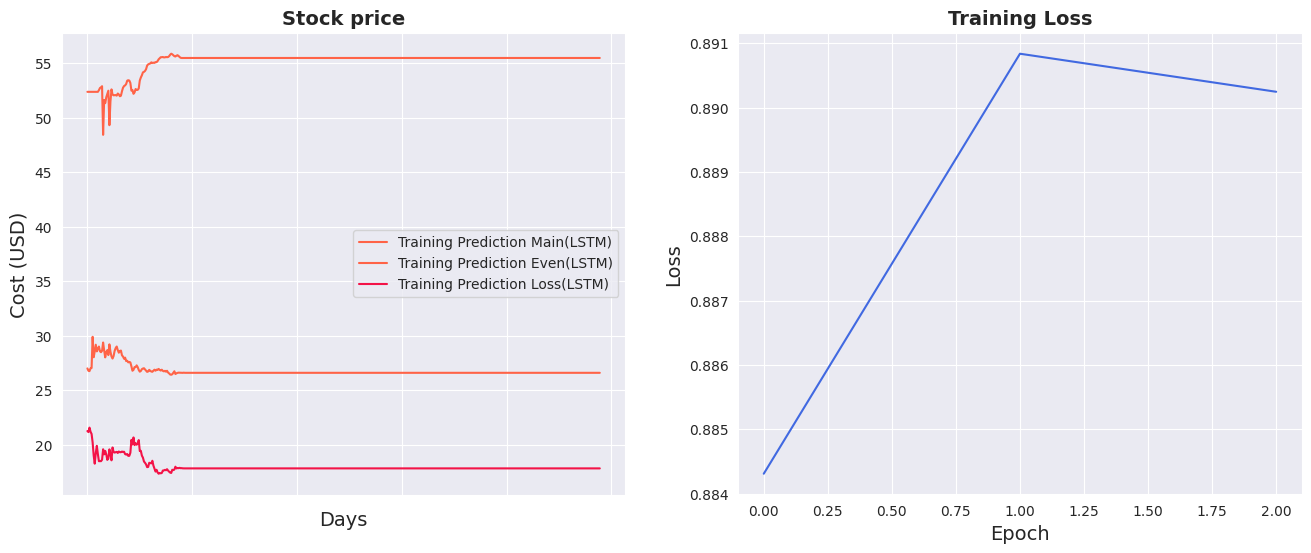

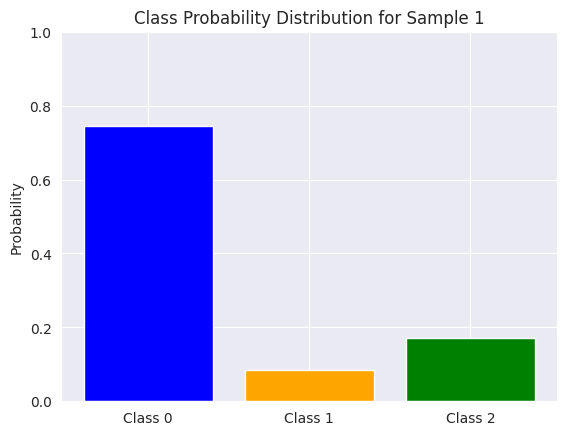

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263336.csv


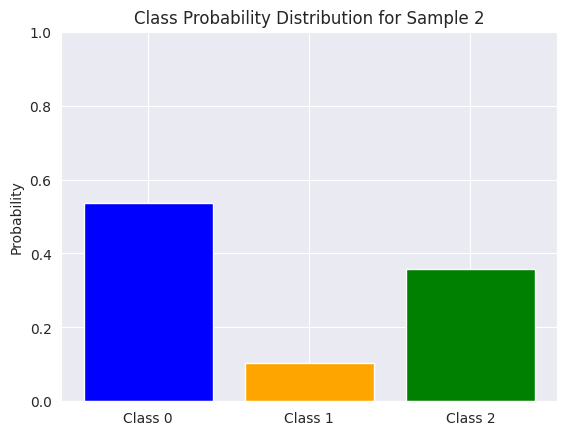

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263336.csv


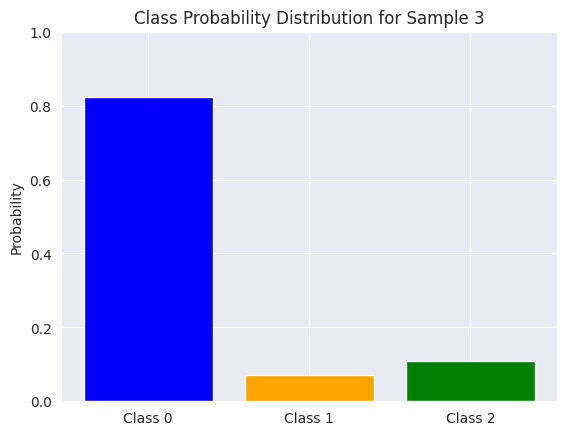

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263336.csv


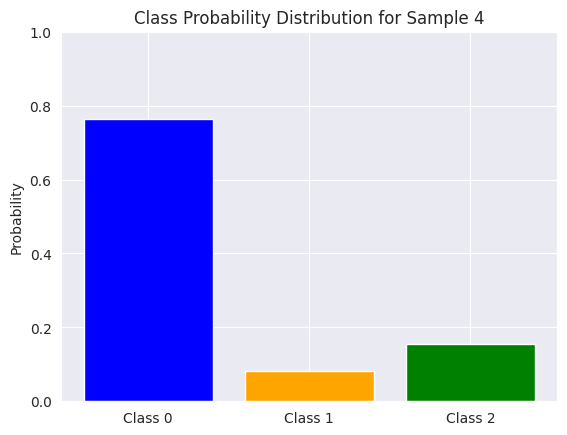

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263336.csv


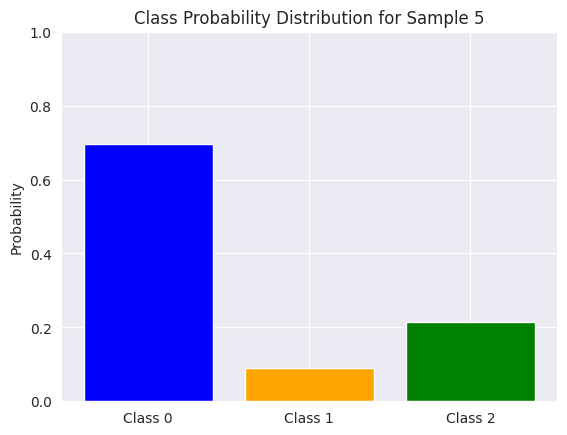

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263336.csv


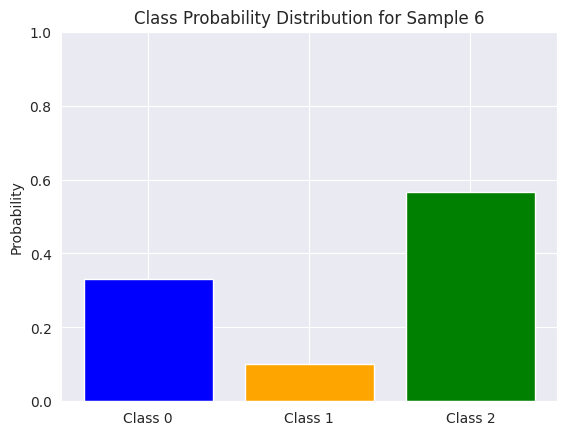

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263336.csv


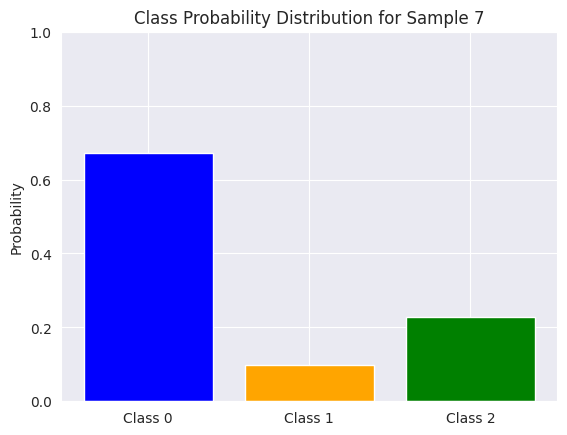

/content/drive/MyDrive/ftTrainDataTest/mw_1263335.csv
(500,)
num_batches:  1  data_main.shape[0]:  490
Number of training batches: 1
x_train.shape =  (490, 9, 1)
y_train.shape =  (490, 1)
x_test.shape =  (0, 9, 1)
y_test.shape =  (0, 1)
x_result.shape =  (490, 1)
0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263335.csv


/tmp/ipykernel_3379/1856099931.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

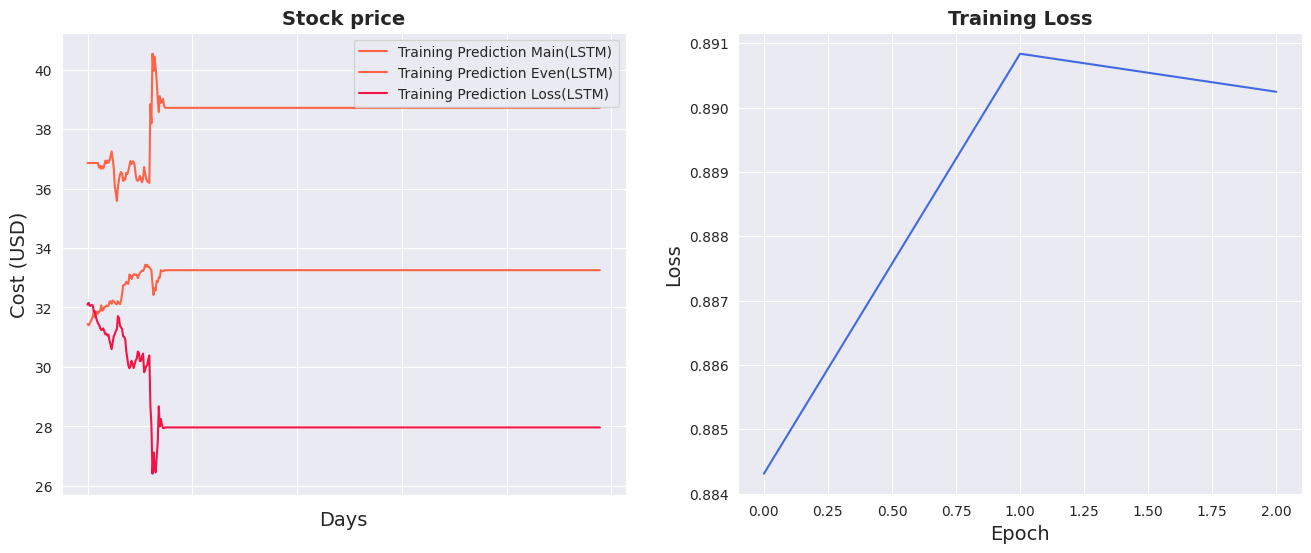

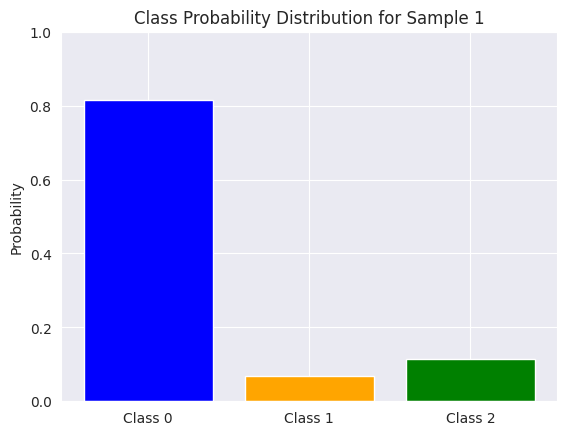

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263335.csv


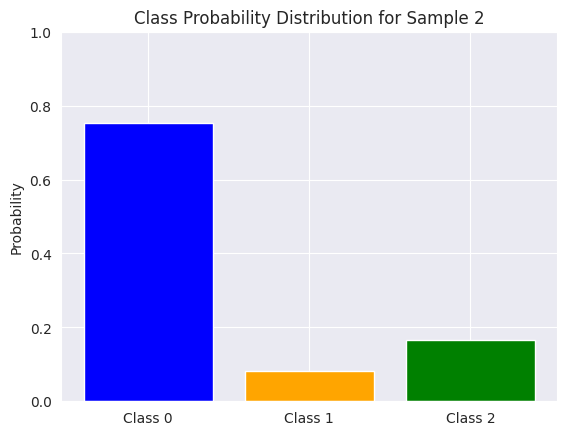

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263335.csv


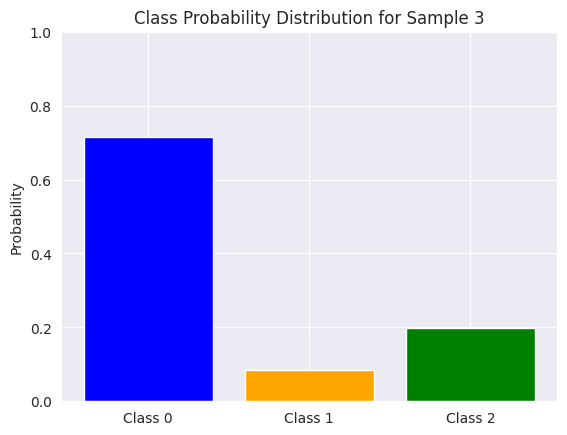

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263335.csv


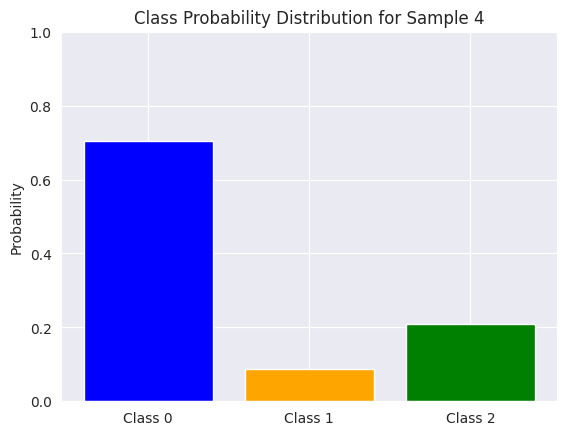

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263335.csv


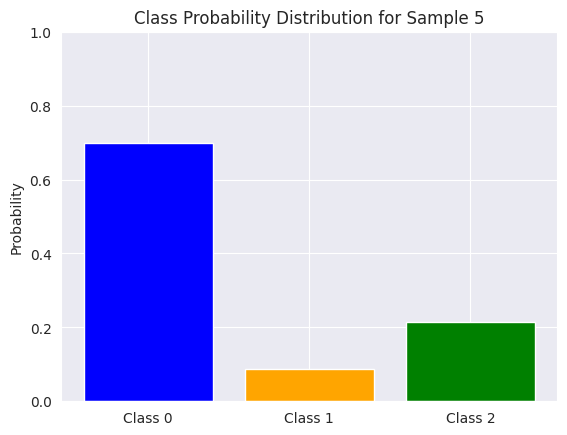

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263335.csv


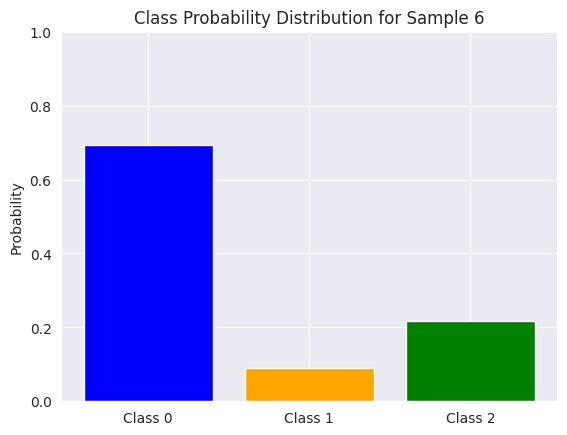

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263335.csv


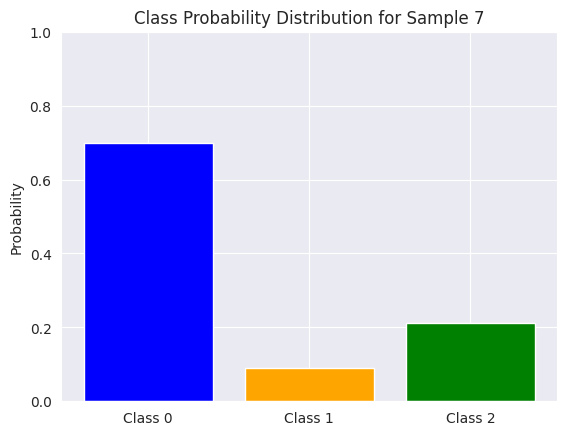

/content/drive/MyDrive/ftTrainDataTest/mw_1263337.csv
(500,)
num_batches:  1  data_main.shape[0]:  490
Number of training batches: 1
x_train.shape =  (490, 9, 1)
y_train.shape =  (490, 1)
x_test.shape =  (0, 9, 1)
y_test.shape =  (0, 1)
x_result.shape =  (490, 1)
0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263337.csv


/tmp/ipykernel_3379/1856099931.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

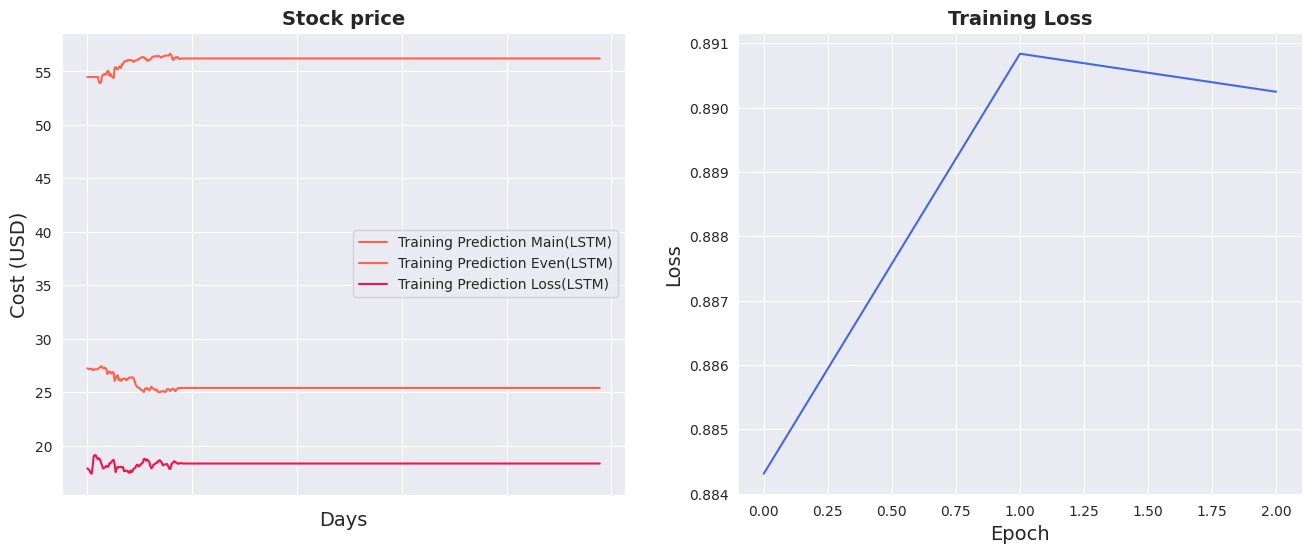

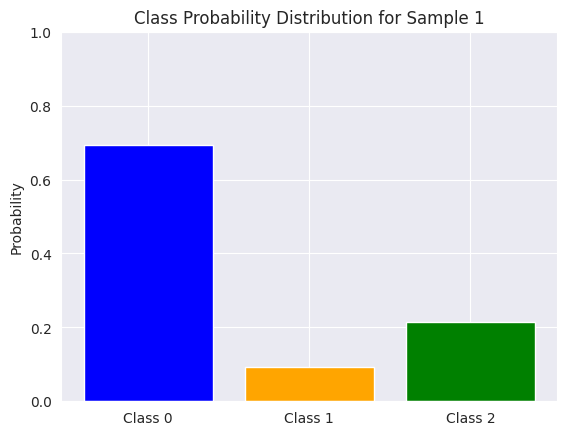

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263337.csv


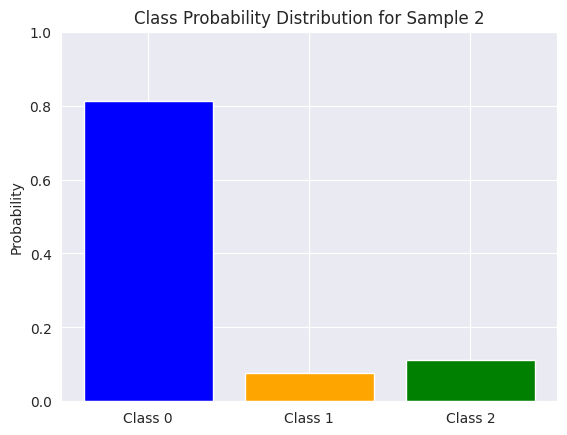

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263337.csv


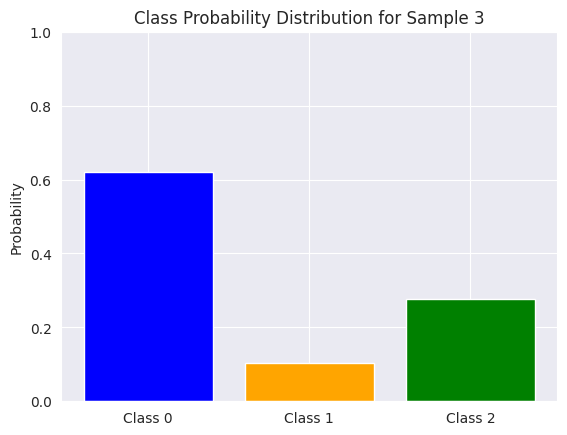

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263337.csv


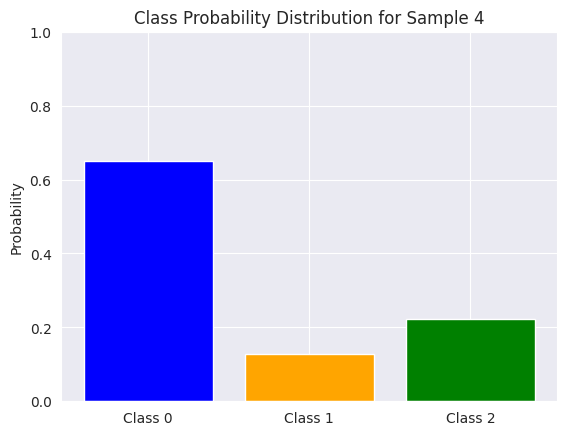

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263337.csv


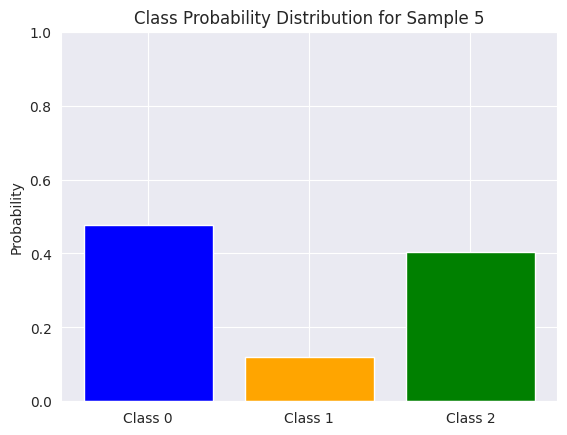

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263337.csv


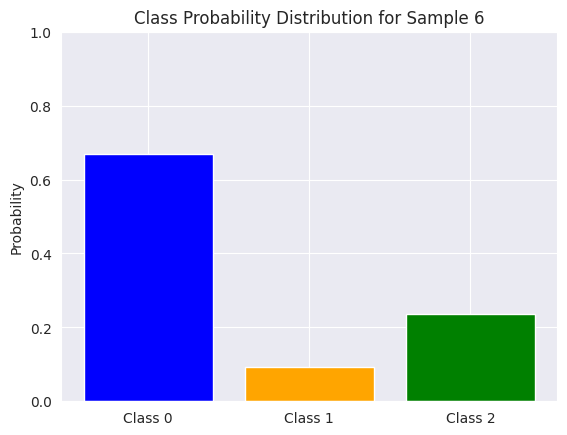

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263337.csv


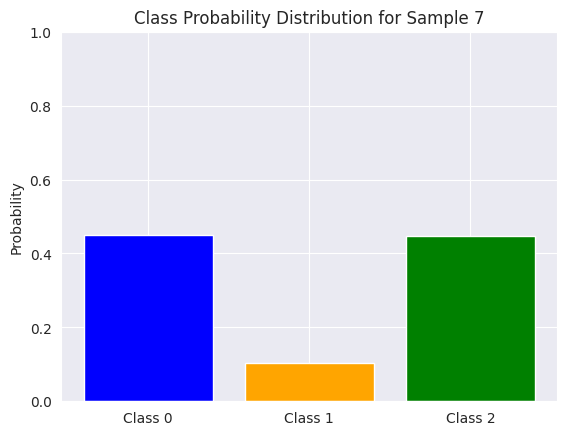

/content/drive/MyDrive/ftTrainDataTest/mw_1261289.csv
(500,)
num_batches:  1  data_main.shape[0]:  490
Number of training batches: 1
x_train.shape =  (490, 9, 1)
y_train.shape =  (490, 1)
x_test.shape =  (0, 9, 1)
y_test.shape =  (0, 1)
x_result.shape =  (490, 1)
0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261289.csv


/tmp/ipykernel_3379/1856099931.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

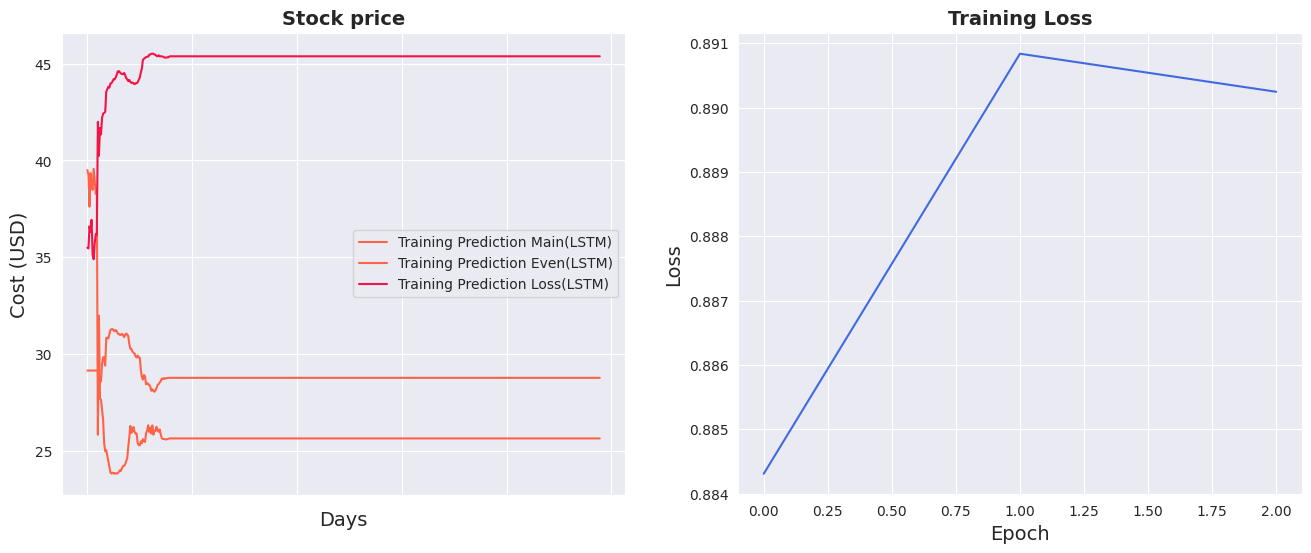

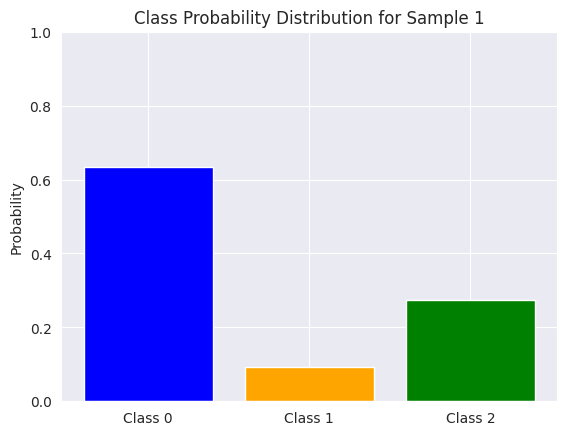

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261289.csv


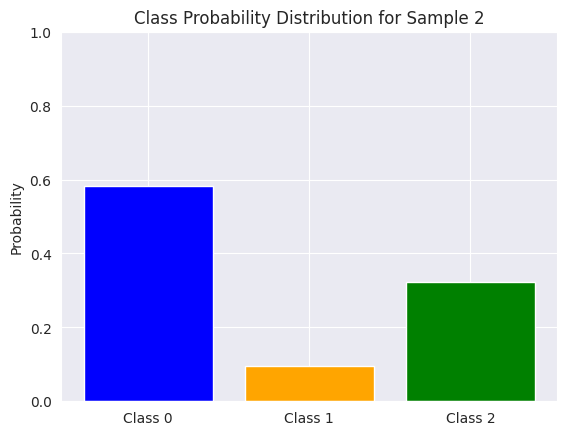

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261289.csv


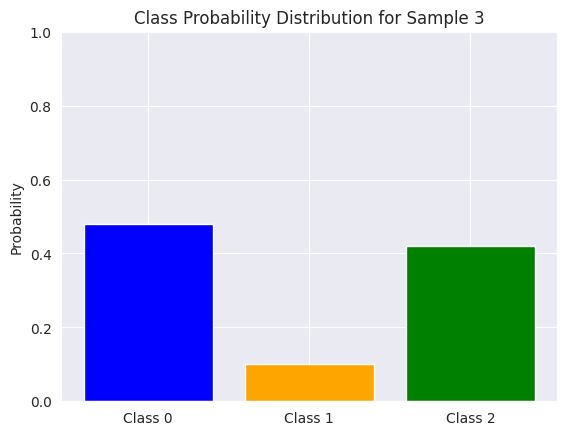

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261289.csv


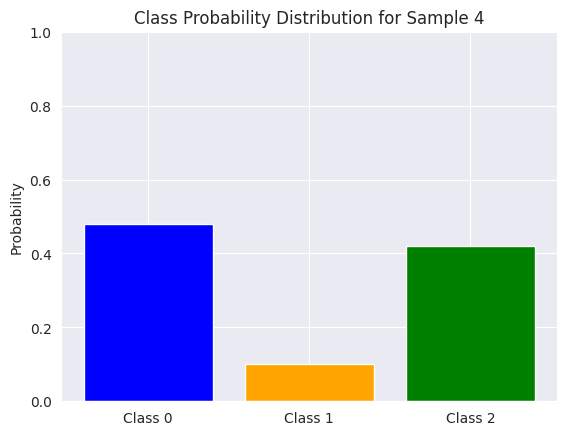

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261289.csv


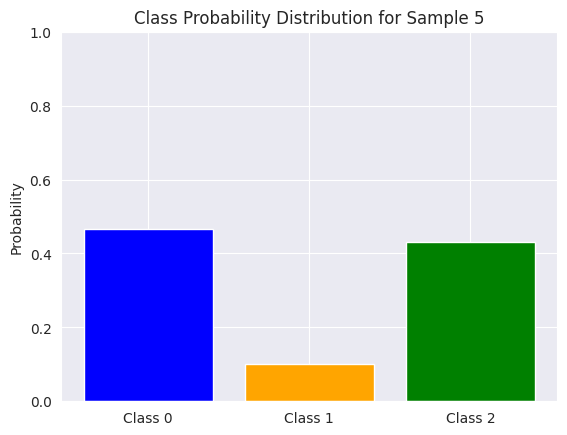

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261289.csv


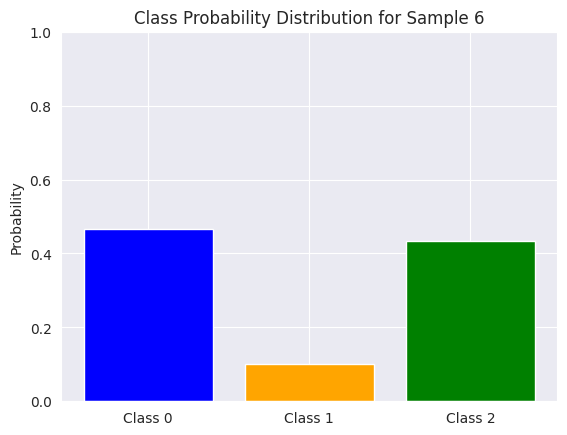

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261289.csv


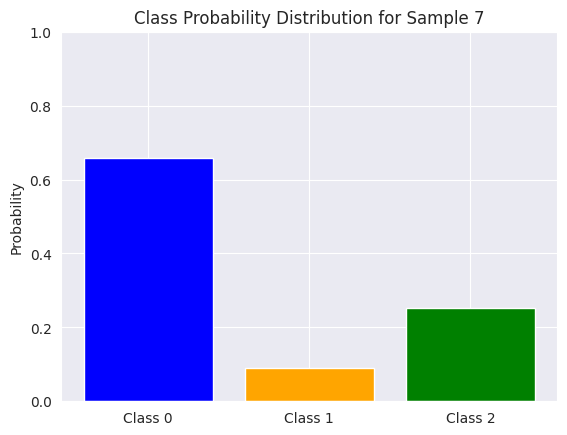

/content/drive/MyDrive/ftTrainDataTest/mw_1261286.csv
(500,)
num_batches:  1  data_main.shape[0]:  490
Number of training batches: 1
x_train.shape =  (490, 9, 1)
y_train.shape =  (490, 1)
x_test.shape =  (0, 9, 1)
y_test.shape =  (0, 1)
x_result.shape =  (490, 1)
0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261286.csv


/tmp/ipykernel_3379/1856099931.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

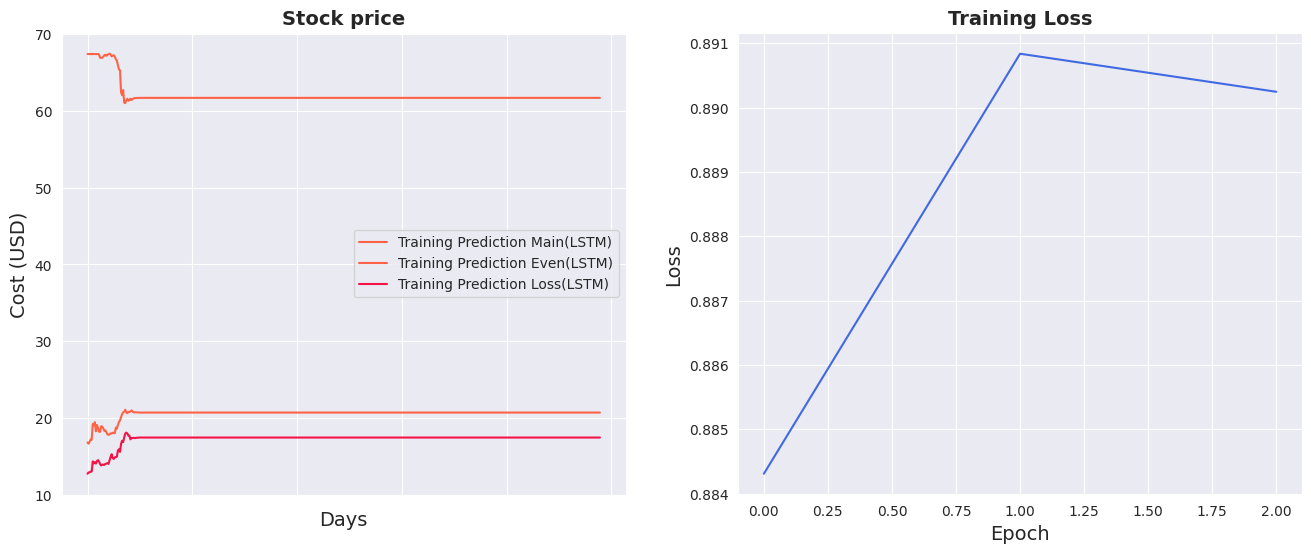

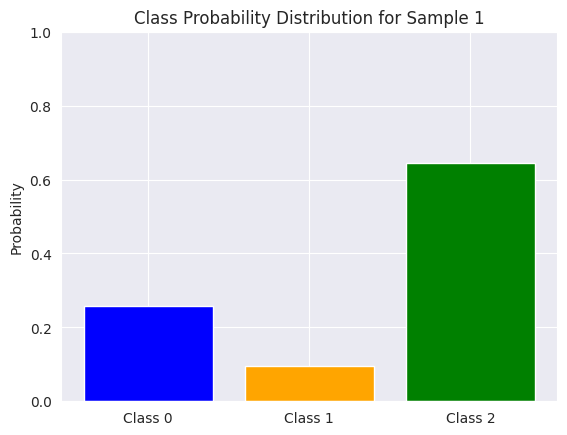

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261286.csv


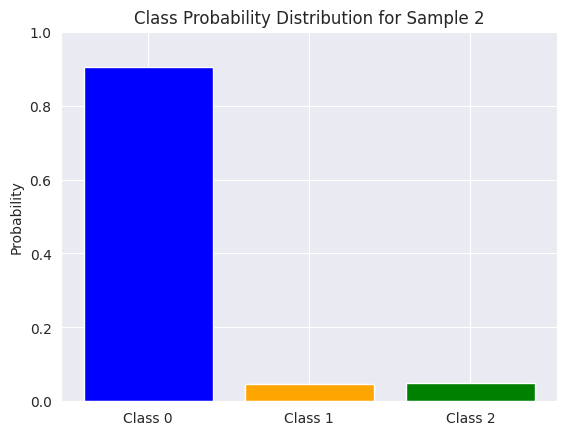

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261286.csv


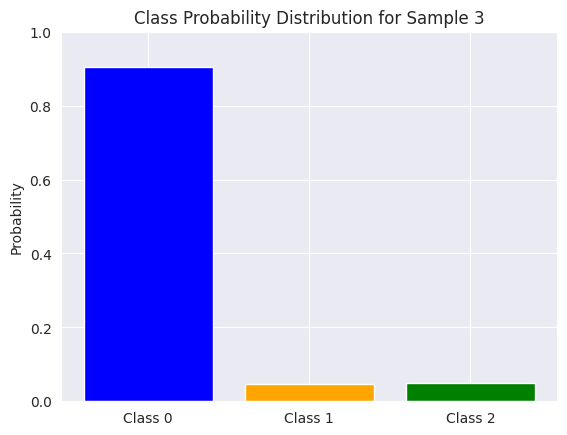

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261286.csv


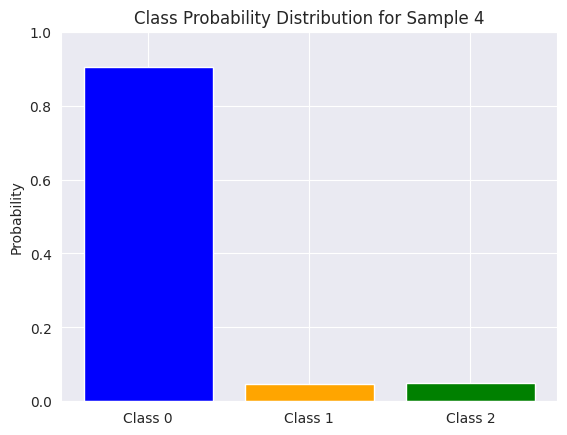

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261286.csv


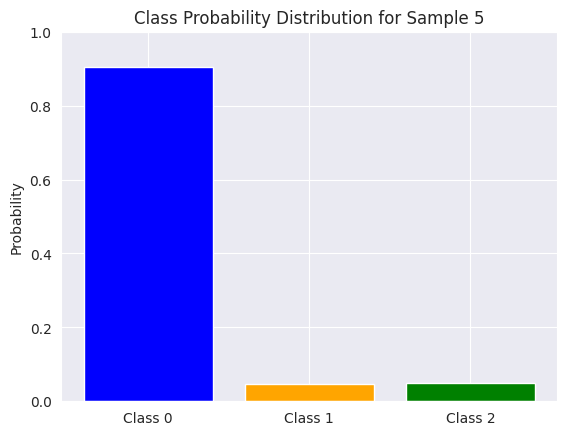

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261286.csv


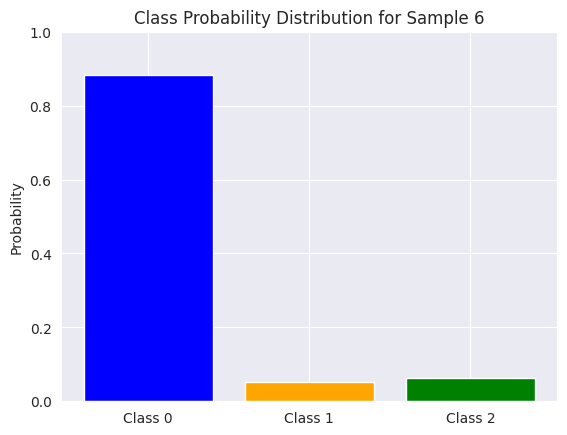

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1261286.csv


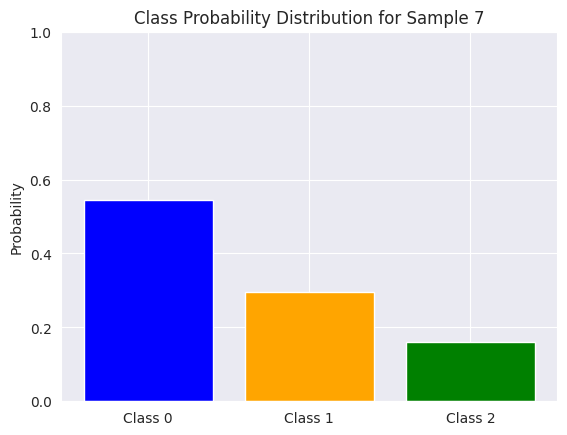

/content/drive/MyDrive/ftTrainDataTest/mw_1263025.csv
(500,)
num_batches:  1  data_main.shape[0]:  490
Number of training batches: 1
x_train.shape =  (490, 9, 1)
y_train.shape =  (490, 1)
x_test.shape =  (0, 9, 1)
y_test.shape =  (0, 1)
x_result.shape =  (490, 1)
0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263025.csv


/tmp/ipykernel_3379/1856099931.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

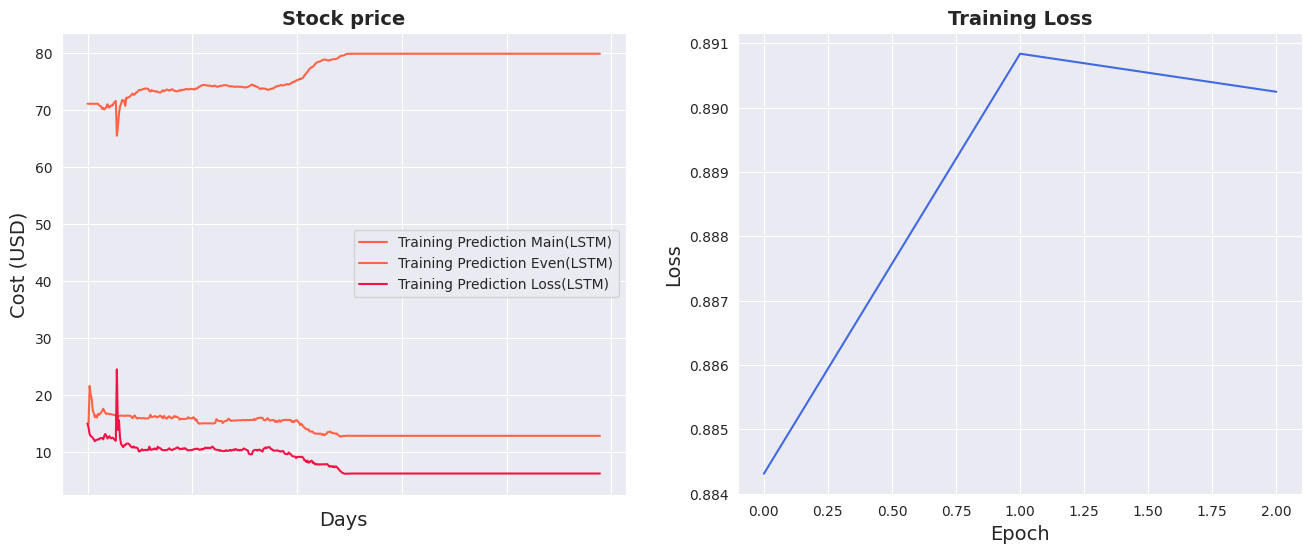

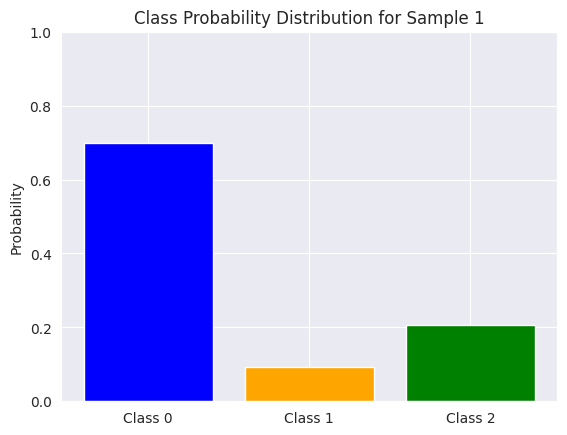

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263025.csv


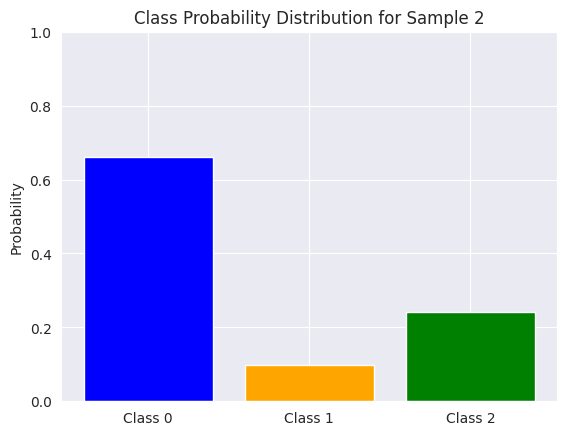

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263025.csv


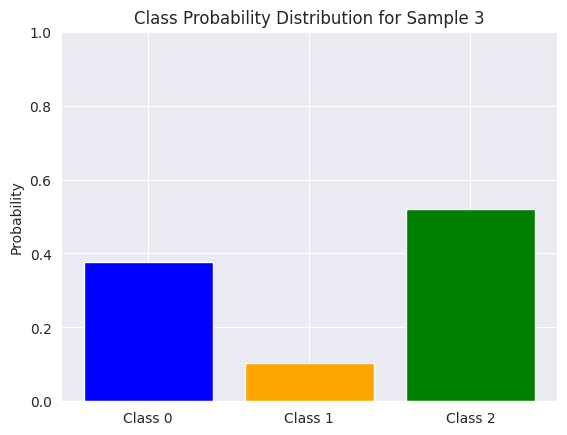

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263025.csv


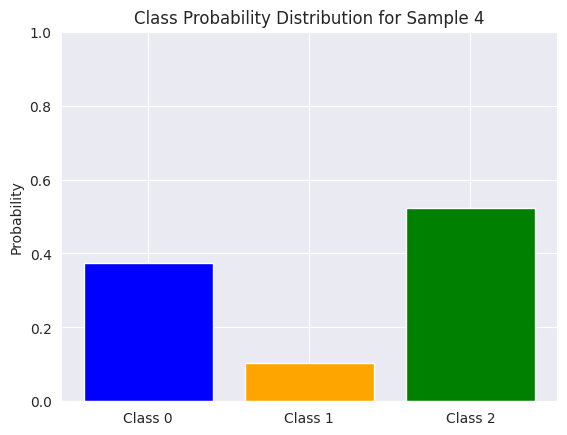

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263025.csv


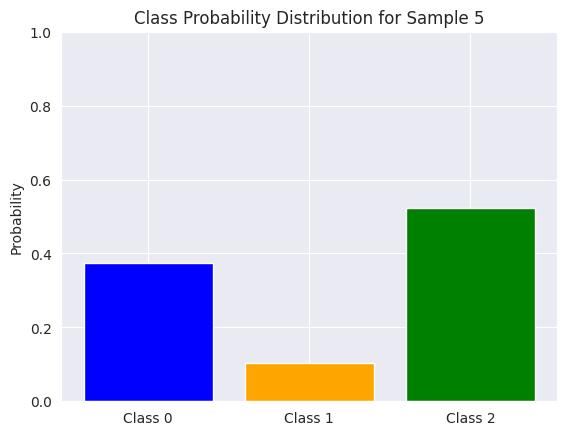

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263025.csv


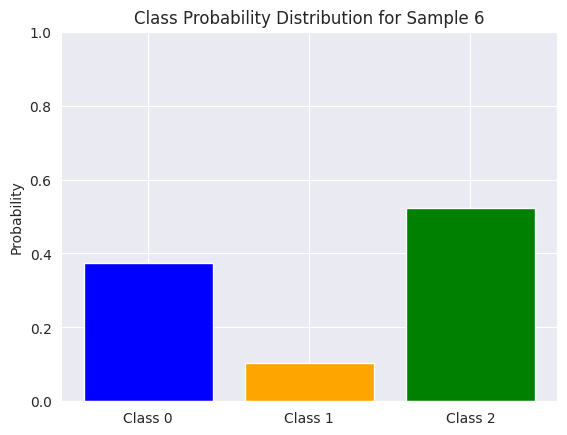

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1263025.csv


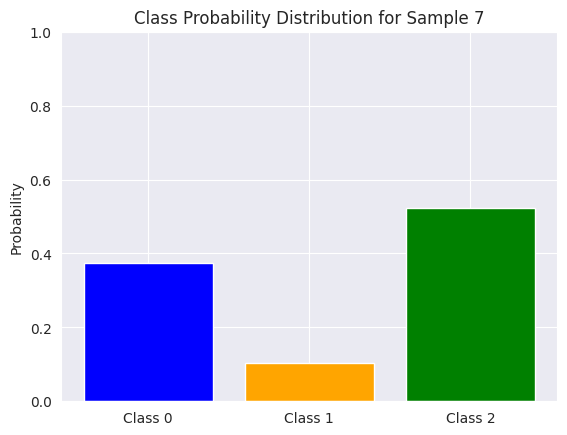

/content/drive/MyDrive/ftTrainDataTest/mw_1267759.csv
(500,)
num_batches:  1  data_main.shape[0]:  490
Number of training batches: 1
x_train.shape =  (490, 9, 1)
y_train.shape =  (490, 1)
x_test.shape =  (0, 9, 1)
y_test.shape =  (0, 1)
x_result.shape =  (490, 1)
0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267759.csv


/tmp/ipykernel_3379/1856099931.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

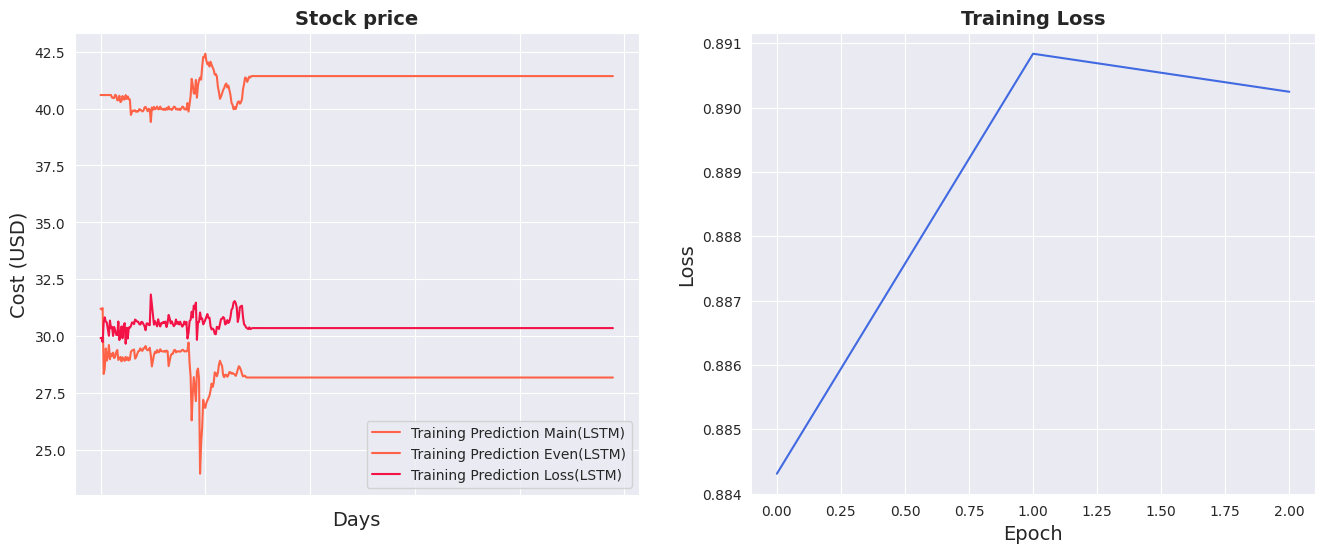

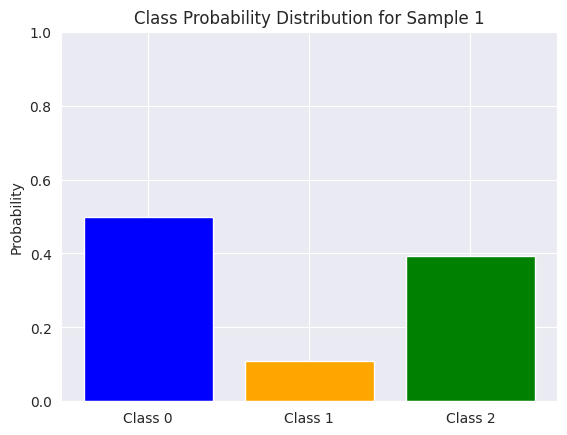

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267759.csv


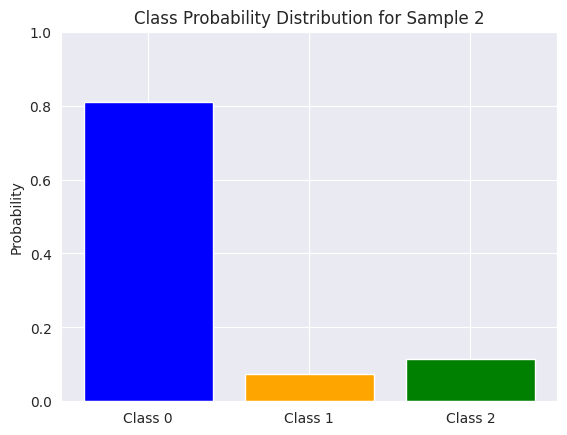

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267759.csv


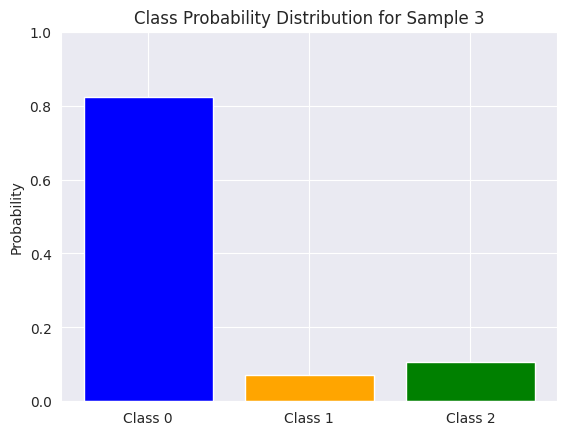

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267759.csv


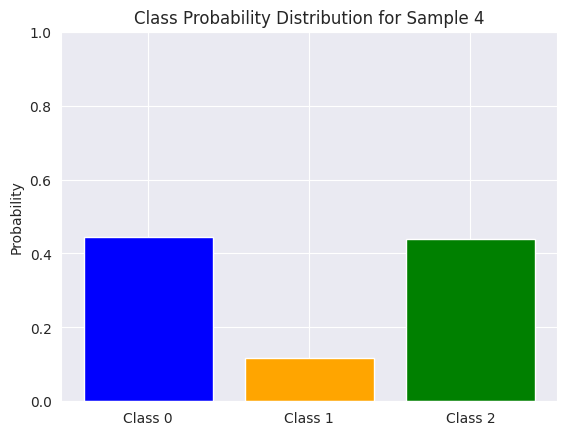

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267759.csv


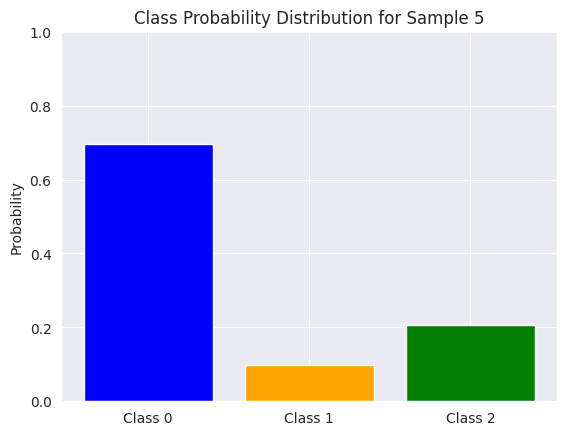

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267759.csv


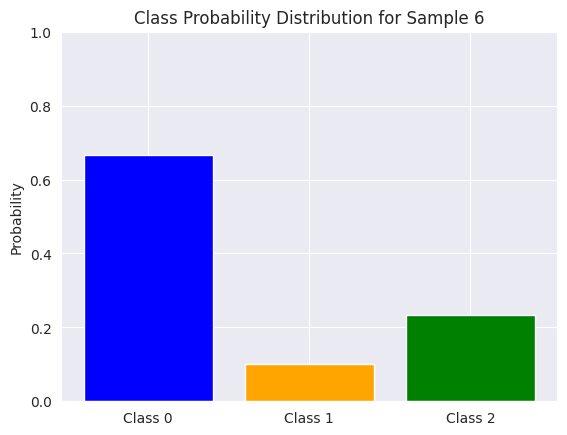

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267759.csv


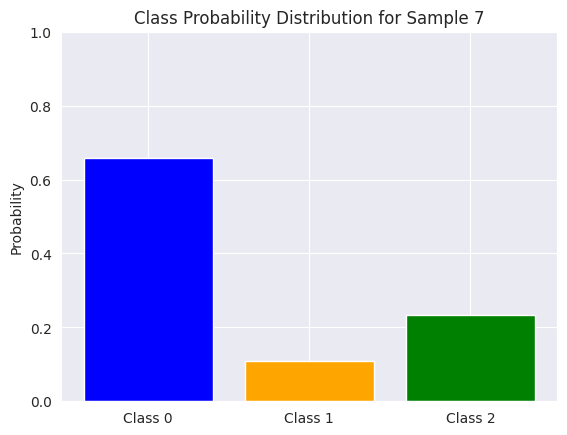

/content/drive/MyDrive/ftTrainDataTest/mw_1257717.csv
(500,)
num_batches:  1  data_main.shape[0]:  490
Number of training batches: 1
x_train.shape =  (490, 9, 1)
y_train.shape =  (490, 1)
x_test.shape =  (0, 9, 1)
y_test.shape =  (0, 1)
x_result.shape =  (490, 1)
0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1257717.csv


/tmp/ipykernel_3379/1856099931.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

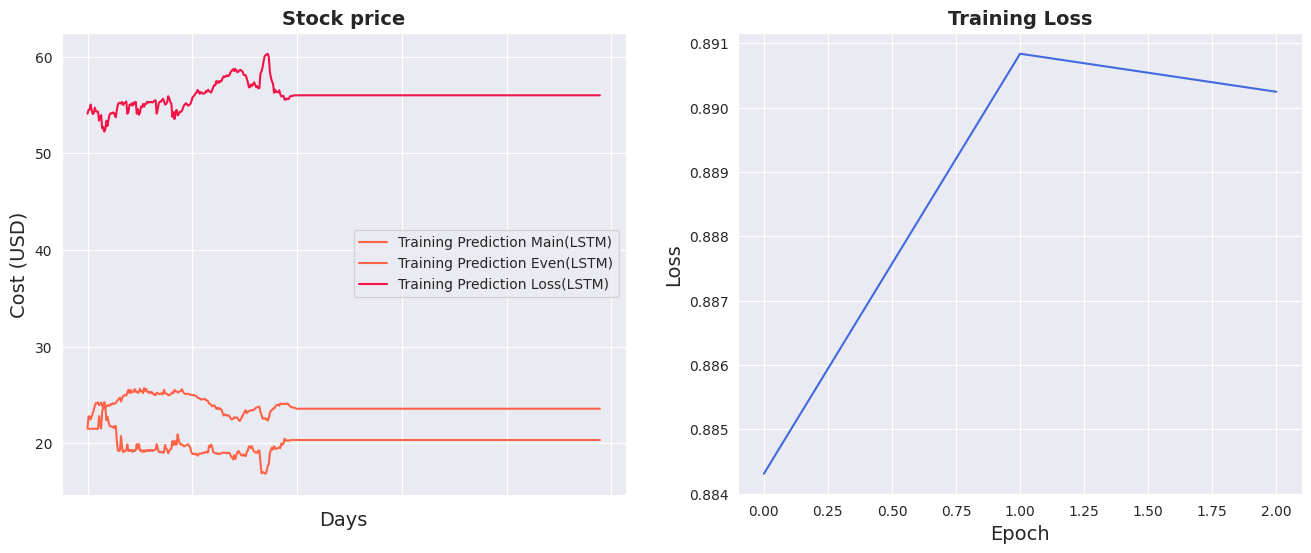

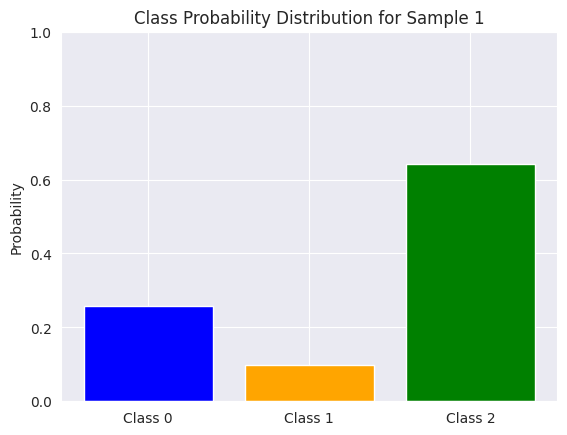

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1257717.csv


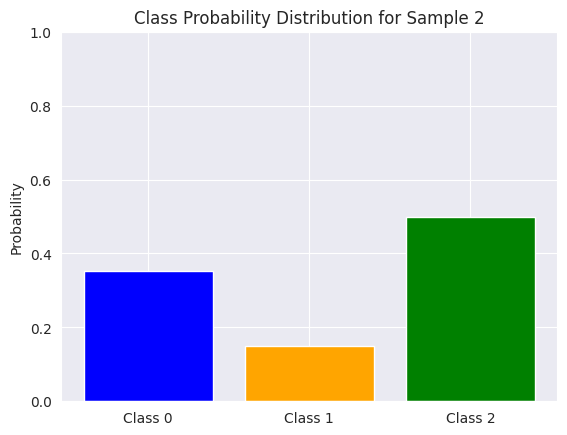

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1257717.csv


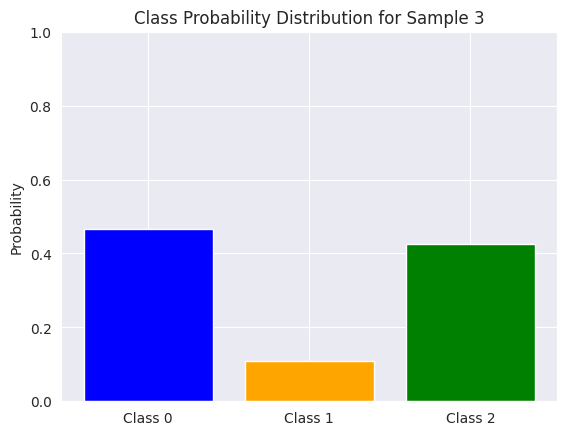

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1257717.csv


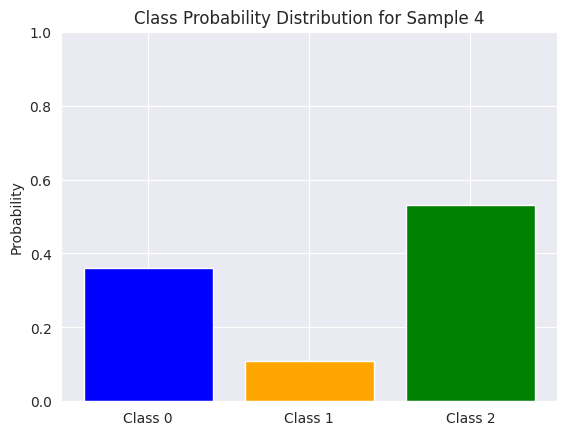

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1257717.csv


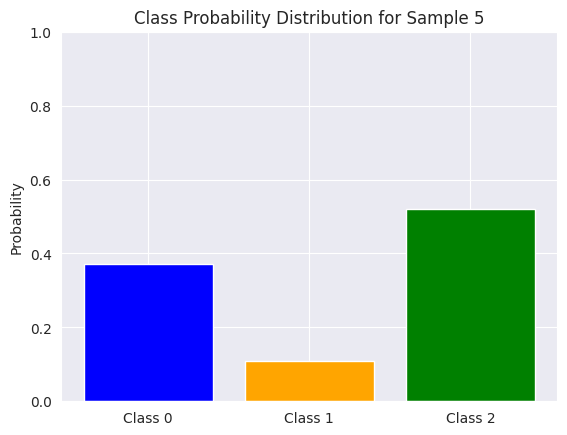

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1257717.csv


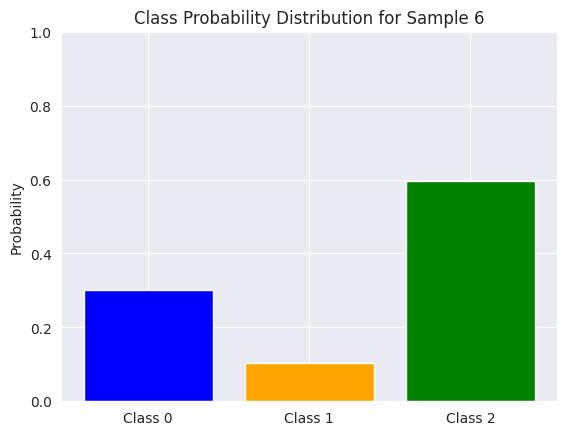

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1257717.csv


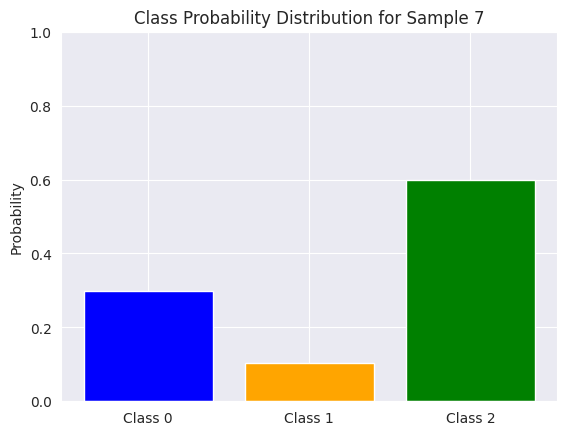

/content/drive/MyDrive/ftTrainDataTest/mw_1267756.csv
(500,)
num_batches:  1  data_main.shape[0]:  490
Number of training batches: 1
x_train.shape =  (490, 9, 1)
y_train.shape =  (490, 1)
x_test.shape =  (0, 9, 1)
y_test.shape =  (0, 1)
x_result.shape =  (490, 1)
0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267756.csv


/tmp/ipykernel_3379/1856099931.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

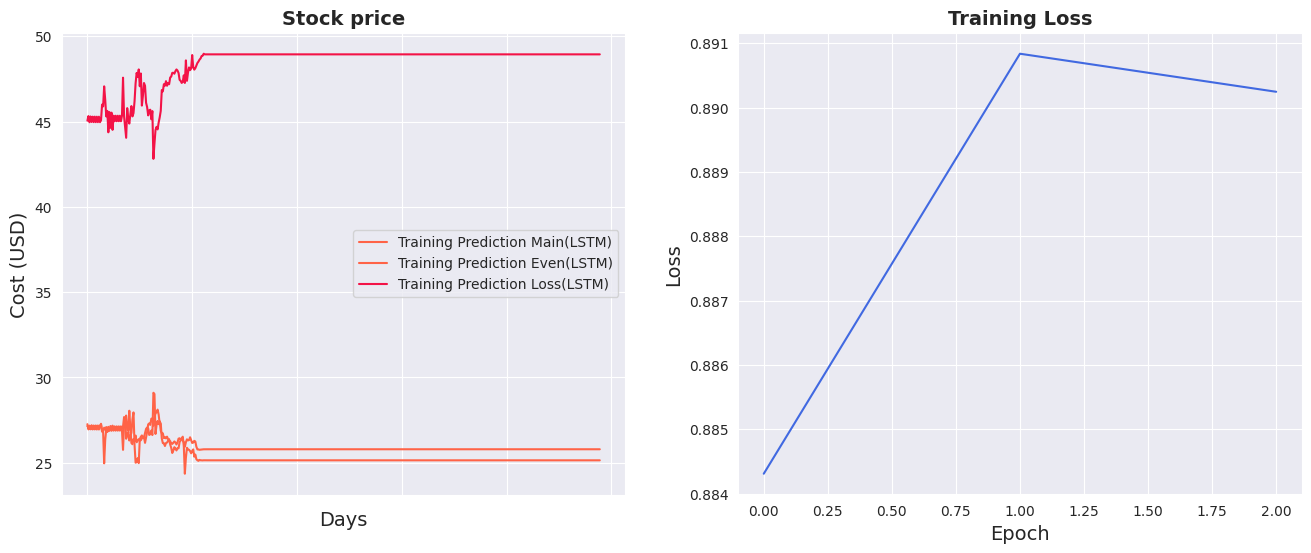

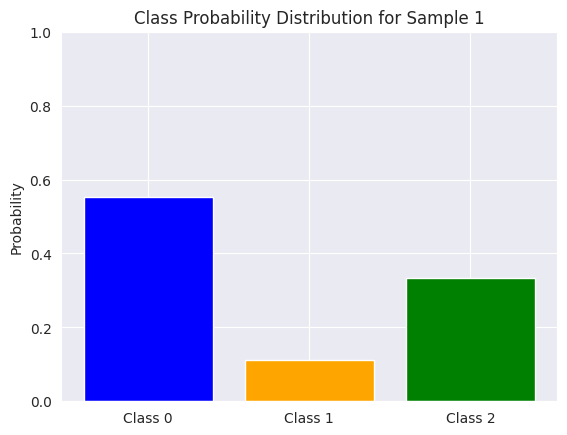

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267756.csv


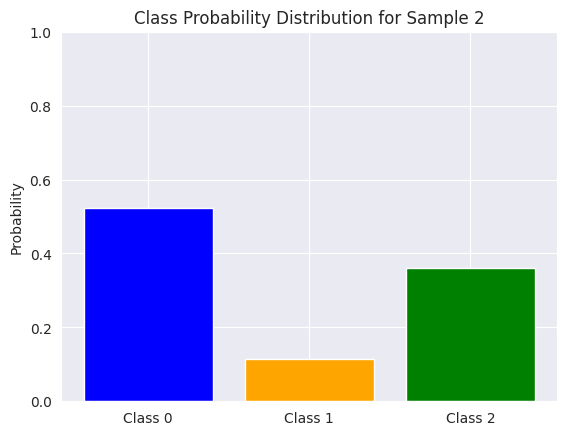

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267756.csv


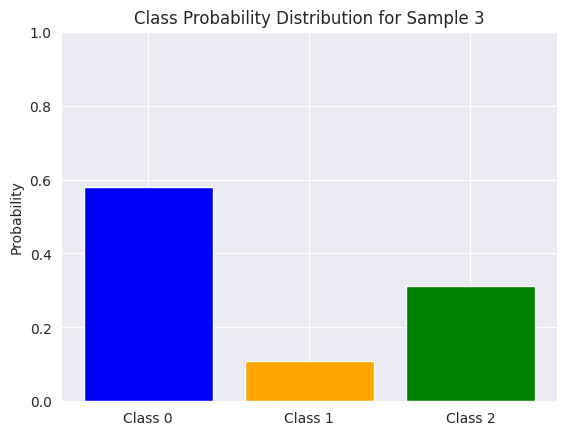

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267756.csv


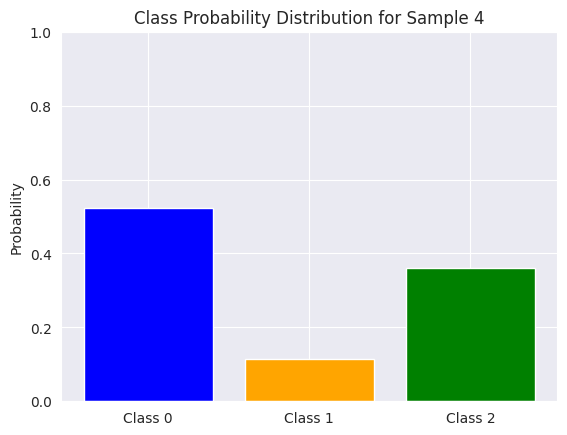

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267756.csv


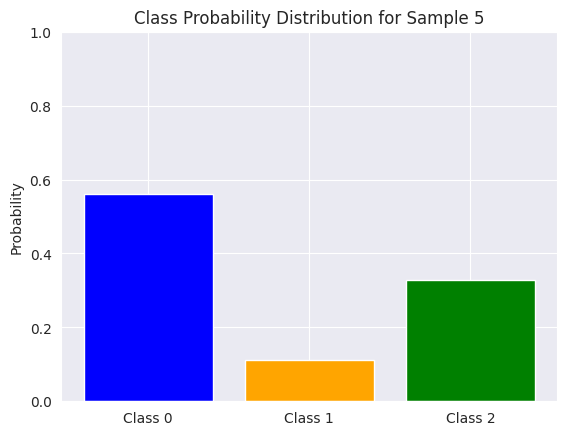

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267756.csv


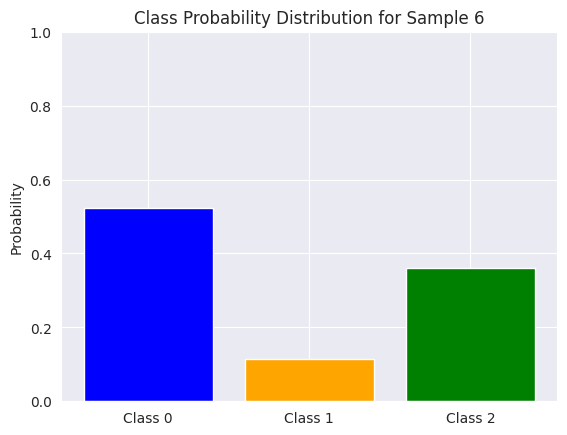

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267756.csv


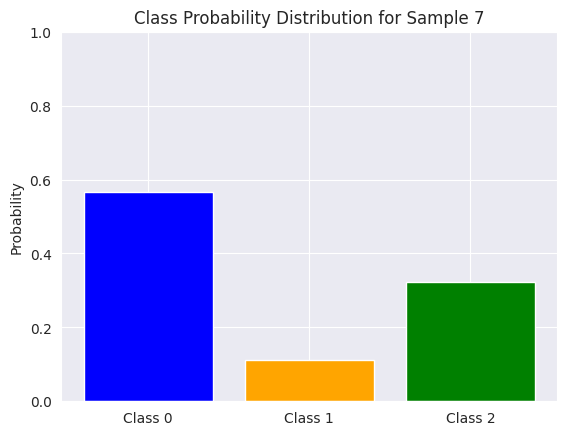

/content/drive/MyDrive/ftTrainDataTest/mw_1267752.csv
(500,)
num_batches:  1  data_main.shape[0]:  490
Number of training batches: 1
x_train.shape =  (490, 9, 1)
y_train.shape =  (490, 1)
x_test.shape =  (0, 9, 1)
y_test.shape =  (0, 1)
x_result.shape =  (490, 1)
0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267752.csv


/tmp/ipykernel_3379/1856099931.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

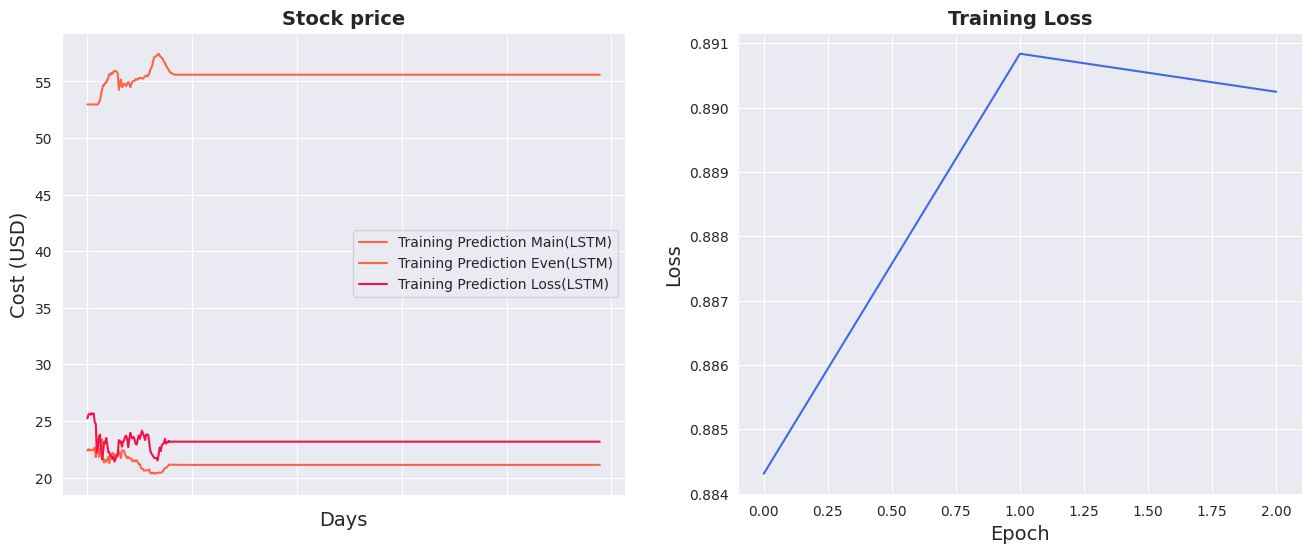

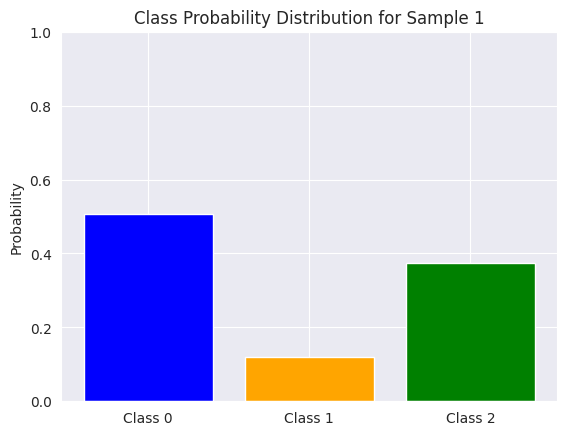

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267752.csv


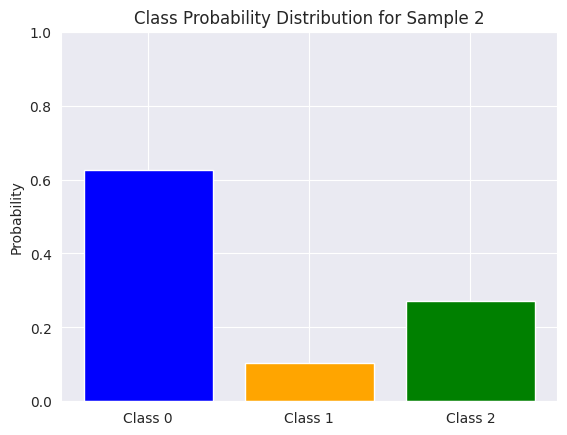

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267752.csv


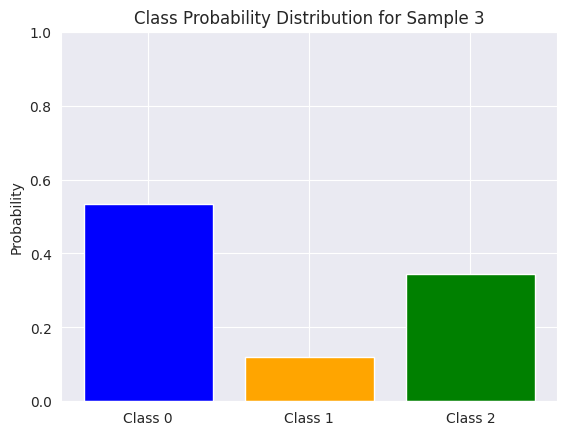

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267752.csv


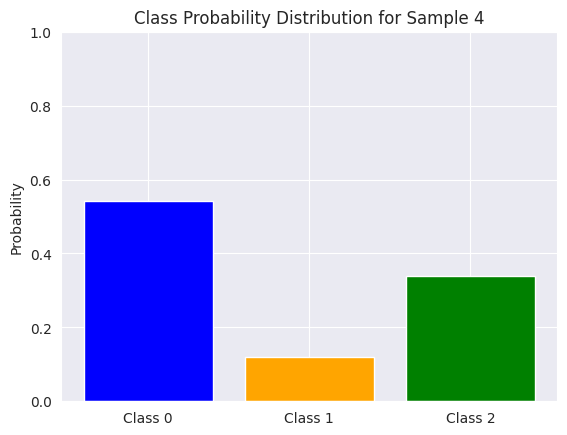

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267752.csv


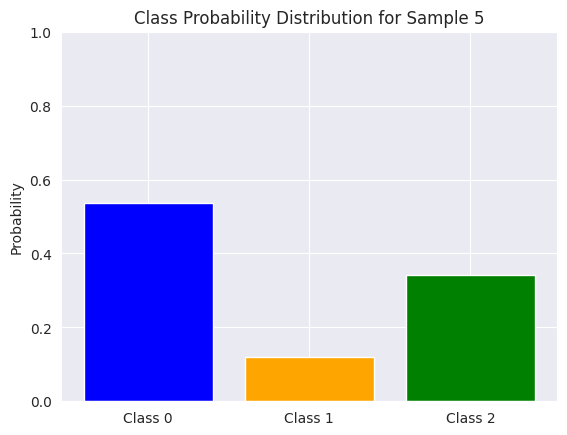

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267752.csv


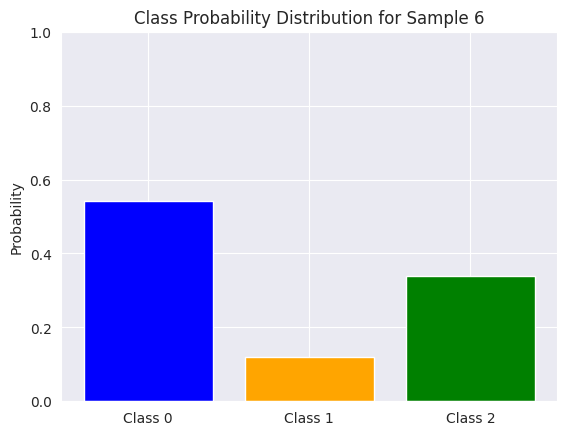

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267752.csv


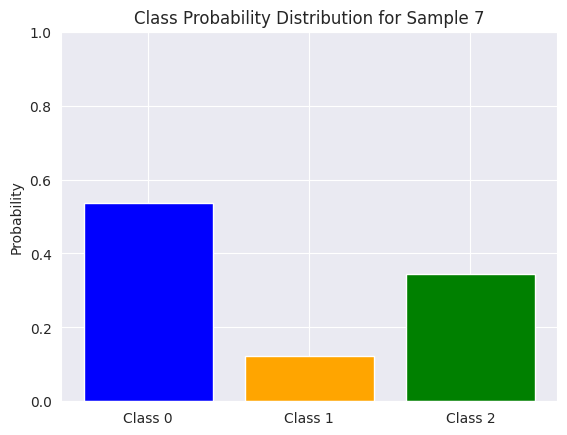

/content/drive/MyDrive/ftTrainDataTest/mw_1267757.csv
(500,)
num_batches:  1  data_main.shape[0]:  490
Number of training batches: 1
x_train.shape =  (490, 9, 1)
y_train.shape =  (490, 1)
x_test.shape =  (0, 9, 1)
y_test.shape =  (0, 1)
x_result.shape =  (490, 1)
0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267757.csv


/tmp/ipykernel_3379/1856099931.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

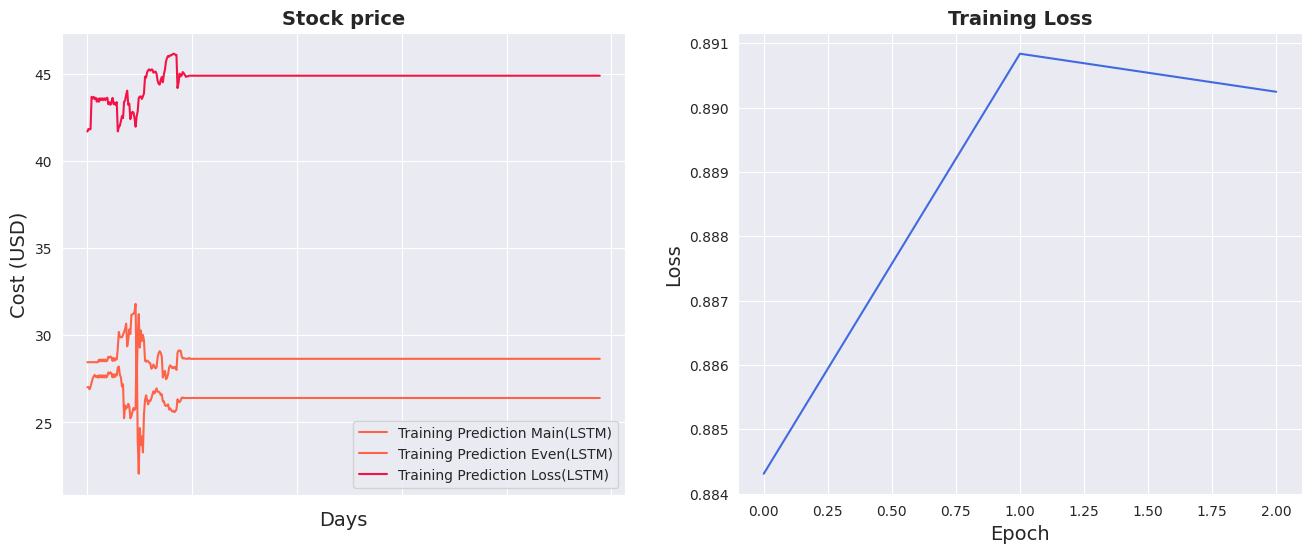

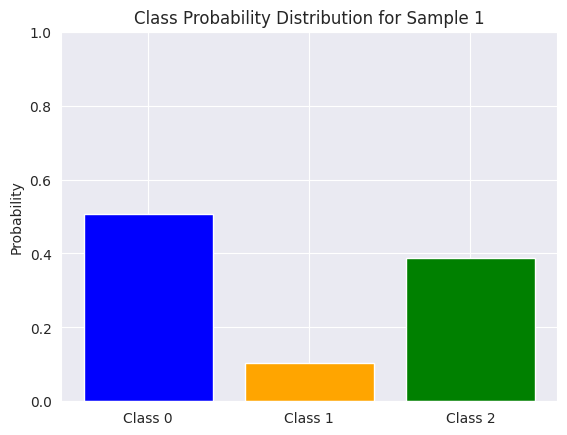

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267757.csv


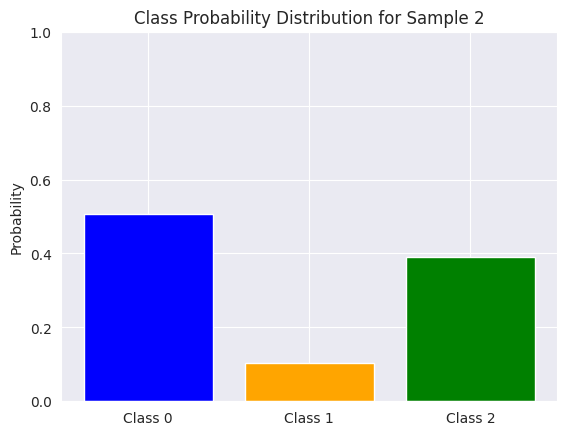

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267757.csv


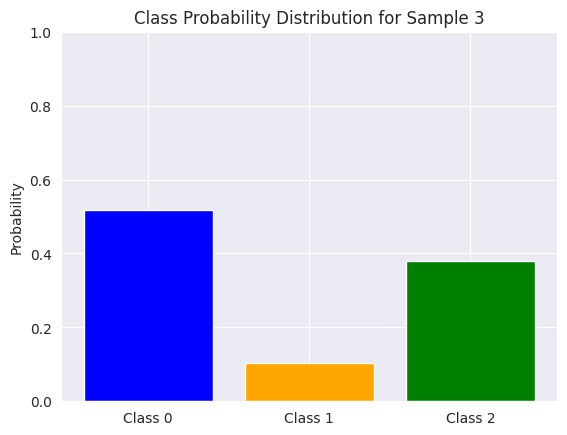

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267757.csv


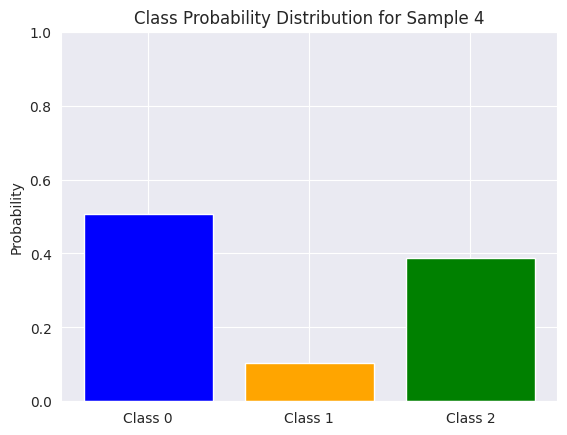

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267757.csv


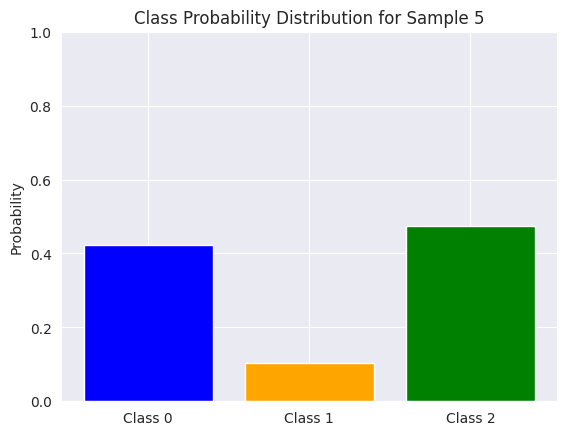

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267757.csv


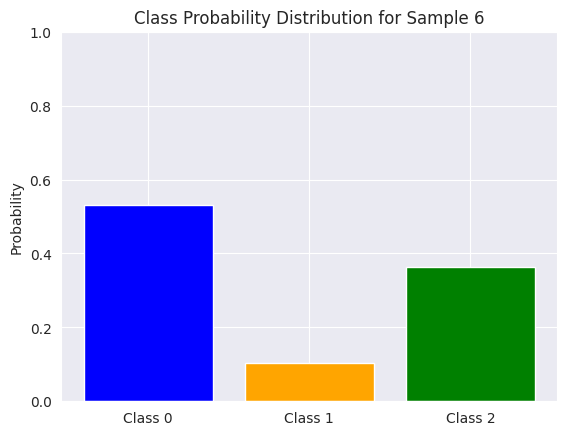

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1267757.csv


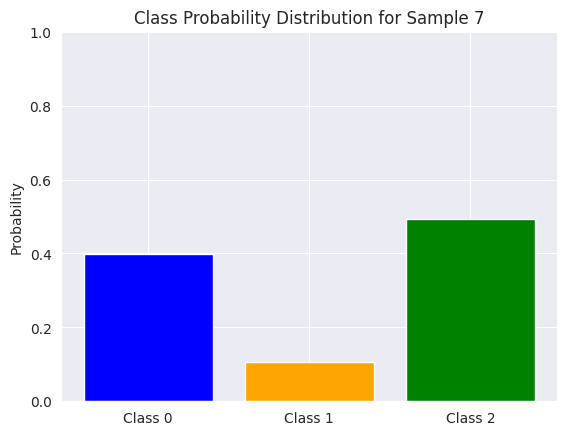

/content/drive/MyDrive/ftTrainDataTest/mw_1269308.csv
(500,)
num_batches:  1  data_main.shape[0]:  490
Number of training batches: 1
x_train.shape =  (490, 9, 1)
y_train.shape =  (490, 1)
x_test.shape =  (0, 9, 1)
y_test.shape =  (0, 1)
x_result.shape =  (490, 1)
0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1269308.csv


/tmp/ipykernel_3379/1856099931.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

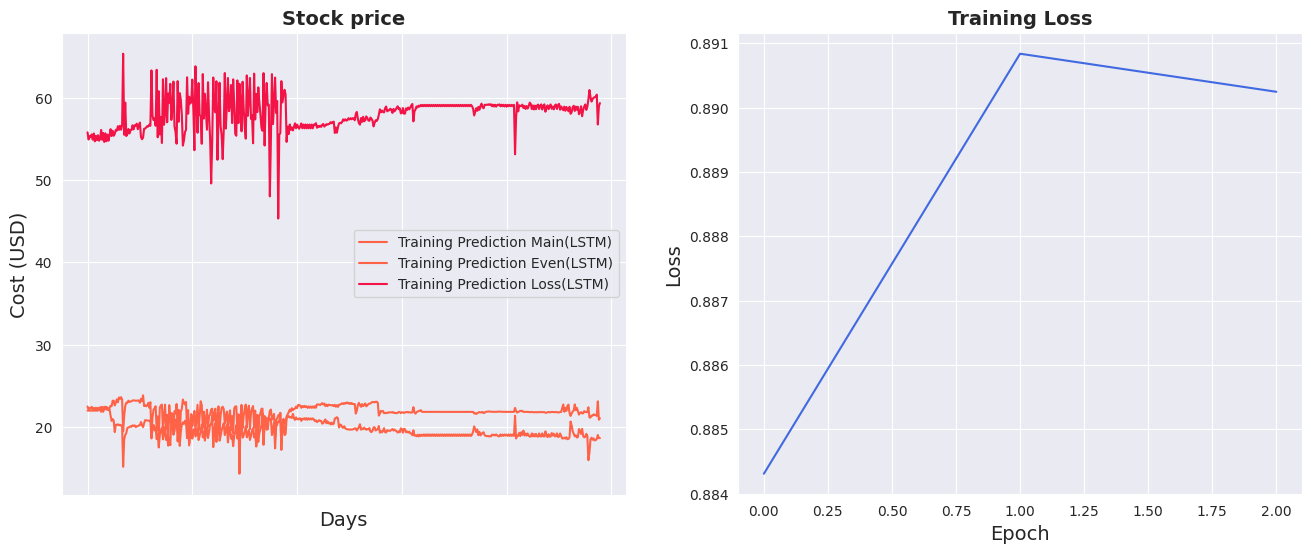

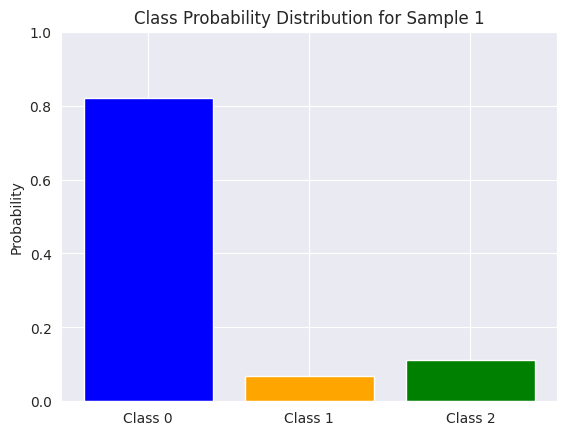

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1269308.csv


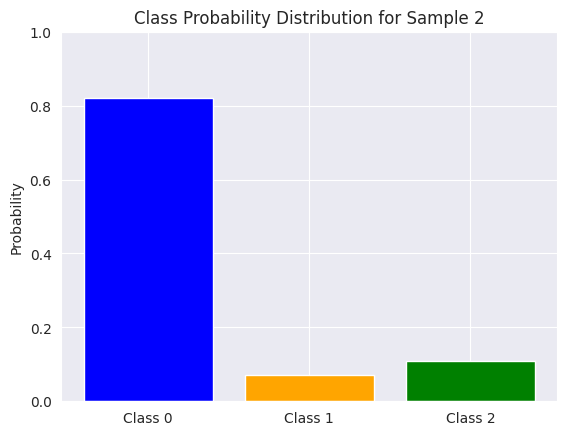

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1269308.csv


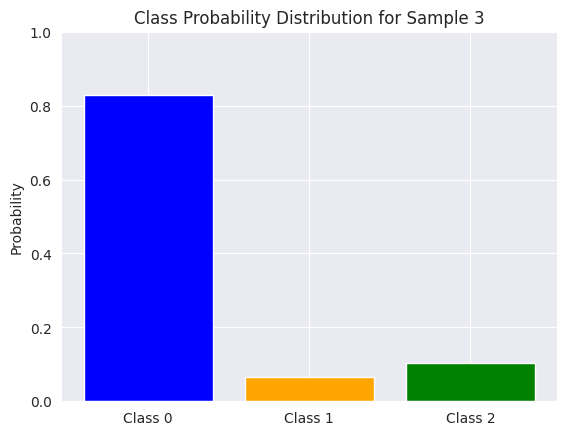

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1269308.csv


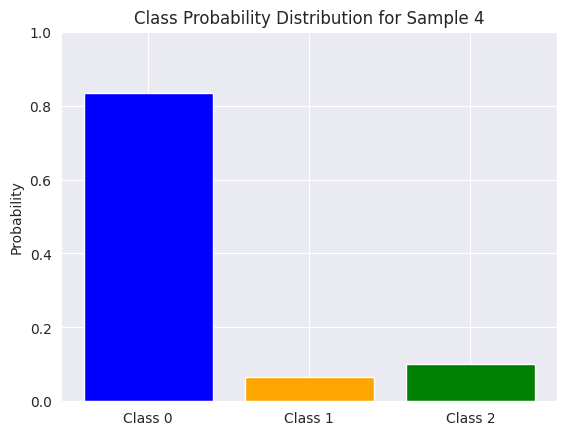

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1269308.csv


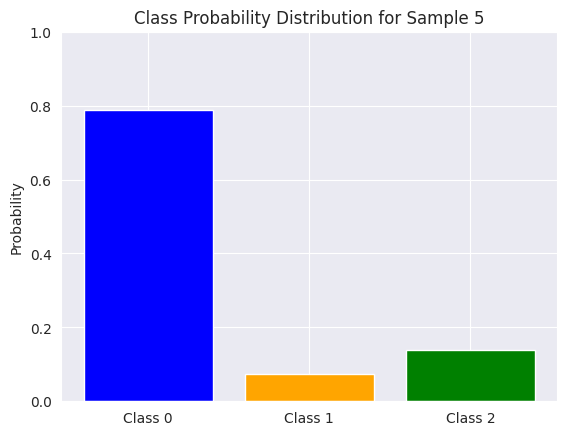

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1269308.csv


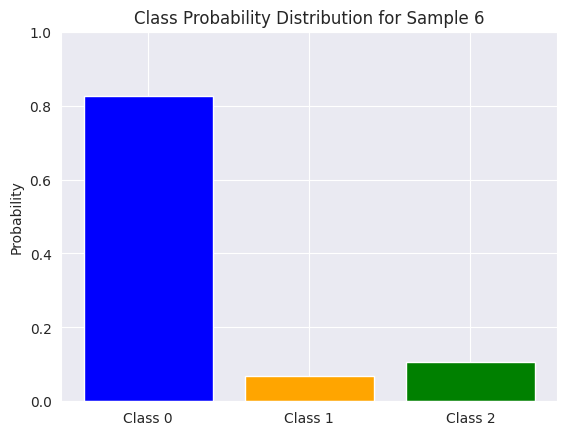

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1269308.csv


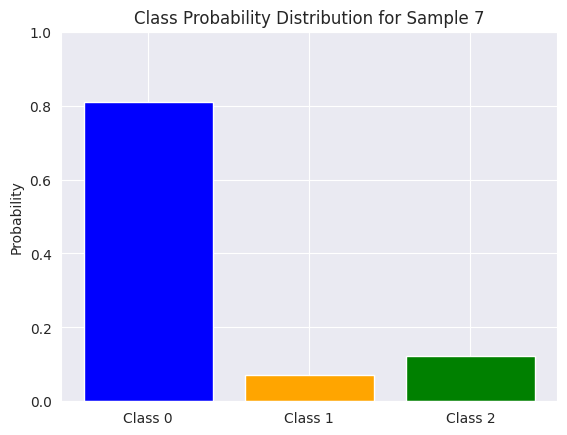

/content/drive/MyDrive/ftTrainDataTest/mw_1244904.csv
(500,)
num_batches:  1  data_main.shape[0]:  490
Number of training batches: 1
x_train.shape =  (490, 9, 1)
y_train.shape =  (490, 1)
x_test.shape =  (0, 9, 1)
y_test.shape =  (0, 1)
x_result.shape =  (490, 1)
0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1244904.csv


/tmp/ipykernel_3379/1856099931.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

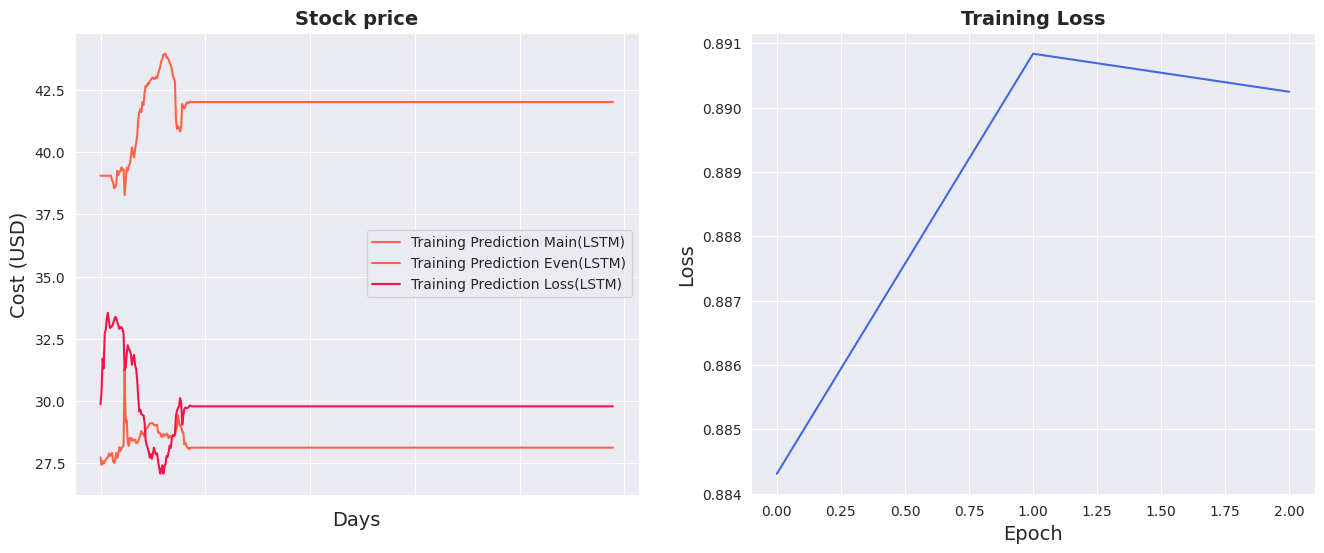

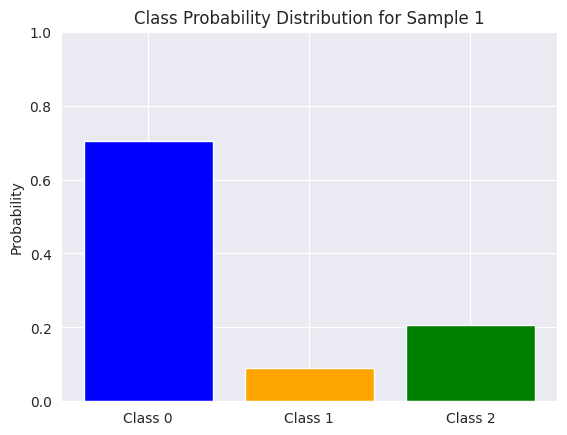

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1244904.csv


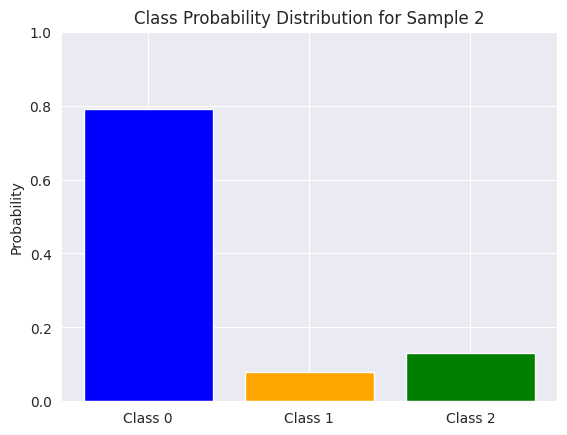

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1244904.csv


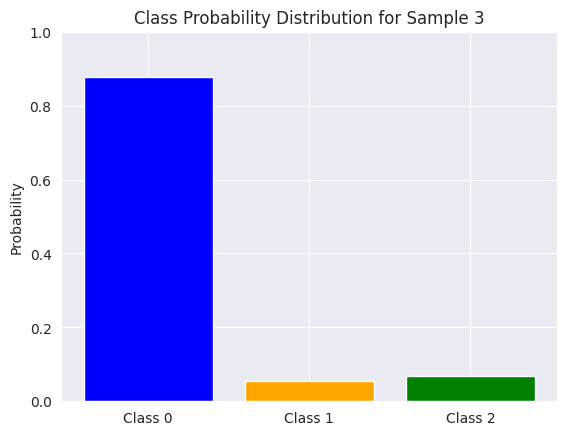

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1244904.csv


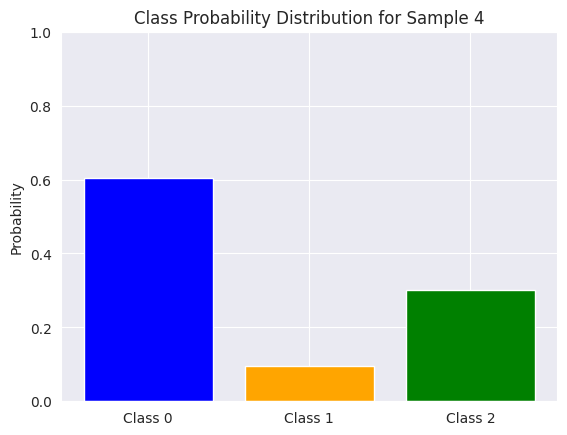

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1244904.csv


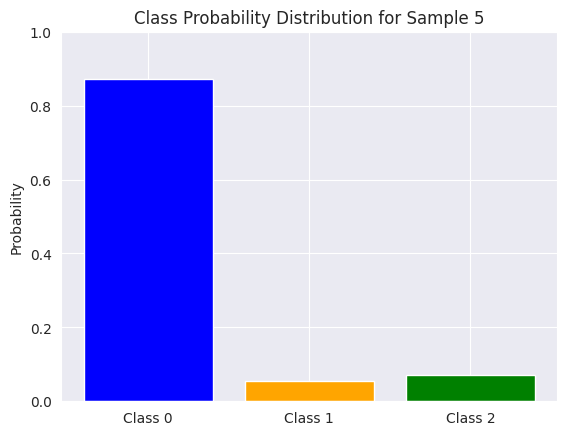

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1244904.csv


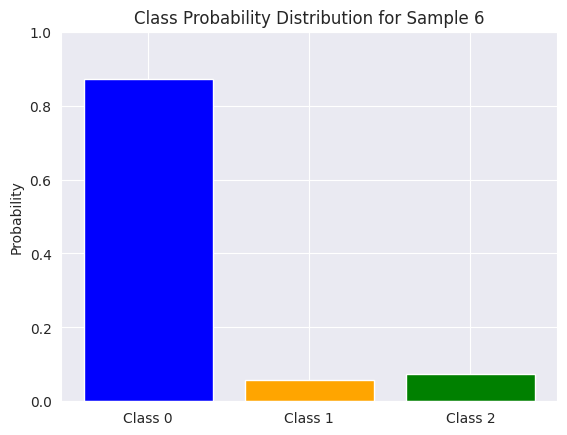

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1244904.csv


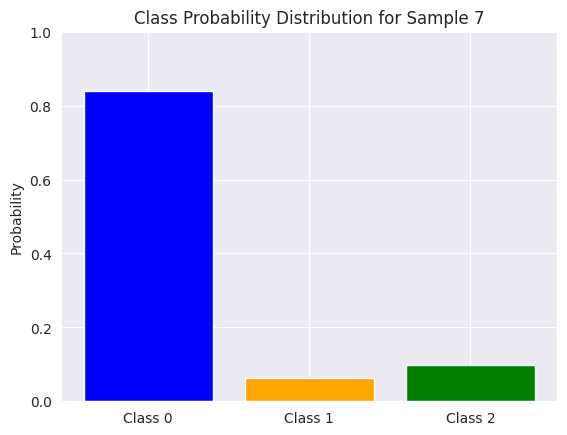

/content/drive/MyDrive/ftTrainDataTest/mw_1259198.csv
(500,)
num_batches:  1  data_main.shape[0]:  490
Number of training batches: 1
x_train.shape =  (490, 9, 1)
y_train.shape =  (490, 1)
x_test.shape =  (0, 9, 1)
y_test.shape =  (0, 1)
x_result.shape =  (490, 1)
0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1259198.csv


/tmp/ipykernel_3379/1856099931.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
/tmp/ipykernel_3379/1856099931.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

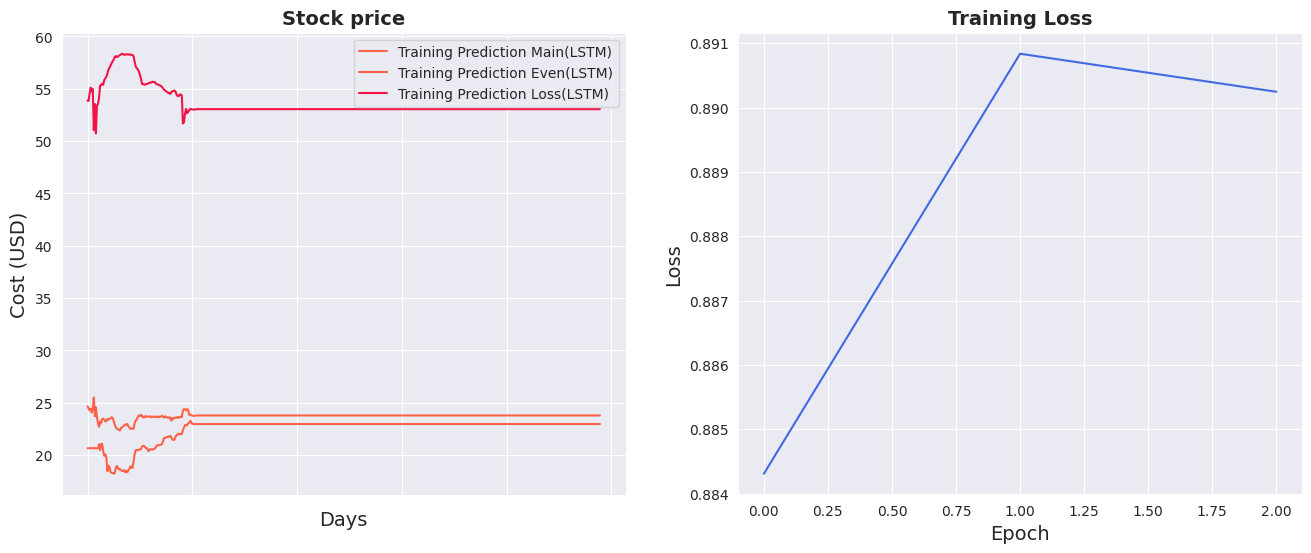

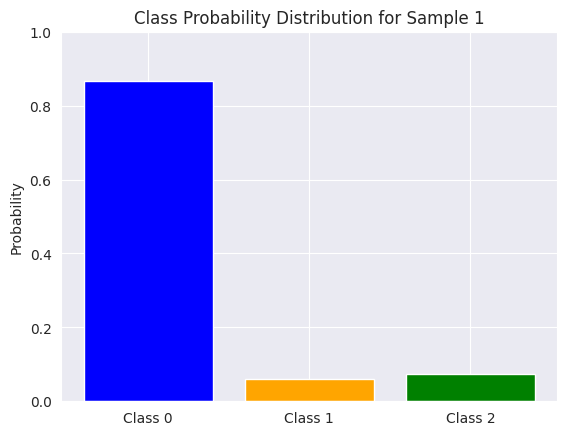

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1259198.csv


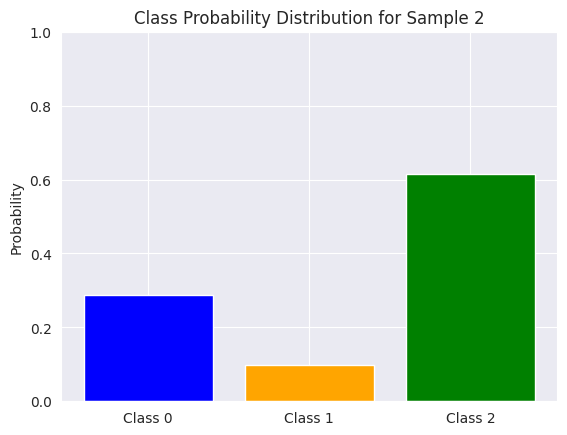

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1259198.csv


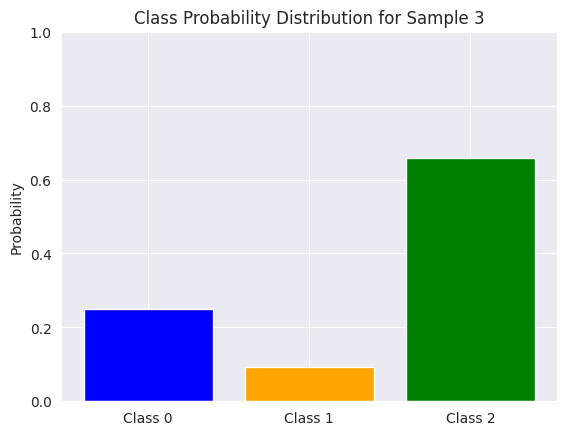

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1259198.csv


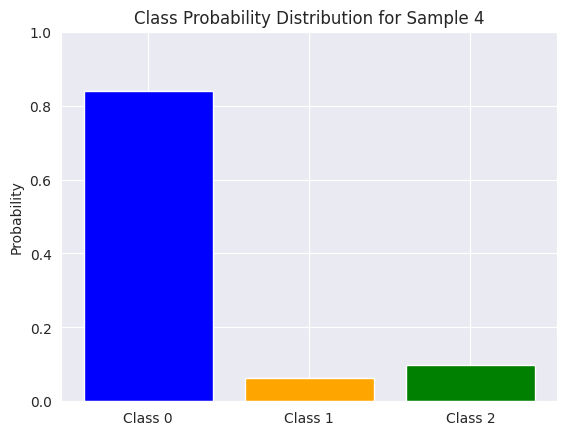

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1259198.csv


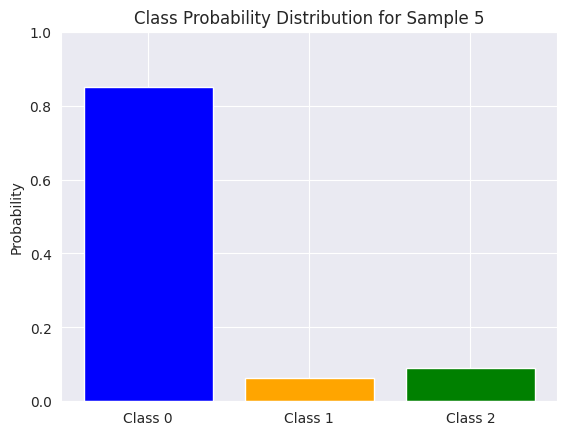

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1259198.csv


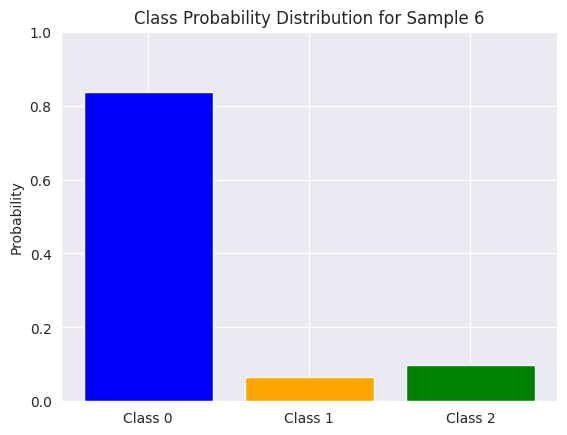

0      2
1      2
2      2
3      2
4      2
      ..
495    2
496    2
497    2
498    2
499    2
Name: Result, Length: 500, dtype: int64
/content/drive/MyDrive/ftTrainDataTest/mw_1259198.csv


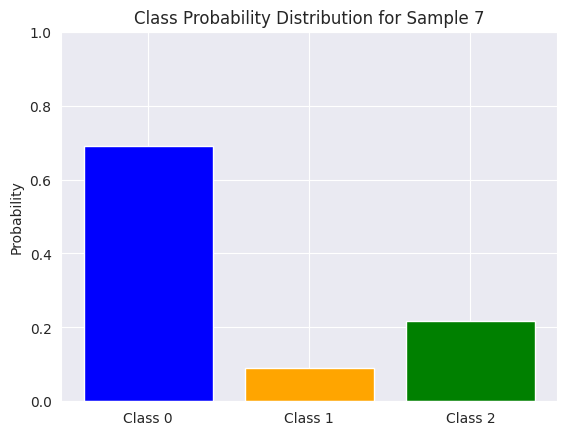

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/output'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#@title 获取数据

# filepath = '/kaggle/input/stock-time-series-20050101-to-20171231/AMZN_2006-01-01_to_2018-01-01.csv'
# filepath = '/kaggle/input/amazon.csv'
import pandas as pd

# file_paths = ['/content/drive/MyDrive/ftTrainDataTest/mw_1244904.csv']
file_paths_all = [os.path.join('/content/drive/MyDrive/ftTrainDataTest', f) for f in os.listdir('/content/drive/MyDrive/ftTrainDataTest') if f.endswith('.csv')]


for path in file_paths_all:
    # 在这里对每个文件路径进行处理
    print(path)
    file_paths = [path]

    dataframes = []
    tgtLength = 500
    
    for file_path in file_paths:
        df = pd.read_csv(file_path, encoding='latin1')
        df = df[::-1]  # 反转 DataFrame 的顺序
    
        # 检查文件大小
        if len(df) < tgtLength:
            # 计算需要重复的行数
            num_rows_to_add = tgtLength - len(df)
            last_row = df.iloc[-1:]  # 获取最后一行
            # 重复最后一行
            repeated_rows = pd.concat([last_row] * num_rows_to_add, ignore_index=True)
            df = pd.concat([df, repeated_rows], ignore_index=True)
            # 创建补充的行，填充为零
            # zero_rows = pd.DataFrame(0, index=range(num_rows_to_add), columns=df.columns)
            # df = pd.concat([df, zero_rows], ignore_index=True)
        else:
            df = df.iloc[:tgtLength]
    
        dataframes.append(df)
    
    # 合并所有数据
    data = pd.concat(dataframes, ignore_index=True)
    
    
    # 保存为 CSV 文件
    data.to_csv('hello_output.csv', index=False)
    
    #@title 数据去除特殊符号
    
    dataMain = data[['Main']]
    dataEven = data[['Even']]
    dataLoss = data[['Loss']]
    dataResult = data[['Result']]
    
    dataMain['Main'] = dataMain['Main'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
    dataEven['Even'] = dataEven['Even'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
    dataLoss['Loss'] = dataLoss['Loss'].astype(str).str.replace('↑', '').str.replace('↓', '').astype(float)
    
    #@title 数据归一化
    
    from sklearn.preprocessing import MinMaxScaler
    
    scalerMain = MinMaxScaler(feature_range=(-1, 1))
    scalerEven = MinMaxScaler(feature_range=(-1, 1))
    scalerLoss = MinMaxScaler(feature_range=(-1, 1))
    scalerResult = MinMaxScaler(feature_range=(-1, 1))
    dataMain['Main'] = scalerMain.fit_transform(dataMain['Main'].values.reshape(-1,1))
    dataEven['Even'] = scalerEven.fit_transform(dataEven['Even'].values.reshape(-1,1))
    dataLoss['Loss'] = scalerLoss.fit_transform(dataLoss['Loss'].values.reshape(-1,1))
    dataResult['Result'] = dataResult['Result']
    print(dataMain['Main'] .shape)
    
    #@title 获取准备验证的数据
    
    import math, time
    from sklearn.metrics import mean_squared_error
    
    
    
    import numpy as np
    import torch
    import torch.nn as nn
    import matplotlib.pyplot as plt
    
    input_dim = 1
    hidden_dim = 32
    num_layers = 2
    output_dim = 1
    output_cls_dim = 3
    num_epochs = 100
    batch_size = 2
    
    
    def split_data(dataMain, dataEven, dataLoss, dataResult, lookback, batch_size = 20):
        data_raw_main = dataMain.to_numpy()
        data_raw_even = dataEven.to_numpy()
        data_raw_loss = dataLoss.to_numpy()
        data_raw_result = dataResult.to_numpy()
        data_main = []
        data_even = []
        data_loss = []
        data_result = []
    
        # create all possible sequences of length lookback
        for index in range(len(data_raw_main) - lookback):
            data_main.append(data_raw_main[index: index + lookback])
        for index in range(len(data_raw_even) - lookback):
            data_even.append(data_raw_even[index: index + lookback])
        for index in range(len(data_raw_loss) - lookback):
            data_loss.append(data_raw_loss[index: index + lookback])
        for index in range(len(data_raw_result) - lookback):
            data_result.append(data_raw_result[index: index + lookback])
    
        data_main = np.array(data_main)
        data_even = np.array(data_even)
        data_loss = np.array(data_loss)
        data_result = np.array(data_result)
    
        test_set_size = int(np.round(0.2 * data_main.shape[0]))
        train_set_size = data_main.shape[0]
    
        # 将训练数据切割成多个批次
        num_batches = train_set_size // batch_size
        print("num_batches: ", num_batches, " data_main.shape[0]: ", data_main.shape[0])
    
    
        x_train = {
            'main': np.array_split(data_main[:train_set_size, :-1, :], num_batches),
            'even': np.array_split(data_even[:train_set_size, :-1, :], num_batches),
            'loss': np.array_split(data_loss[:train_set_size, :-1, :], num_batches),
            'result': np.array_split(data_result[:train_set_size, :-1, :], num_batches)
        }
        y_train = {
            'main': np.array_split(data_main[:train_set_size, -1, :], num_batches),
            'even': np.array_split(data_even[:train_set_size, -1, :], num_batches),
            'loss': np.array_split(data_loss[:train_set_size, -1, :], num_batches),
            'result': np.array_split(data_result[:train_set_size, -1, :], num_batches)
        }
    
        x_test = {
            'main': np.array_split(data_main[train_set_size:, :-1, :], num_batches),
            'even': np.array_split(data_even[train_set_size:, :-1, :], num_batches),
            'loss': np.array_split(data_loss[train_set_size:, :-1, :], num_batches),
            'result': np.array_split(data_result[train_set_size:, :-1, :], num_batches)
        }
        y_test = {
            'main': np.array_split(data_main[train_set_size:, -1, :], num_batches),
            'even': np.array_split(data_even[train_set_size:, -1, :], num_batches),
            'loss': np.array_split(data_loss[train_set_size:, -1, :], num_batches),
            'result': np.array_split(data_result[train_set_size:, -1, :], num_batches)
        }
        # print("x_train['main']: ", x_train['main'][1])
        return [x_train, y_train, x_test, y_test]
    
    
    lookback = 10 # choose sequence length
    x_train, y_train, x_test, y_test = split_data(dataMain, dataEven, dataLoss, dataResult, lookback, 490)
    
    # 打印批次的数量和每个批次的形状
    print('Number of training batches:', len(x_train['main']))
    if len(x_train['main']) > 0:
        # print('Shape of each training batch (x):', x_train_batches[0].shape)
        # print('Shape of each training batch (y):', y_train_batches[0].shape)
    
        print('x_train.shape = ',x_train['main'][0].shape)
        print('y_train.shape = ',y_train['main'][0].shape)
        print('x_test.shape = ',x_test['main'][0].shape)
        print('y_test.shape = ',y_test['main'][0].shape)
        print('x_result.shape = ',y_train['result'][0].shape)
    
    # print("x_train: ", x_train)
    # print("y_train: ", y_train)
    
    # x_train_batches_tensor = [torch.from_numpy(batch).type(torch.Tensor) for batch in x_train_batches]
    # y_train_batches_tensor = [torch.from_numpy(batch).type(torch.Tensor) for batch in y_train_batches]
    import torch
    
    # 转换为字典
    train_tensors = {
        'x_main': [torch.from_numpy(batch).type(torch.Tensor) for batch in x_train['main']],
        'x_even': [torch.from_numpy(batch).type(torch.Tensor) for batch in x_train['even']],
        'x_loss': [torch.from_numpy(batch).type(torch.Tensor) for batch in x_train['loss']],
        'x_result': [torch.from_numpy(batch).type(torch.Tensor) for batch in x_train['result']],
        'y_main': [torch.from_numpy(batch).type(torch.Tensor) for batch in y_train['main']],
        'y_even': [torch.from_numpy(batch).type(torch.Tensor) for batch in y_train['even']],
        'y_loss': [torch.from_numpy(batch).type(torch.Tensor) for batch in y_train['loss']],
        'y_result': [torch.from_numpy(batch).type(torch.Tensor) for batch in y_train['result']]
    }
    
    test_tensors = {
        'x_main': [torch.from_numpy(batch).type(torch.Tensor) for batch in x_test['main']],
        'x_even': [torch.from_numpy(batch).type(torch.Tensor) for batch in x_test['even']],
        'x_loss': [torch.from_numpy(batch).type(torch.Tensor) for batch in x_test['loss']],
        'x_result': [torch.from_numpy(batch).type(torch.Tensor) for batch in x_test['result']],
        'y_main': [torch.from_numpy(batch).type(torch.Tensor) for batch in y_test['main']],
        'y_even': [torch.from_numpy(batch).type(torch.Tensor) for batch in y_test['even']],
        'y_loss': [torch.from_numpy(batch).type(torch.Tensor) for batch in y_test['loss']],
        'y_result': [torch.from_numpy(batch).type(torch.Tensor) for batch in y_test['result']]
    }
    
    for x_main_batch, x_even_batch, x_loss_batch, y_main_batch, y_even_batch, y_loss_batch, y_result_batch in zip(train_tensors['x_main'], train_tensors['x_even'], train_tensors['x_loss'], train_tensors['y_main'], train_tensors['y_even'], train_tensors['y_loss'], train_tensors['y_result']):
    
        # 将数据移动到设备
        x_main_batch = x_main_batch.to(device)
        x_even_batch = x_even_batch.to(device)
        x_loss_batch = x_loss_batch.to(device)
        y_main_batch = y_main_batch.to(device)
        y_even_batch = y_even_batch.to(device)
        y_loss_batch = y_loss_batch.to(device)
        y_result_batch = y_result_batch.to(device)
        # print("ok: ")
        # 替换前10个元素的内容为第11个元素的内容
        if len(x_main_batch) > 10:  # 确保有足够的元素
            x_main_batch[:10] = x_main_batch[10:11]
        # print("x_main_batch: ", x_main_batch)
        model.eval()
        y_test_main_pred, cls_main = model(x_main_batch)
        y_test_even_pred, cls_even = model(x_even_batch)
        y_test_loss_pred, cls_loss = model(x_loss_batch)
        tmp = torch.softmax(cls_main + cls_even + cls_loss, dim=1)
        cls_to_draw = tmp
    
    predict_main = pd.DataFrame(scalerMain.inverse_transform(y_test_main_pred.detach().cpu().numpy()))
    # original_main = pd.DataFrame(scalerMain.inverse_transform(train_tensors['y_main'].detach().numpy()))
    
    predict_even = pd.DataFrame(scalerEven.inverse_transform(y_test_even_pred.detach().cpu().numpy()))
    # # original_even = pd.DataFrame(scalerEven.inverse_transform(train_tensors['y_even'].detach().numpy()))
    
    predict_loss = pd.DataFrame(scalerLoss.inverse_transform(y_test_loss_pred.detach().cpu().numpy()))
    
    # predict_cls = pd.DataFrame(scalerLoss.inverse_transform(cls_to_draw.detach().numpy()))
    # original_loss = pd.DataFrame(scalerLoss.inverse_transform(train_tensors['y_loss'].detach().numpy()))
    
    import seaborn as sns
    sns.set_style("darkgrid")
    
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    
    plt.subplot(1, 2, 1)
    # ax = sns.lineplot(x = original_main.index, y = original_main[0], label="Data Main", color='royalblue')
    ax = sns.lineplot(x = predict_main.index, y = predict_main[0], label="Training Prediction Main(LSTM)", color='tomato')
    
    # ax = sns.lineplot(x = original_even.index, y = original_even[0], label="Data Even", color='red')
    ax = sns.lineplot(x = predict_even.index, y = predict_even[0], label="Training Prediction Even(LSTM)", color='#FF6347')
    
    # # ax = sns.lineplot(x = original_loss.index, y = original_loss[0], label="Data Loss", color='green')
    ax = sns.lineplot(x = predict_loss.index, y = predict_loss[0], label="Training Prediction Loss(LSTM)", color='#F31347')
    
    # # ax = sns.lineplot(x = original_loss.index, y = original_loss[0], label="Data Loss", color='green')
    # ax = sns.lineplot(x = predict_cls.index, y = predict_cls[0], label="Training Prediction Class(LSTM)", color='#a31347')
    ax.set_title('Stock price', size = 14, fontweight='bold')
    ax.set_xlabel("Days", size = 14)
    ax.set_ylabel("Cost (USD)", size = 14)
    ax.set_xticklabels('', size=10)
    
    
    plt.subplot(1, 2, 2)
    ax = sns.lineplot(data=hist, color='royalblue')
    ax.set_xlabel("Epoch", size = 14)
    ax.set_ylabel("Loss", size = 14)
    ax.set_title("Training Loss", size = 14, fontweight='bold')
    fig.set_figheight(6)
    fig.set_figwidth(16)

    import torch
    import matplotlib.pyplot as plt
    
    
    # 类别标签
    categories = ['Class 0', 'Class 1', 'Class 2']
    
    # 绘制每一行的柱形图
    for i in range(cls_to_draw.size(0)):
        print(dataResult['Result'])
        print(path)
        plt.figure()
        plt.bar(categories, cls_to_draw[i].detach().cpu().numpy(), color=['blue', 'orange', 'green'])
        plt.ylim(0, 1)
        plt.ylabel('Probability')
        plt.title(f'Class Probability Distribution for Sample {i + 1}')
        plt.show()
        if i > 5:
            break

In [ ]:
#@title 绘制图像

import torch
import matplotlib.pyplot as plt


# 类别标签
categories = ['Class 0', 'Class 1', 'Class 2']

# 绘制每一行的柱形图
for i in range(cls_to_draw.size(0)):
    plt.figure()
    plt.bar(categories, cls_to_draw[i].detach().cpu().numpy(), color=['blue', 'orange', 'green'])
    plt.ylim(0, 1)
    plt.ylabel('Probability')
    plt.title(f'Class Probability Distribution for Sample {i + 1}')
    plt.show()
    if i > 5:
        break



In [ ]:
import torch
import matplotlib.pyplot as plt


# 类别标签
categories = ['Class 0', 'Class 1', 'Class 2']

# 绘制每一行的柱形图
for i in range(cls_to_draw.size(0)):
    plt.figure()
    plt.bar(categories, cls_to_draw[i].detach().numpy(), color=['blue', 'orange', 'green'])
    plt.ylim(0, 1)
    plt.ylabel('Probability')
    plt.title(f'Class Probability Distribution for Sample {i + 1}')
    plt.show()



In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price)-1, :] = y_test_pred

original = scaler.inverse_transform(price['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Results (LSTM)',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

In [ ]:
!pip install chart-studio

In [ ]:
# import chart_studio.plotly as py
# import chart_studio

# chart_studio.tools.set_credentials_file(username='rodolfo_saldanha', api_key='zWJIVWJs23wfiAp516Mh')
# py.iplot(fig, filename='stock_prediction_lstm')

In [ ]:
class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time
print("Training time: {}".format(training_time))

In [ ]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='tomato')
ax.set_title('Stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [ ]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price)-1, :] = y_test_pred

original = scaler.inverse_transform(price['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Results (GRU)',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

In [ ]:
lstm = pd.DataFrame(lstm, columns=['LSTM'])
gru = pd.DataFrame(gru, columns=['GRU'])
result = pd.concat([lstm, gru], axis=1, join='inner')
result.index = ['Train RMSE', 'Test RMSE', 'Train Time']
result

In [ ]:
py.iplot(fig, filename='stock_prediction_gru')